# データセットの作成

## Settings

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import math
from pprint import pprint
plt.rcParams['font.family'] = 'Hiragino Maru Gothic Pro'
import random

In [2]:
# JCT token setting
jct_tokenId = '0x4a43540000000000000000000000000000000000000000000000000000000000'
jct_price = 1.0e+5

In [3]:
# Relative path to save data
from pathlib import Path

data_dir = Path('../data/data202303_v3')
data_dir.mkdir(parents=True, exist_ok=True)
data_relative_path = '../data/data202303_v3/'

## Sample csv format

In [4]:
sample_create_token_df = pd.read_csv('../data/sample/csv/createToken_decode.csv')
sample_create_token_df

,tokenId,tokenName,price,tokenTypeId,updateTime
0,0x20221110132152000000000000000000000000000000...,ST00001,10000000,0x30783030303031000000000000000000000000000000...,1668054112
1,0x20221110132152000000000000000000000000000000...,ST00002,10000000,0x30783030303031000000000000000000000000000000...,1668054112
2,0x20221110132152000000000000000000000000000000...,ST00003,10000000,0x30783030303031000000000000000000000000000000...,1668054112
3,0x20221110132152000000000000000000000000000000...,ST00004,10000000,0x30783030303031000000000000000000000000000000...,1668054112
4,0x20221110132152000000000000000000000000000000...,ST00005,10000000,0x30783030303031000000000000000000000000000000...,1668054112
...,...,...,...,...,...
351,0x20221110132152000000000000000000000000000000...,ST00352,10000000,0x30783030303031000000000000000000000000000000...,1668054112
352,0x20221110132152000000000000000000000000000000...,ST00353,10000000,0x30783030303031000000000000000000000000000000...,1668054112
353,0x20221110132152000000000000000000000000000000...,ST00354,10000000,0x30783030303031000000000000000000000000000000...,1668054112
354,0x20221110132152000000000000000000000000000000...,ST00355,10000000,0x30783030303031000000000000000000000000000000...,1668054112


In [5]:
sample_create_trading_df = pd.read_csv('../data/sample/csv/createTrading_decode.csv')
sample_create_trading_df

,tradingId,lender,borrowerTokenIds,lenderTokenIds,borrowerTokenAmounts,lenderTokenAmounts,startTime,finishTime,rate,adjustmentToken
0,0x20221110132540000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,['0x202211101321520000000000000000000000000000...,[10000000000],"[33333333, 33333333, 33333333]",1668054340,1668057940,100,0x4a435400000000000000000000000000000000000000...
1,0x20221110132540000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,['0x202211101321520000000000000000000000000000...,[10000000000],"[33333333, 33333333, 33333333]",1668054340,1668057940,100,0x4a435400000000000000000000000000000000000000...
2,0x20221110132540000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,['0x202211101321520000000000000000000000000000...,[10000000000],"[33333333, 33333333, 33333333]",1668054340,1668057940,100,0x4a435400000000000000000000000000000000000000...
3,0x20221110132540000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,['0x202211101321520000000000000000000000000000...,[10000000000],"[33333333, 33333333, 33333333]",1668054340,1668057940,100,0x4a435400000000000000000000000000000000000000...
4,0x20221110132540000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,['0x202211101321520000000000000000000000000000...,[10000000000],"[33333333, 33333333, 33333333]",1668054340,1668057940,100,0x4a435400000000000000000000000000000000000000...
...,...,...,...,...,...,...,...,...,...,...
8662,0x20221110132540000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,['0x202211101321520000000000000000000000000000...,[10000000000],"[33333333, 33333333, 33333333]",1668054340,1668057940,100,0x4a435400000000000000000000000000000000000000...
8663,0x20221110132540000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,['0x202211101321520000000000000000000000000000...,[10000000000],"[33333333, 33333333, 33333333]",1668054340,1668057940,100,0x4a435400000000000000000000000000000000000000...
8664,0x20221110132540000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,['0x202211101321520000000000000000000000000000...,[10000000000],"[33333333, 33333333, 33333333]",1668054340,1668057940,100,0x4a435400000000000000000000000000000000000000...
8665,0x20221110132540000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,['0x202211101321520000000000000000000000000000...,[10000000000],"[33333333, 33333333, 33333333]",1668054340,1668057940,100,0x4a435400000000000000000000000000000000000000...


In [6]:
sample_update_token_df = pd.read_csv('../data/sample/csv/updateToken_decode.csv')
sample_update_token_df

,tokenId,price,updateTime
0,0x20221110132152000000000000000000000000000000...,9000000,1668054263
1,0x20221110132152000000000000000000000000000000...,9000000,1668054263
2,0x20221110132152000000000000000000000000000000...,9000000,1668054263
3,0x20221110132152000000000000000000000000000000...,9000000,1668054263
4,0x20221110132152000000000000000000000000000000...,9000000,1668054263
...,...,...,...
351,0x20221110132152000000000000000000000000000000...,9000000,1668054263
352,0x20221110132152000000000000000000000000000000...,9000000,1668054263
353,0x20221110132152000000000000000000000000000000...,9000000,1668054263
354,0x20221110132152000000000000000000000000000000...,9000000,1668054263


## Mock data distributions

### Number of Trade

In [7]:
ave_gc_trade_num = 438
ave_sc_trade_num = 2833
ave_bond_trade_num = 8667

stock_trade_term_list = [1, 5, 19, 60, 180, 2]
bond_trade_term_list = [1, 5, 19, 60, 180]
stock_trade_term_percent_list = [0.24, 0.38, 0.07, 0.02, 0.05, 0.24]
bond_trade_term_percent_list = [0.37, 0.15, 0.29, 0.16, 0.04]

max_gc_trade_num = math.ceil(np.dot(np.array(stock_trade_term_list), np.array(stock_trade_term_percent_list)) * ave_gc_trade_num)
max_sc_trade_num = math.ceil(np.dot(np.array(stock_trade_term_list), np.array(stock_trade_term_percent_list)) * ave_sc_trade_num)
max_bond_trade_num = math.ceil(np.dot(np.array(bond_trade_term_list), np.array(bond_trade_term_percent_list)) * ave_bond_trade_num)
print('max gc num: ', max_gc_trade_num)
print('max sc num: ', max_sc_trade_num)
print('max bond num: ', max_bond_trade_num)

max gc num:  6198
max sc num:  40087
max bond num:  203068


In [8]:
np.array([1758, 5020]) * 0.075

array([131.85, 376.5 ])

In [31]:
a_trade_num = 8667 + 3271

b_trade_nums = {
    '100%': {
        'gc': 6198,
        'sc': 40087,
        'bond': 203068,
    },
    '150%': {
        'gc': 9297,
        'sc': 60131,
        'bond': 304602,
    },
    '50%': {
        'gc': 3099,
        'sc': 20044,
        'bond': 101534,
    },
    '30%': {
        'gc': 1860,
        'sc': 12027,
        'bond': 60921,
    },
    '25%': {
        'gc': 1550,
        'sc': 10022,
        'bond': 50767,
    },
    '15%': {
        'gc': 928,
        'sc': 6014,
        'bond': 30461,
    },
    '7.5%': {
        'gc': 465,
        'sc': 3007,
        'bond': 15231,
    },
}

b_security_nums = {
    '100%': {
        'stock': 1758,
        'bond': 5020,
    },
    '150%': {
        'stock': 2637,
        'bond': 7530,
    },
    '50%': {
        'stock': 879,
        'bond': 2510,
    },
    '30%': {
        'stock': 528,
        'bond': 1506,
    },
    '25%': {
        'stock': 440,
        'bond': 1255,
    },
    '15%': {
        'stock': 264,
        'bond': 753,
    },
    '7.5%': {
        'stock': 132,
        'bond': 377,
    },
}

additional_trade_nums = {
    '460': {
        'gc': 11,
        'sc': 74,
        'bond': 375,
    },
    '200': {
        'gc': 5,
        'sc': 32,
        'bond': 163,
    },
    '150': {
        'gc': 4,
        'sc': 24,
        'bond': 122,
    },
    '100': {
        'gc': 3,
        'sc': 16,
        'bond': 81,
    },
    '50': {
        'gc': 1,
        'sc': 8,
        'bond': 41,
    },
}

additional_security_nums = {
    '460': {
        'stock': 3,
        'bond': 9,
    },
    '200': {
        'stock': 2,
        'bond': 5,
    },
    '150': {
        'stock': 1,
        'bond': 3,
    },
    '100': {
        'stock': 1,
        'bond': 2,
    },
    '50': {
        'stock': 1,
        'bond': 2,
    },
}

In [30]:
# 50 * (6198 / (6198 + 40087 + 203068))
# 50 * (40087 / (6198 + 40087 + 203068))
# 50 * (203068 / (6198 + 40087 + 203068))


1758 * (100 / (6198 + 40087 + 203068))
5020 * (100 / (6198 + 40087 + 203068))

2.0132101879664575

#### Price

In [32]:
# price_df を格納するobjの初期化
all_price_dfs = {
    '460': {},
    '200': {},
    '150': {},
    '100': {},
    '50': {},
}

#### 株レポGC取引

株レポGC取引: 
             10億円以内         10億円超        100億円超        500億円超
ratio  1.500000e-01  6.000000e-01  2.000000e-01  5.000000e-02
min    1.000000e+08  1.000000e+09  1.000000e+10  5.000000e+10
max    1.000000e+09  1.000000e+10  5.000000e+10  1.000000e+11


<AxesSubplot:title={'center':'株レポGC取引: 概観'}>

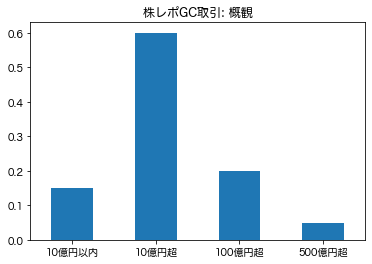

In [33]:
gc_price_column_labels = ['10億円以内', '10億円超', '100億円超', '500億円超']
gc_price_dist = pd.DataFrame([[0.15, 0.6, 0.2, 0.05], [1.0e+8, 1.0e+9, 1.0e+10, 5.0e+10], [1.0e+9, 1.0e+10, 5.0e+10, 1.0e+11]],
                             columns=gc_price_column_labels,
                             index=['ratio', 'min', 'max'])
gc_price_ave = 81.5e+8
print('株レポGC取引: ')
pprint(gc_price_dist)
print('='*50)

plt.title('株レポGC取引: 概観')
gc_price_dist.T['ratio'].plot(kind='bar', rot=0)

Text(0.5, 1.0, '株レポGC取引: ヒストグラム')

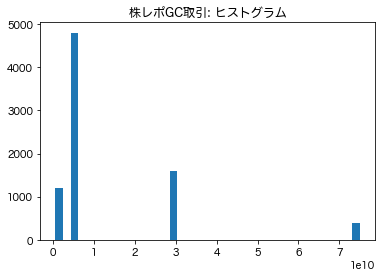

In [34]:
gc_trade_num = 8000
gc_ave_price_list = (gc_price_dist.T['min'] + gc_price_dist.T['max']) / 2
gc_sample = [[ave]*int(gc_price_dist.T['ratio'][index] * gc_trade_num)  for (index, ave) in enumerate(gc_ave_price_list)]

plt.hist(list(itertools.chain.from_iterable(gc_sample)), bins=40)
plt.title('株レポGC取引: ヒストグラム')

In [35]:
def get_gc_price_df(trade_num):
    gc_price_max = gc_price_dist['500億円超']['max']
    gc_price_min = gc_price_dist['10億円以内']['min']
    mock_gc_price_df = pd.DataFrame(np.random.triangular(gc_price_min, gc_price_ave, gc_price_max, trade_num)) * 1.0e+5
    mock_gc_price_df.hist(bins=100, figsize=(30, 20), xlabelsize=20, ylabelsize=20)
    plt.title(f'株レポGC取引: 擬似データ分布（三角分布, {trade_num}件）', fontsize=24)
    return mock_gc_price_df

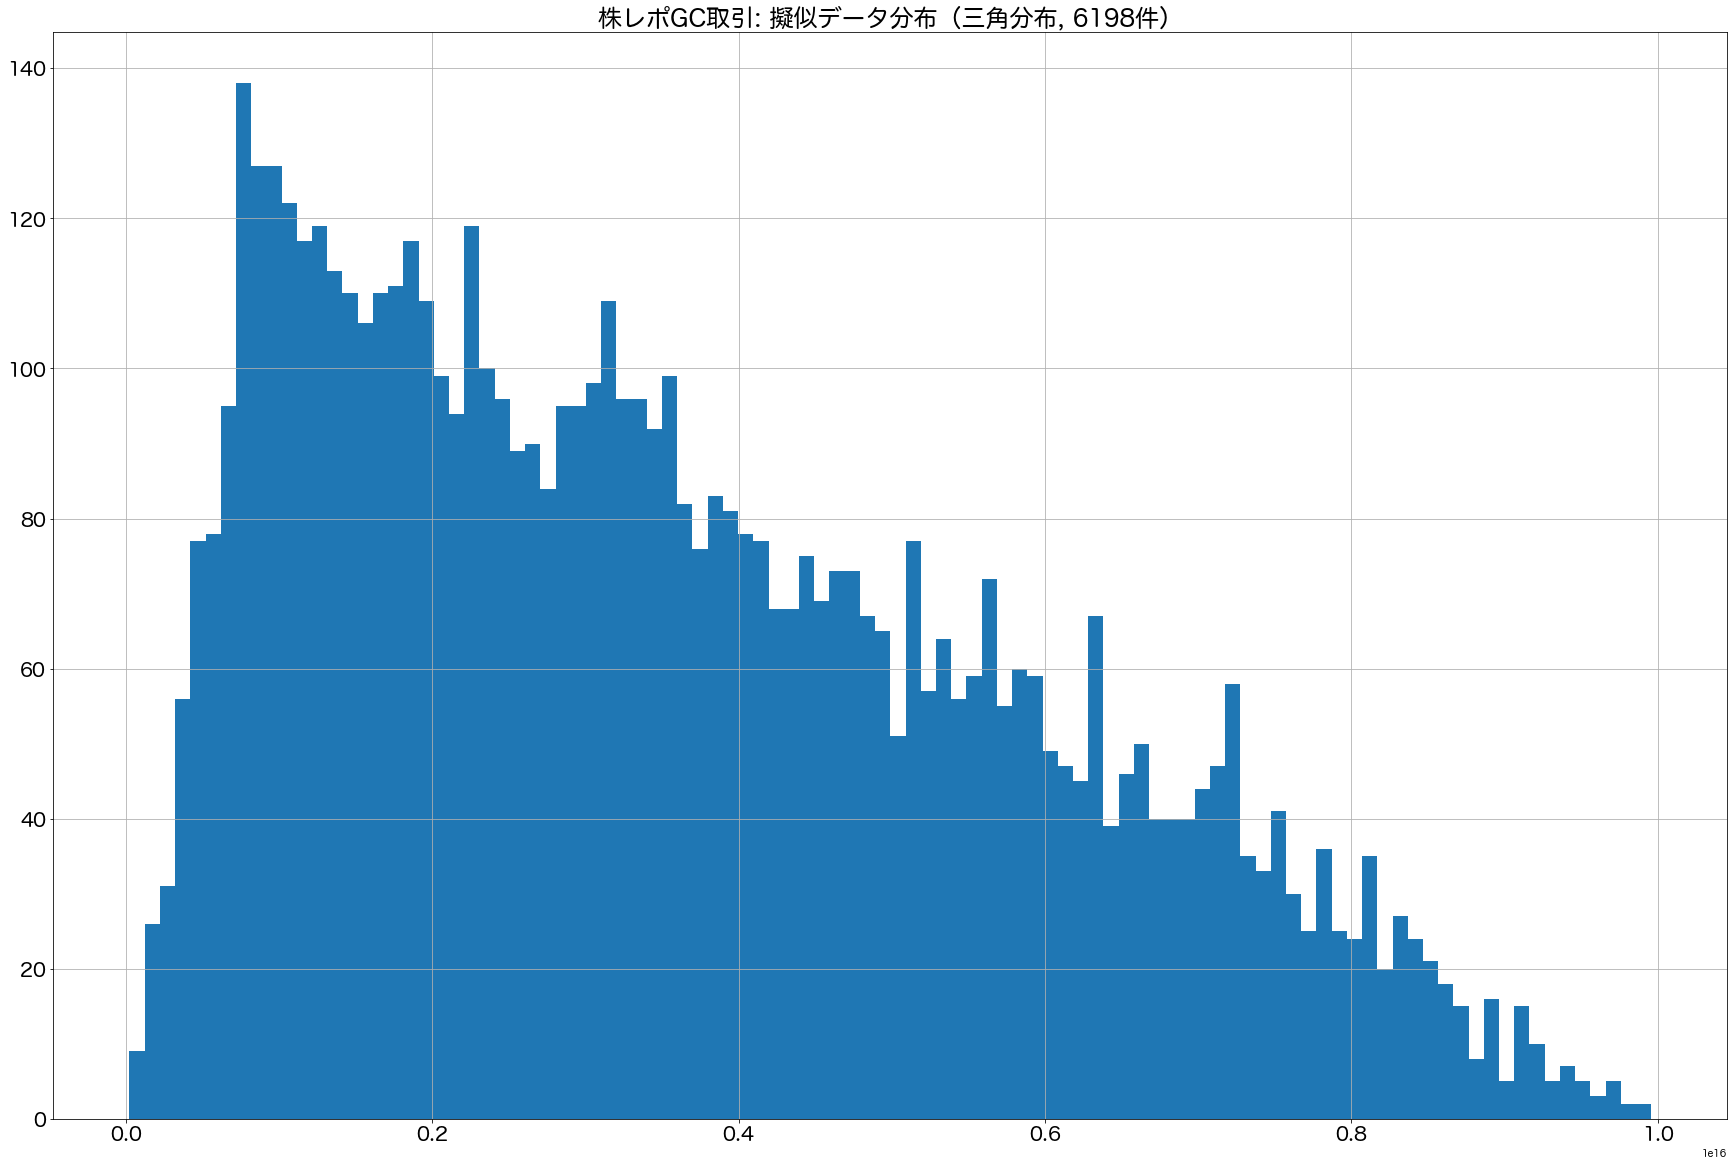

In [36]:
# 三角分布で類似分布を作成
# gc_price_max = gc_price_dist['500億円超']['max']
# gc_price_min = gc_price_dist['10億円以内']['min']
# mock_gc_price_df = pd.DataFrame(np.random.triangular(gc_price_min, gc_price_ave, gc_price_max, gc_trade_num)) * 1.0e+5
# mock_gc_price_df.hist(bins=100, figsize=(30, 20))
# plt.title('株レポGC取引: 擬似データ分布（三角分布）')
mock_gc_trade_8000_df = get_gc_price_df(b_trade_nums['100%']['gc'])

/Users/kentomaruoka/.pyenv/versions/3.10.4/lib/python3.10/site-packages/numpy/lib/histograms.py:823: RuntimeWarning: divide by zero encountered in double_scalars
  norm = n_equal_bins / _unsigned_subtract(last_edge, first_edge)
/Users/kentomaruoka/.pyenv/versions/3.10.4/lib/python3.10/site-packages/numpy/lib/histograms.py:851: RuntimeWarning: invalid value encountered in multiply
  f_indices = _unsigned_subtract(tmp_a, first_edge) * norm


{'460': {'gc':                0
  0   1.025009e+15
  1   5.434984e+15
  2   3.987572e+15
  3   3.401228e+15
  4   8.831180e+14
  5   4.885417e+15
  6   3.573421e+15
  7   1.716843e+15
  8   5.176331e+15
  9   8.403021e+15
  10  3.973310e+15},
 '200': {'gc':               0
  0  1.013723e+15
  1  6.435510e+15
  2  2.559784e+15
  3  2.701019e+15
  4  5.243717e+15},
 '150': {'gc':               0
  0  1.952133e+15
  1  4.871396e+15
  2  2.118100e+15
  3  5.040172e+15},
 '100': {'gc':               0
  0  4.178692e+15
  1  7.327946e+15
  2  6.840201e+15},
 '50': {'gc':               0
  0  8.854883e+15}}

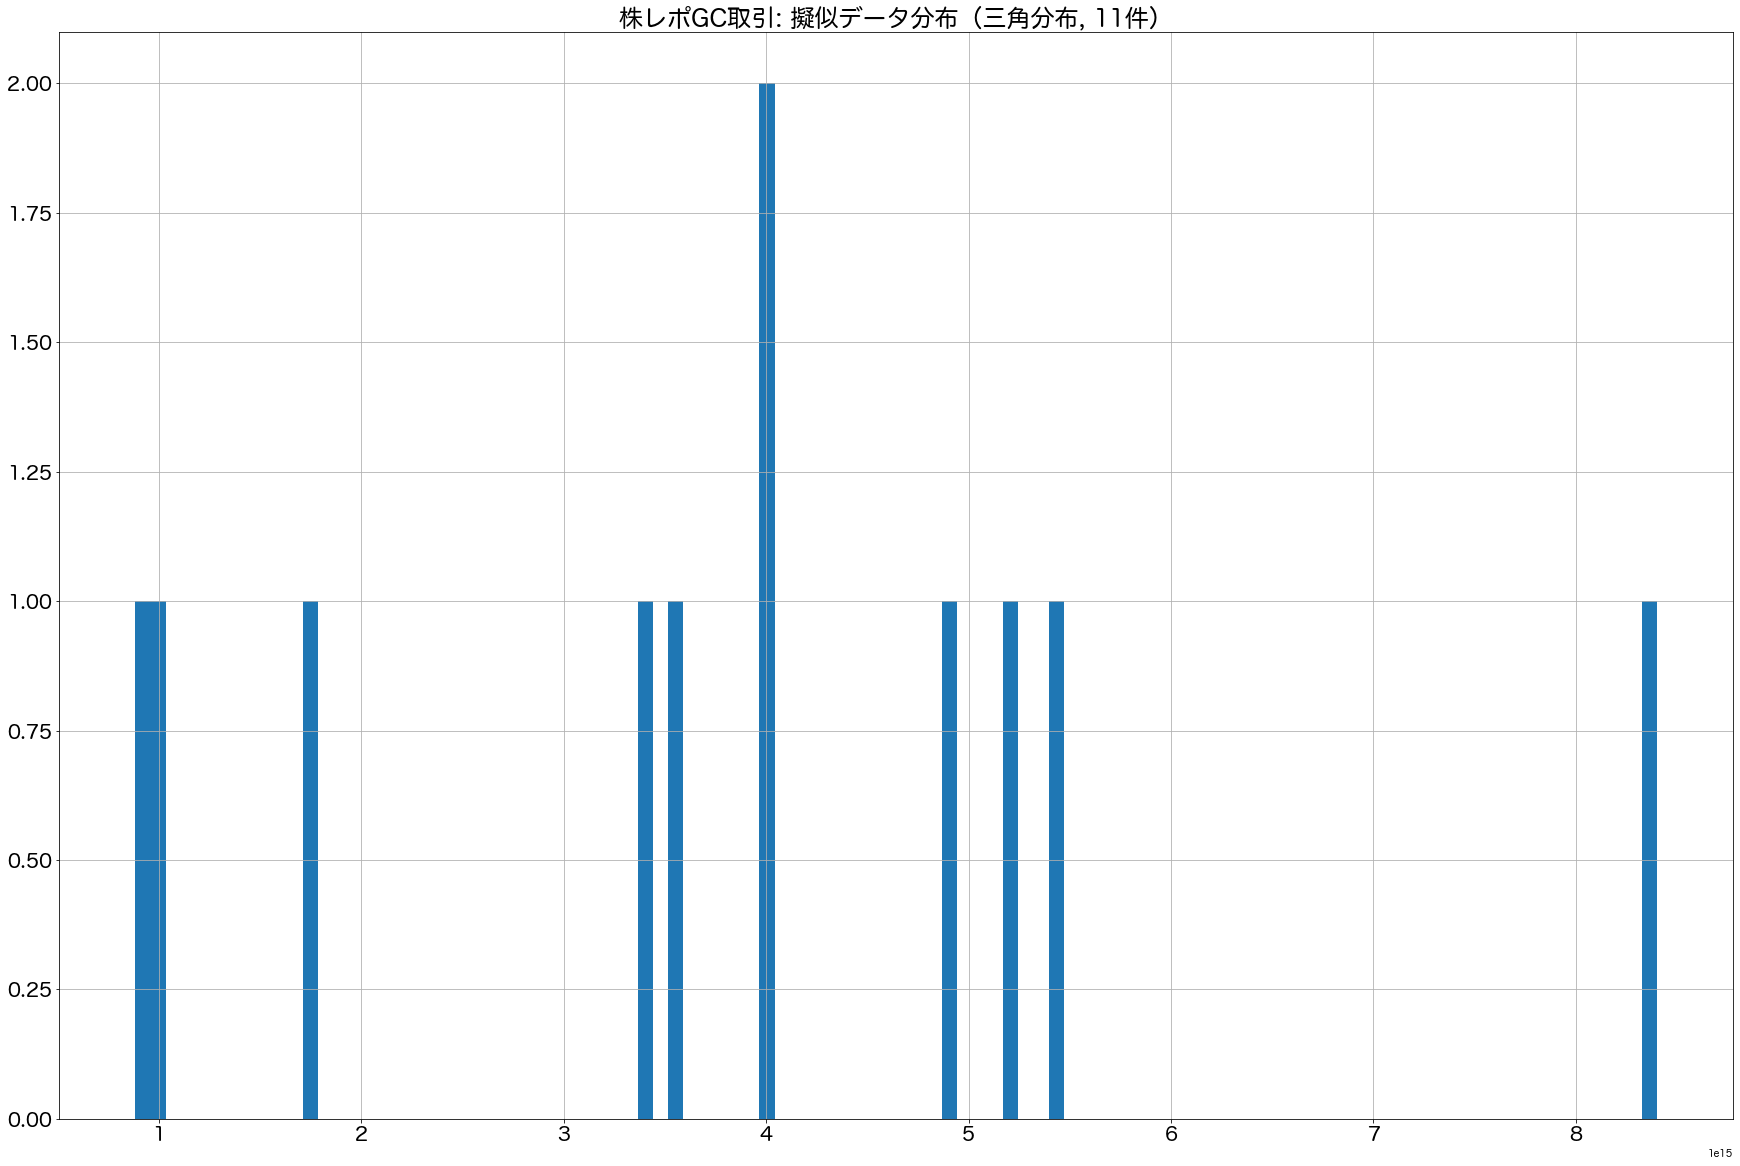

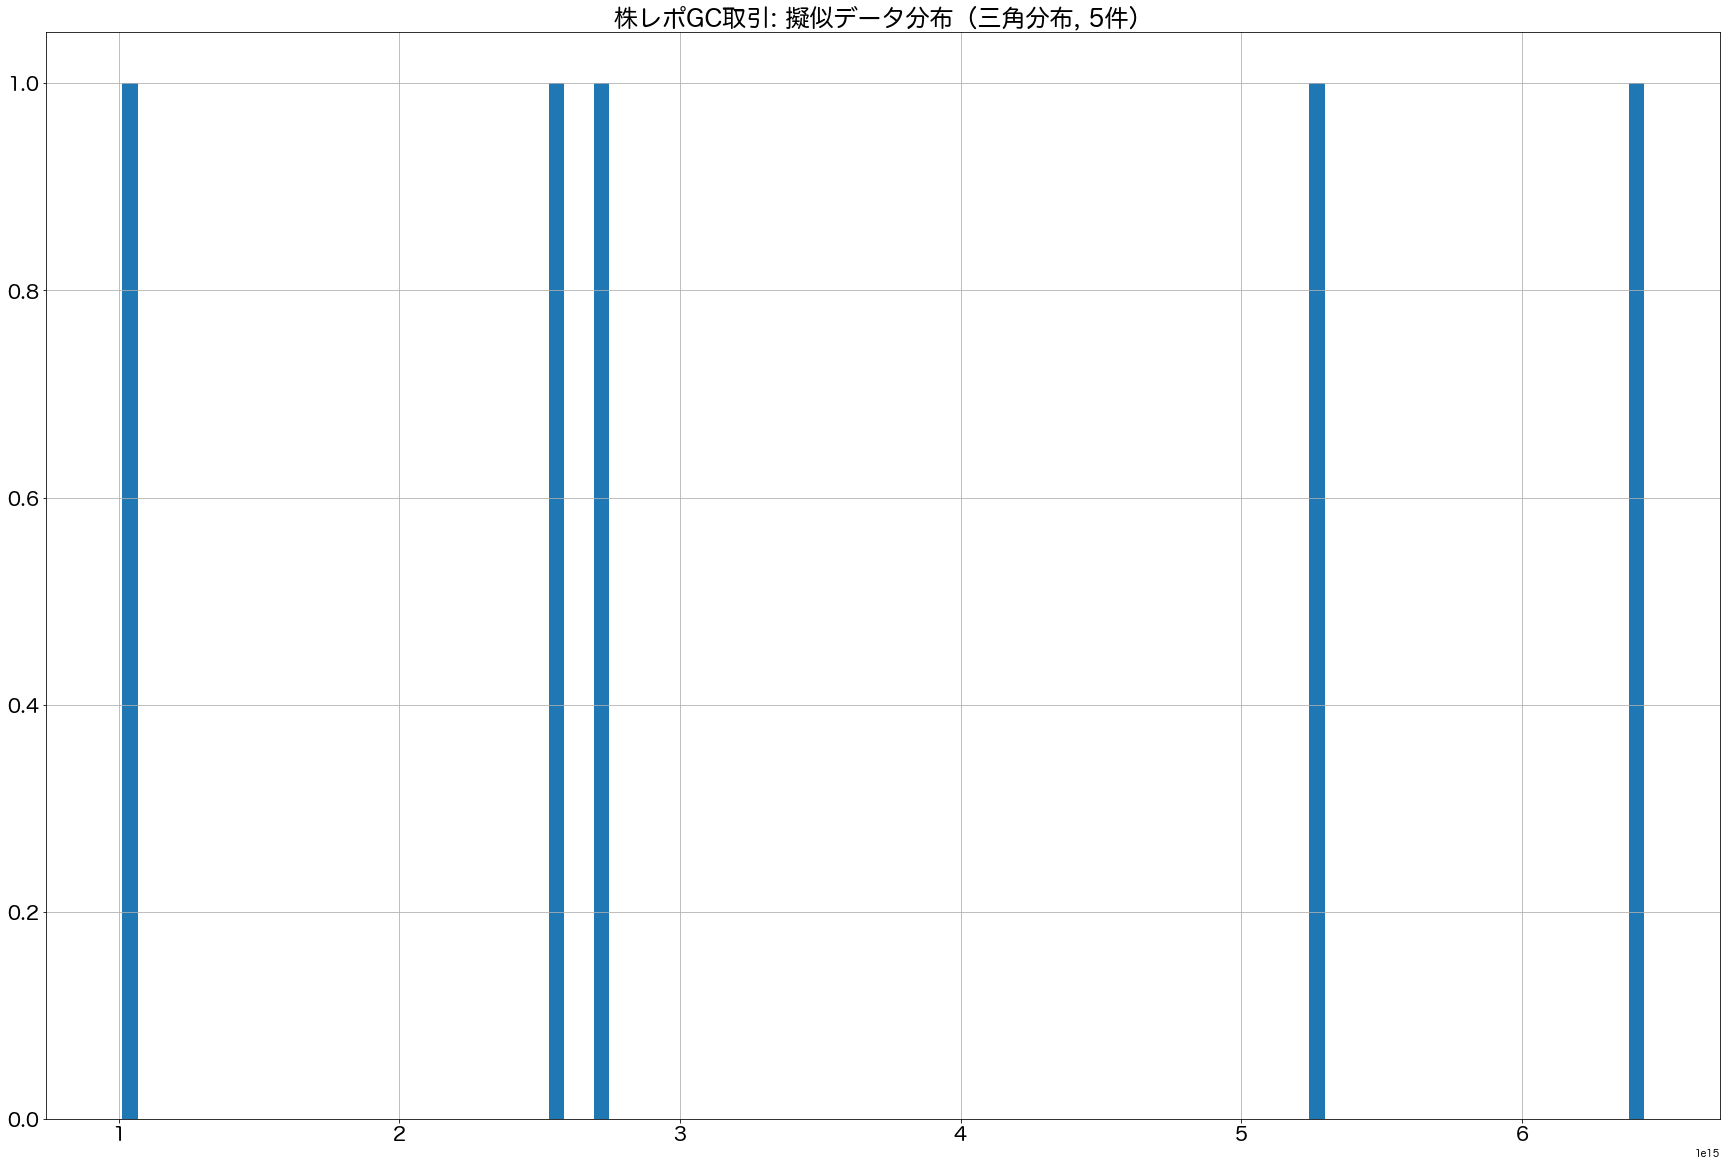

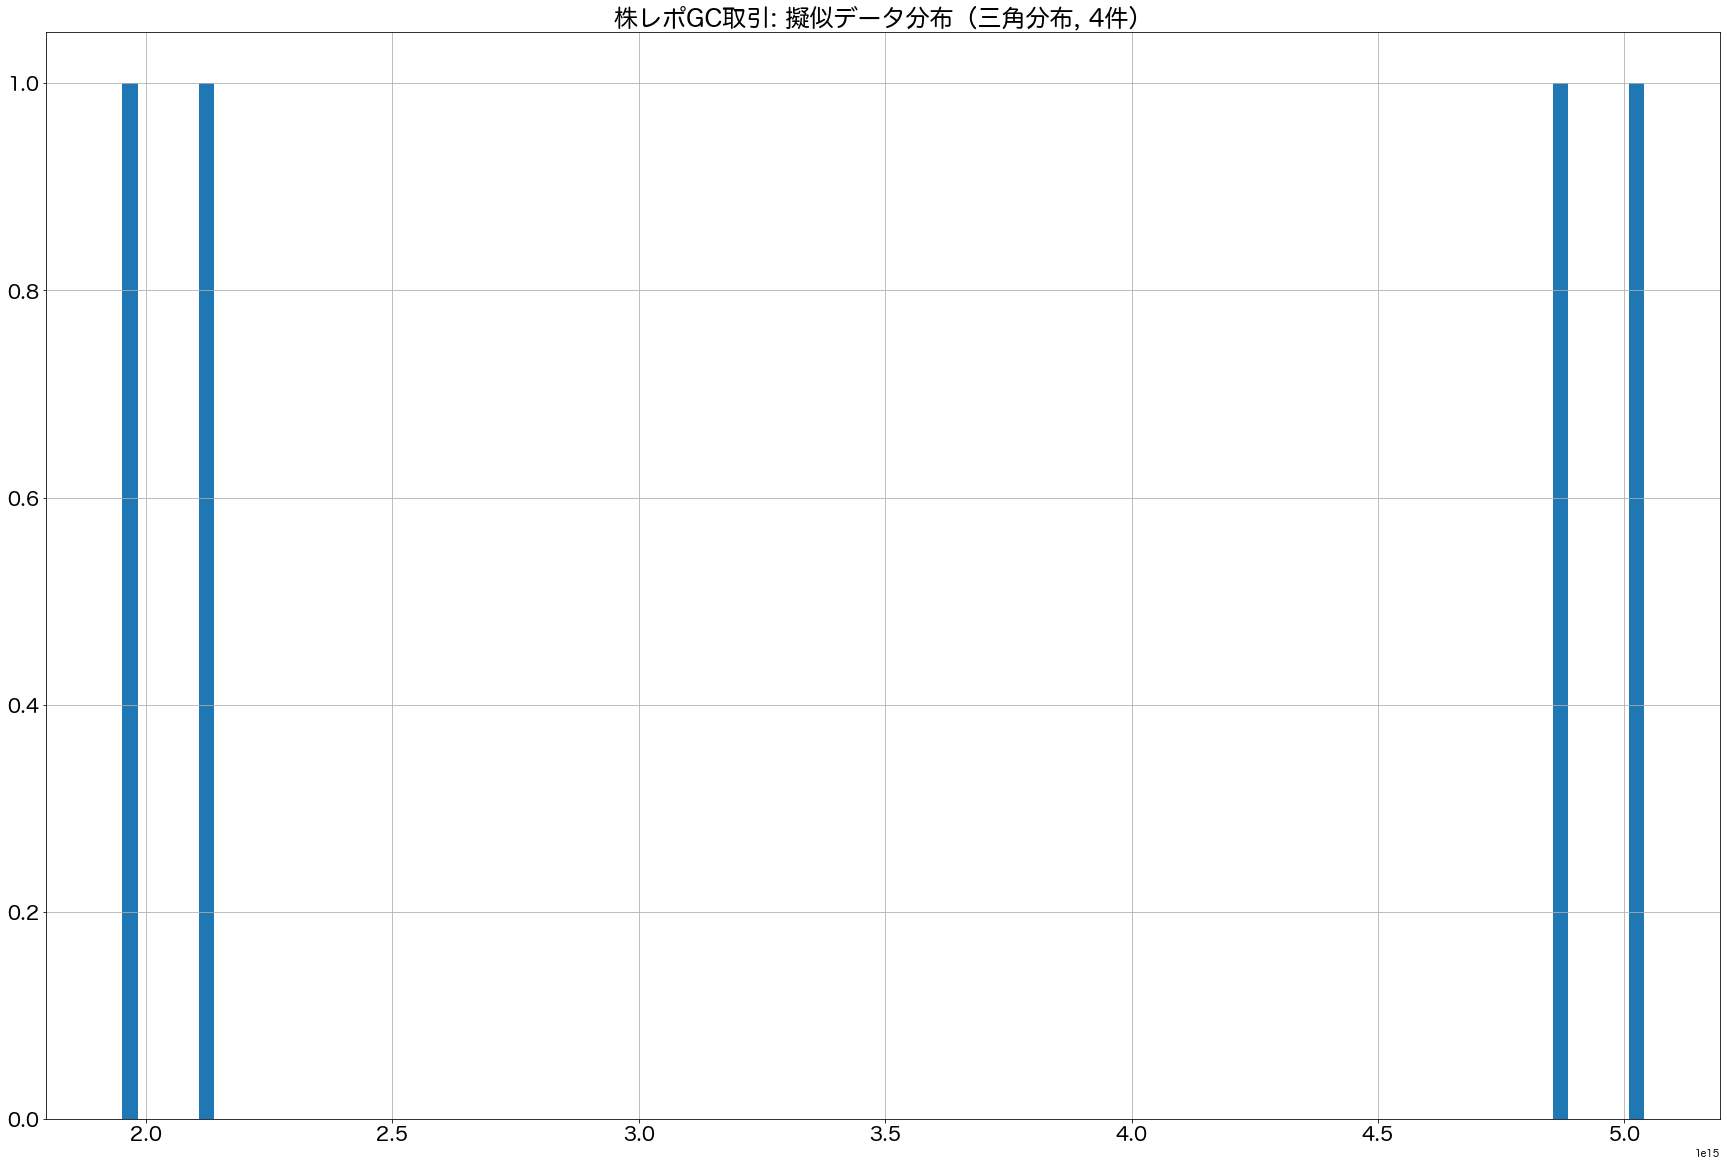

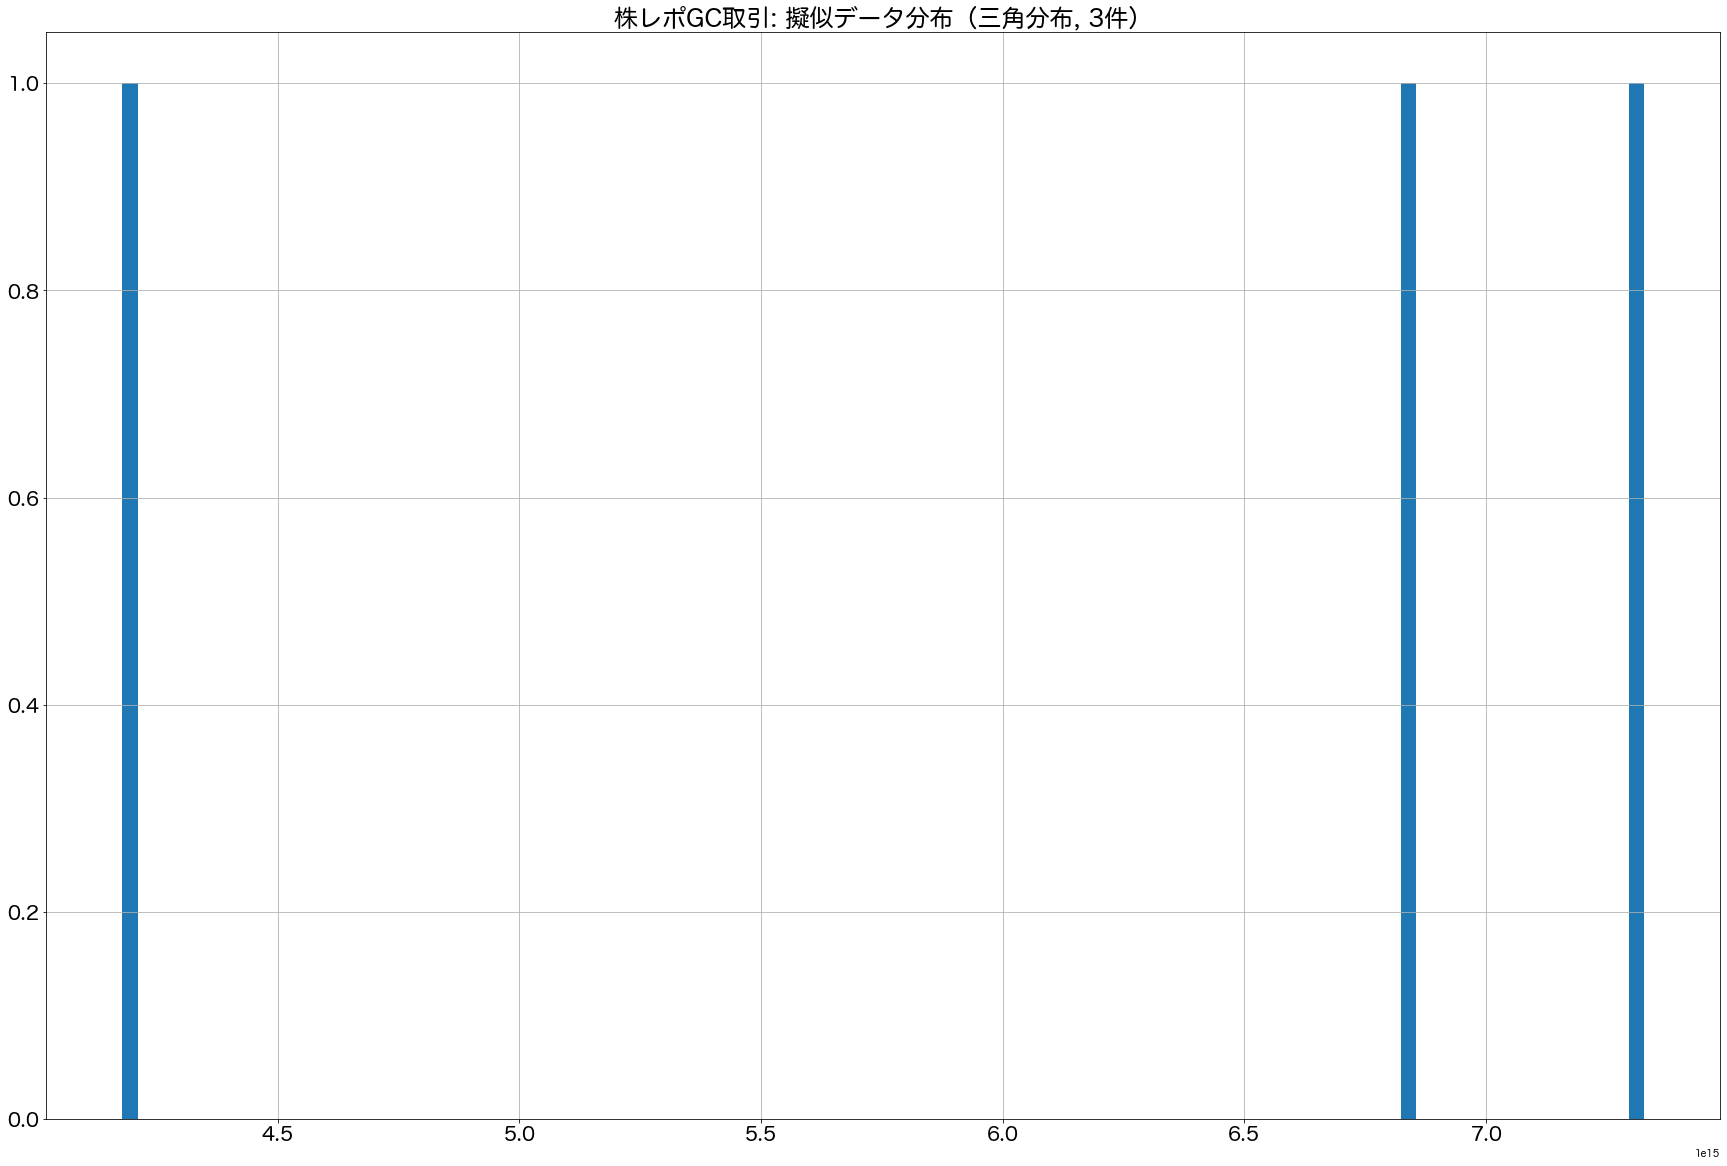

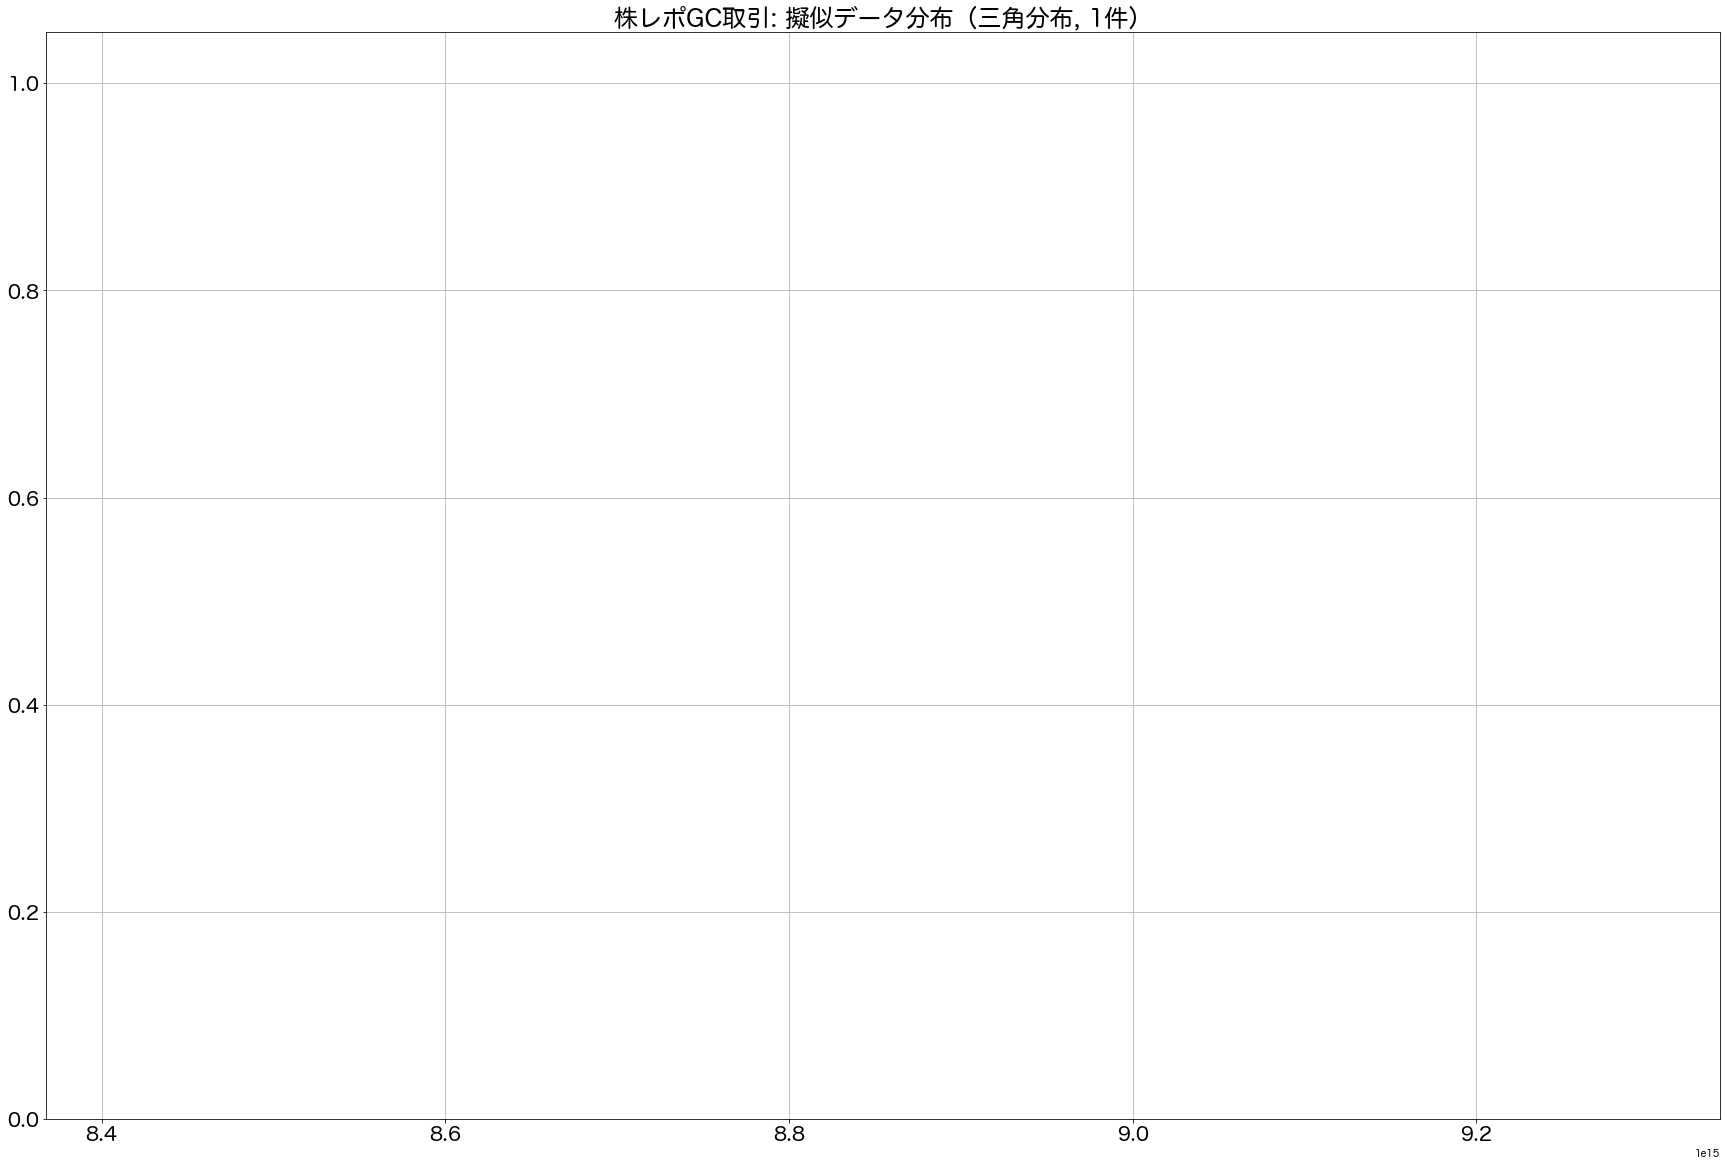

In [37]:
for _key, _value in additional_trade_nums.items():
    _num = _value['gc']
    all_price_dfs[_key]['gc'] = get_gc_price_df(_num)
all_price_dfs

#### 株レポSC取引

株レポ: SC取引金額
              1億円以内          1億円超          2億円超          5億円超         10億円超
ratio  7.400000e-01  9.000000e-02  1.100000e-01  4.000000e-02  2.000000e-02
min    1.000000e+03  1.000000e+08  2.000000e+08  5.000000e+08  1.000000e+09
max    1.000000e+08  2.000000e+08  5.000000e+08  1.000000e+09  1.000000e+10
株レポ: SC取引金額概観


<AxesSubplot:>

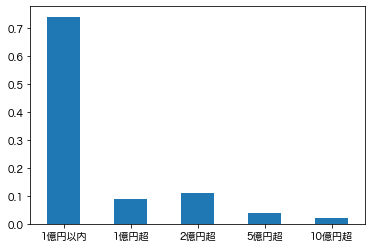

In [38]:
sc_price_column_labels = ['1億円以内', '1億円超', '2億円超', '5億円超', '10億円超']
sc_price_dist = pd.DataFrame([[0.74, 0.09, 0.11, 0.04, 0.02], [1.0e+3, 1.0e+8, 2.0e+8, 5.0e+8, 1.0e+9], [1.0e+8, 2.0e+8, 5.0e+8, 1.0e+9, 1.0e+10]],
                             columns=sc_price_column_labels,
                             index=['ratio', 'min', 'max'])
sc_price_ave = 1.34e+8
print('株レポ: SC取引金額')
pprint(sc_price_dist)
print('='*50)
print('株レポ: SC取引金額概観')
sc_price_dist.T['ratio'].plot(kind='bar', rot=0)

株レポ: SC取引金額ヒストグラム


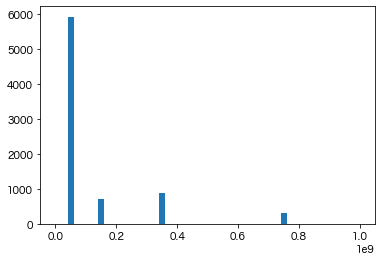

In [39]:
sc_trade_num = 8000
sc_ave_price_list = (sc_price_dist.T['min'] + sc_price_dist.T['max']) / 2
sc_sample = [[ave]*int(sc_price_dist.T['ratio'][index] * sc_trade_num)  for (index, ave) in enumerate(sc_ave_price_list)]
plt.hist(list(itertools.chain.from_iterable(sc_sample)), bins=50, range=(0, 1.0e+9))
print('株レポ: SC取引金額ヒストグラム')

In [40]:
def get_sc_price_df(trade_num):
    sc_price_max = sc_price_dist['10億円超']['max']
    sc_price_min = sc_price_dist['1億円以内']['min']
    mock_sc_price_df = pd.DataFrame(np.random.triangular(sc_price_min, sc_price_ave, sc_price_max, trade_num)) * 1.0e+5
    mock_sc_price_df.hist(bins=100, figsize=(30, 20))
    plt.title(f'株レポSC取引: 擬似データ分布（三角分布, {trade_num}件）', fontsize=24)
    return mock_sc_price_df

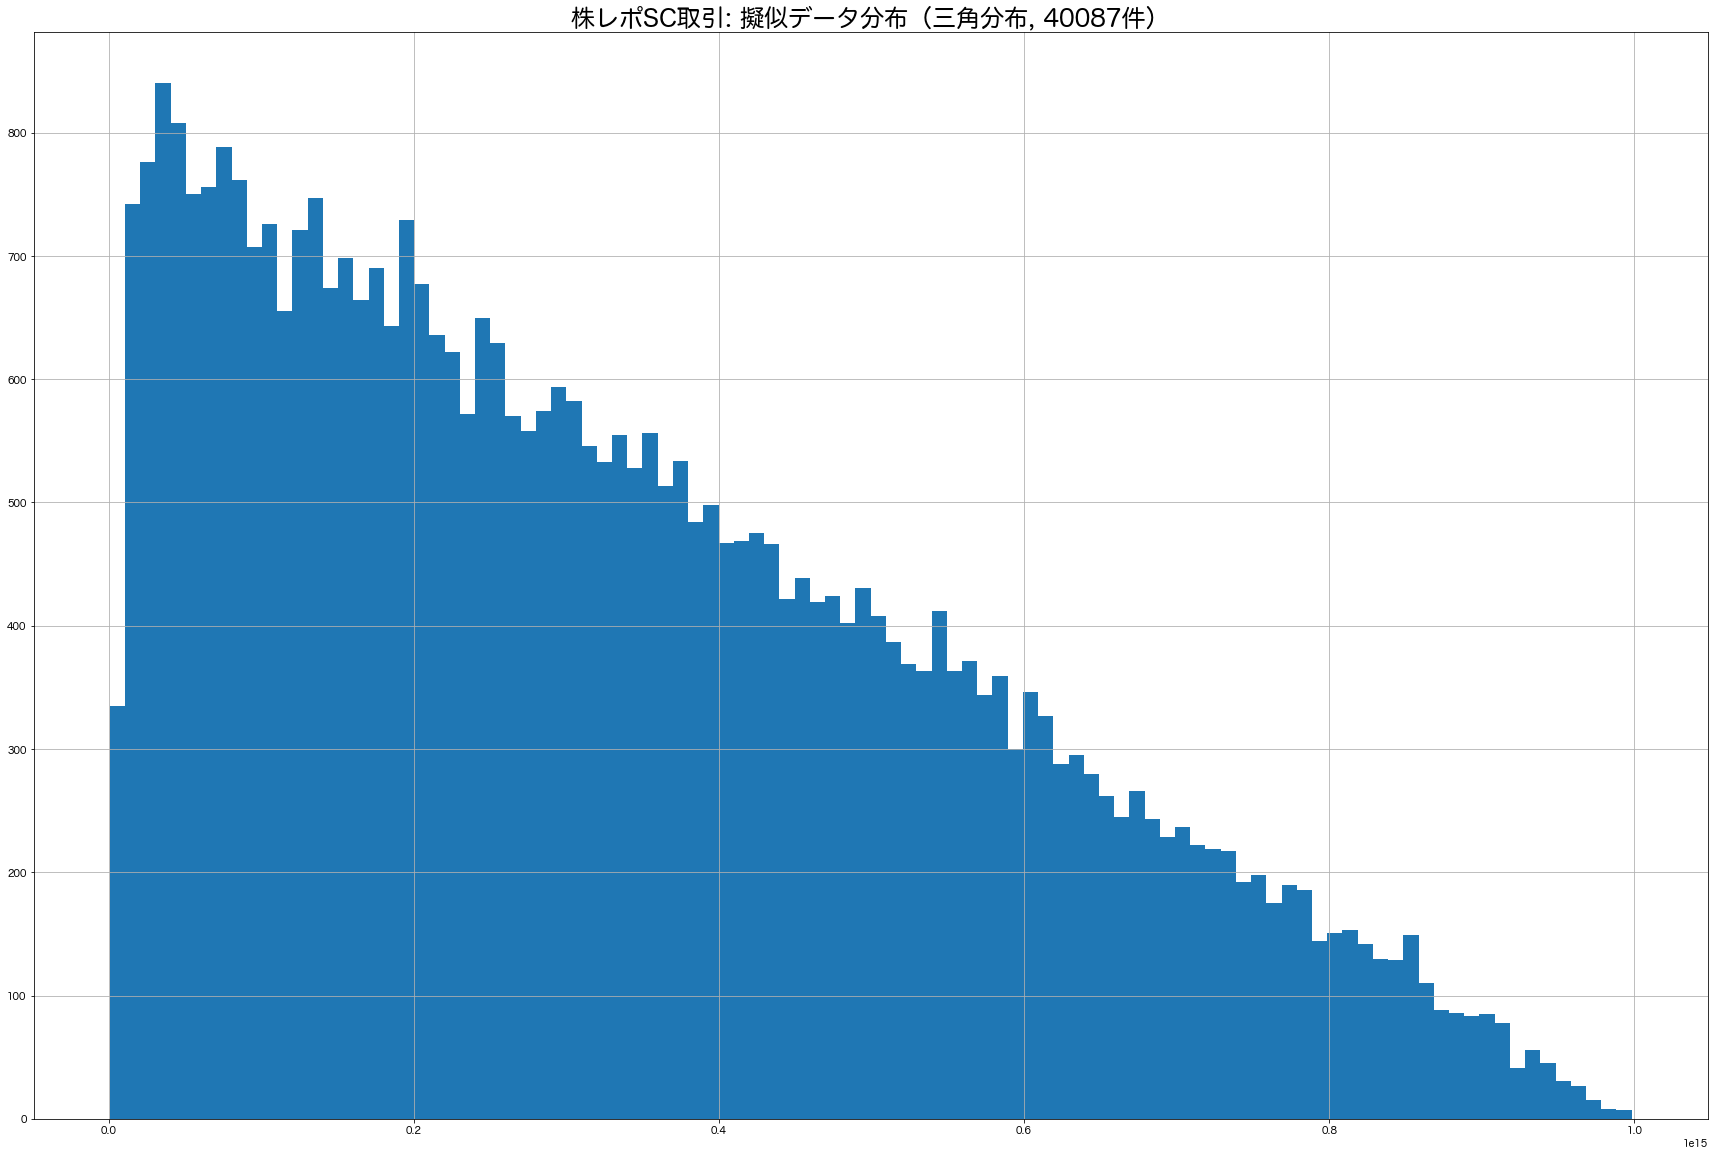

In [41]:
mock_sc_trade_8000_df = get_sc_price_df(b_trade_nums['100%']['sc'])

{'gc':                0
 0   1.025009e+15
 1   5.434984e+15
 2   3.987572e+15
 3   3.401228e+15
 4   8.831180e+14
 5   4.885417e+15
 6   3.573421e+15
 7   1.716843e+15
 8   5.176331e+15
 9   8.403021e+15
 10  3.973310e+15,
 'sc':                0
 0   1.385620e+14
 1   1.472621e+14
 2   5.939780e+14
 3   6.956352e+14
 4   5.248691e+14
 ..           ...
 69  3.996899e+13
 70  3.134765e+14
 71  4.445739e+14
 72  2.209500e+14
 73  8.254116e+14
 
 [74 rows x 1 columns]}

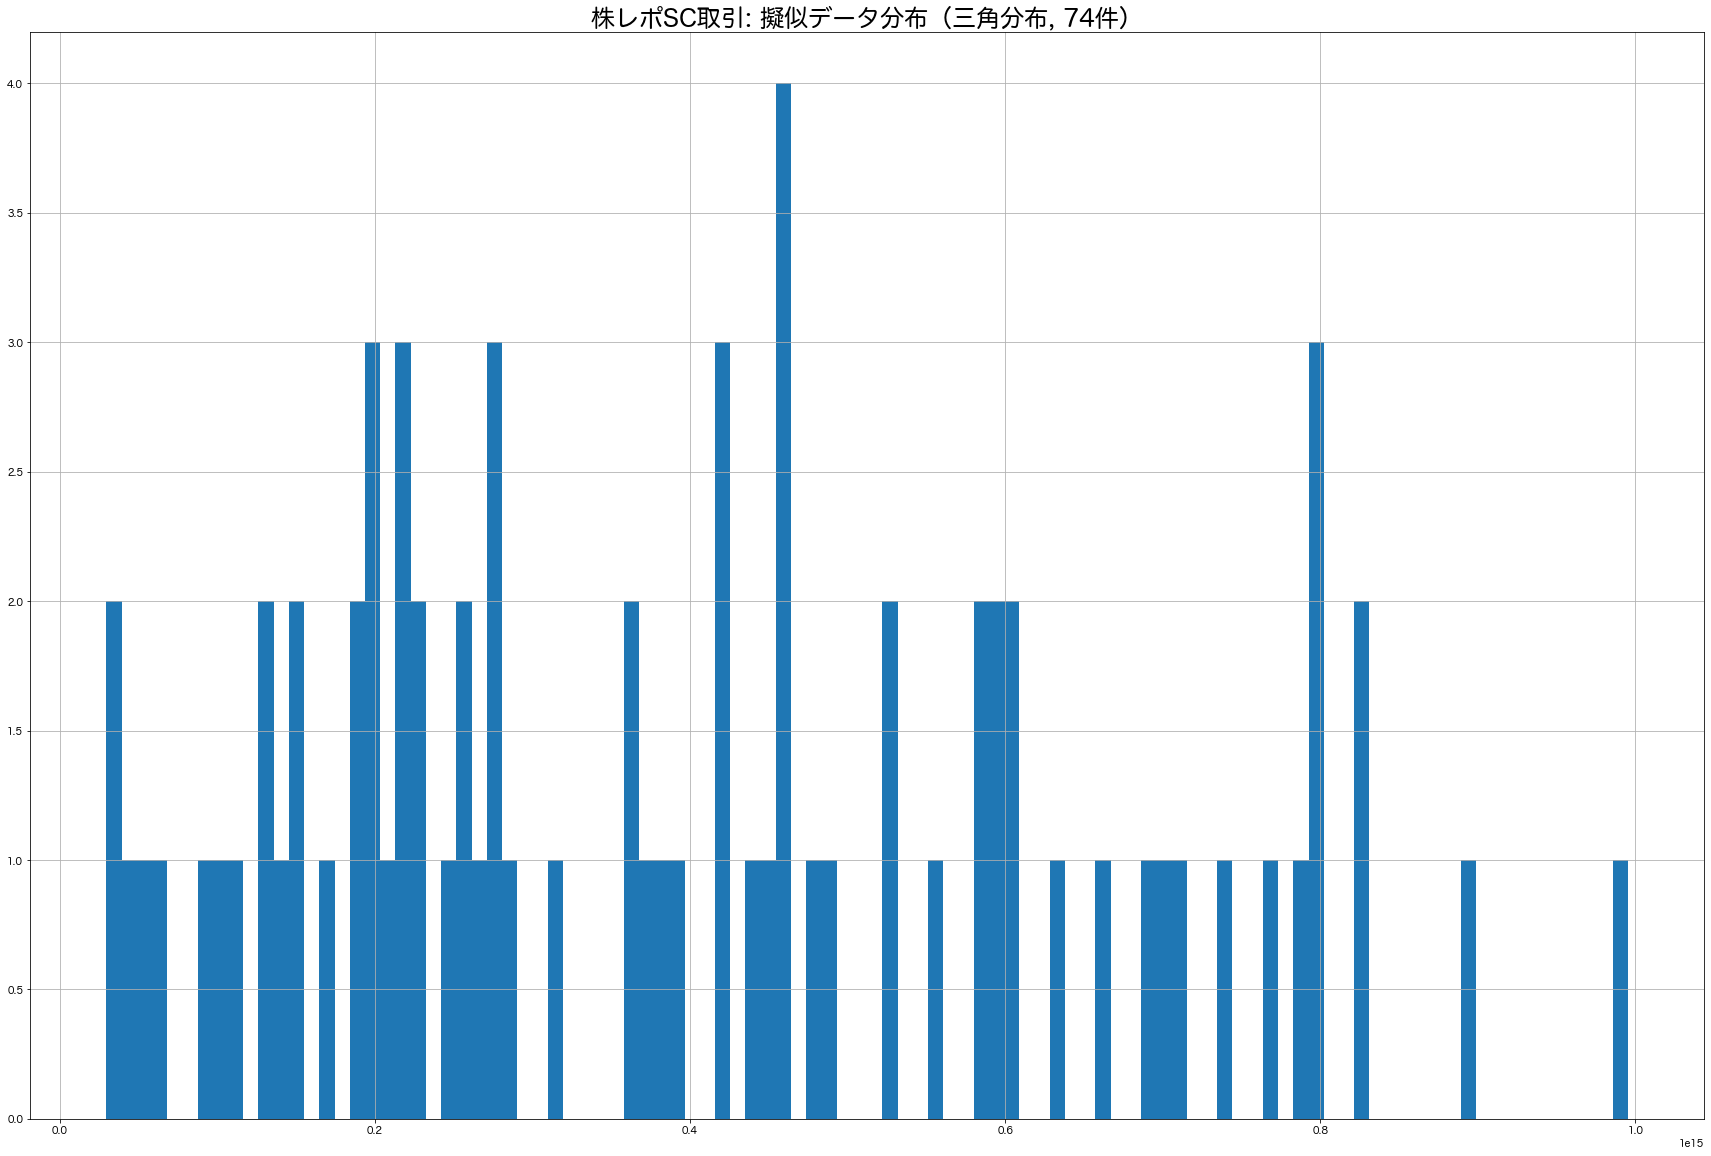

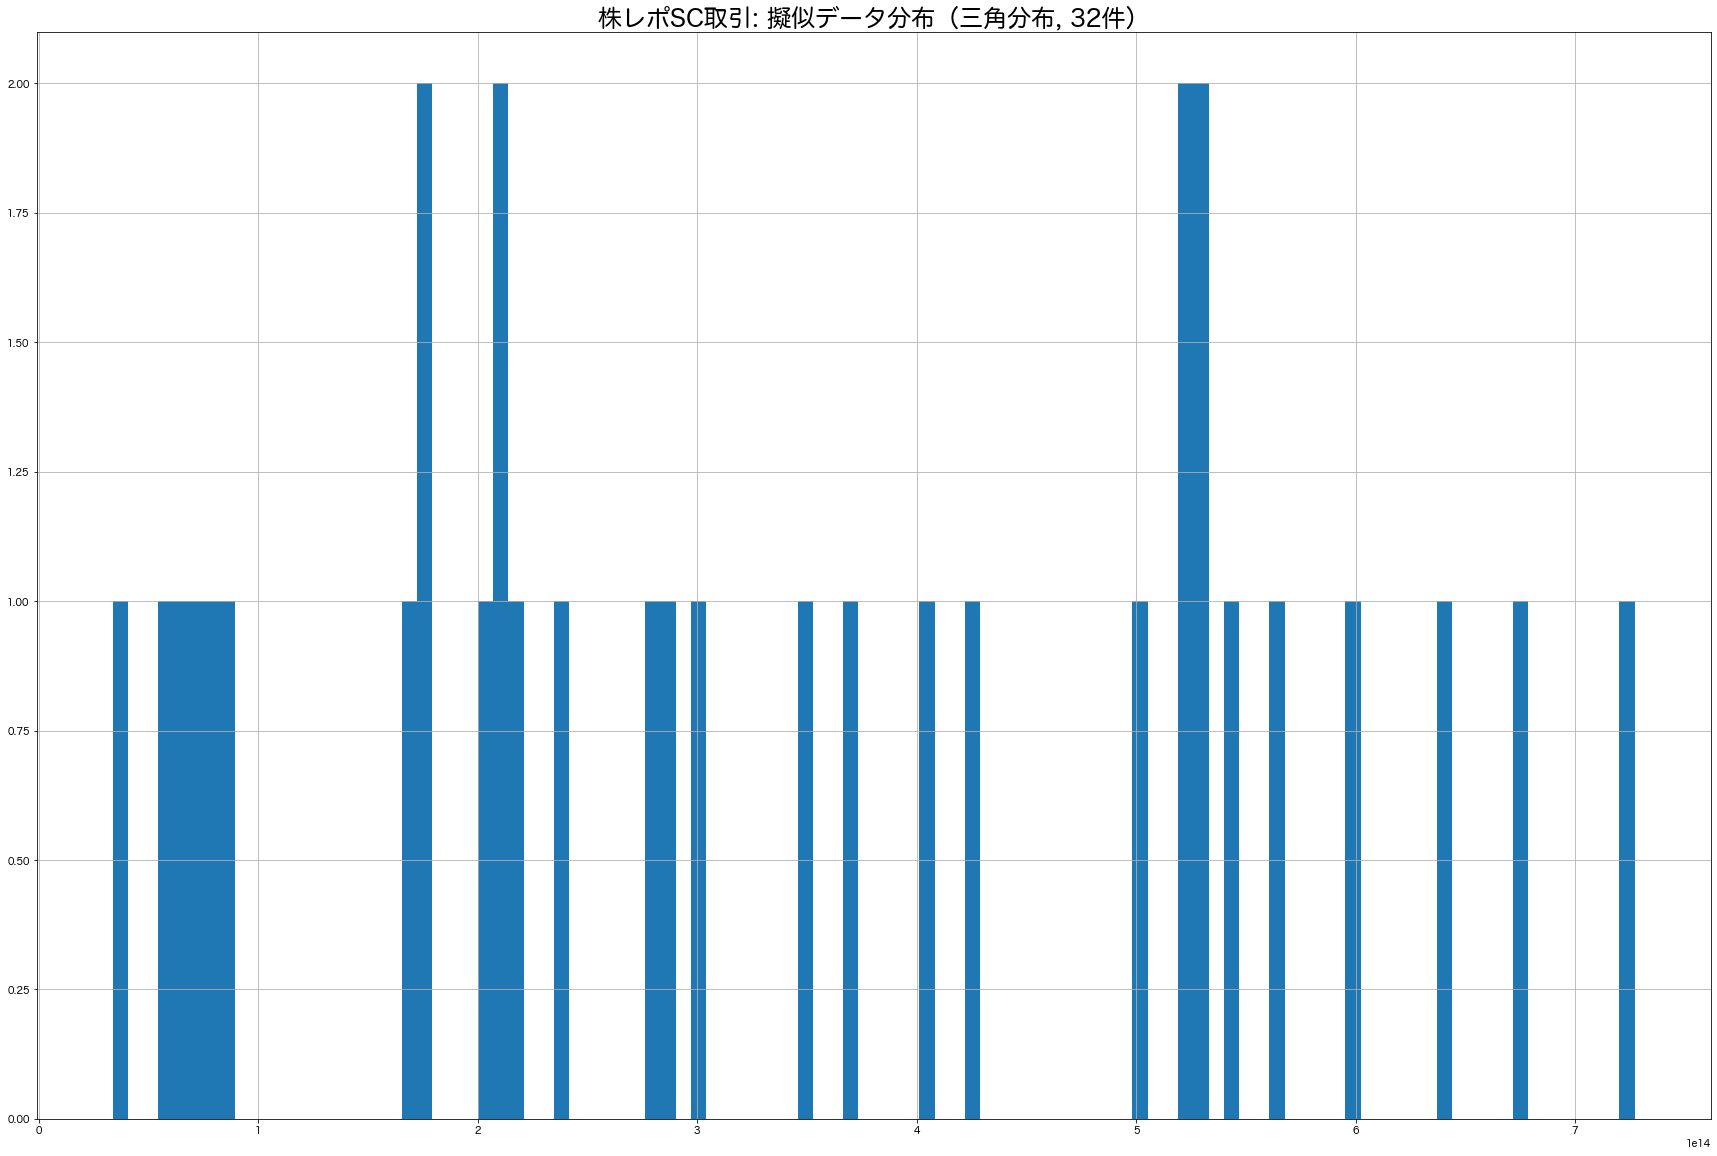

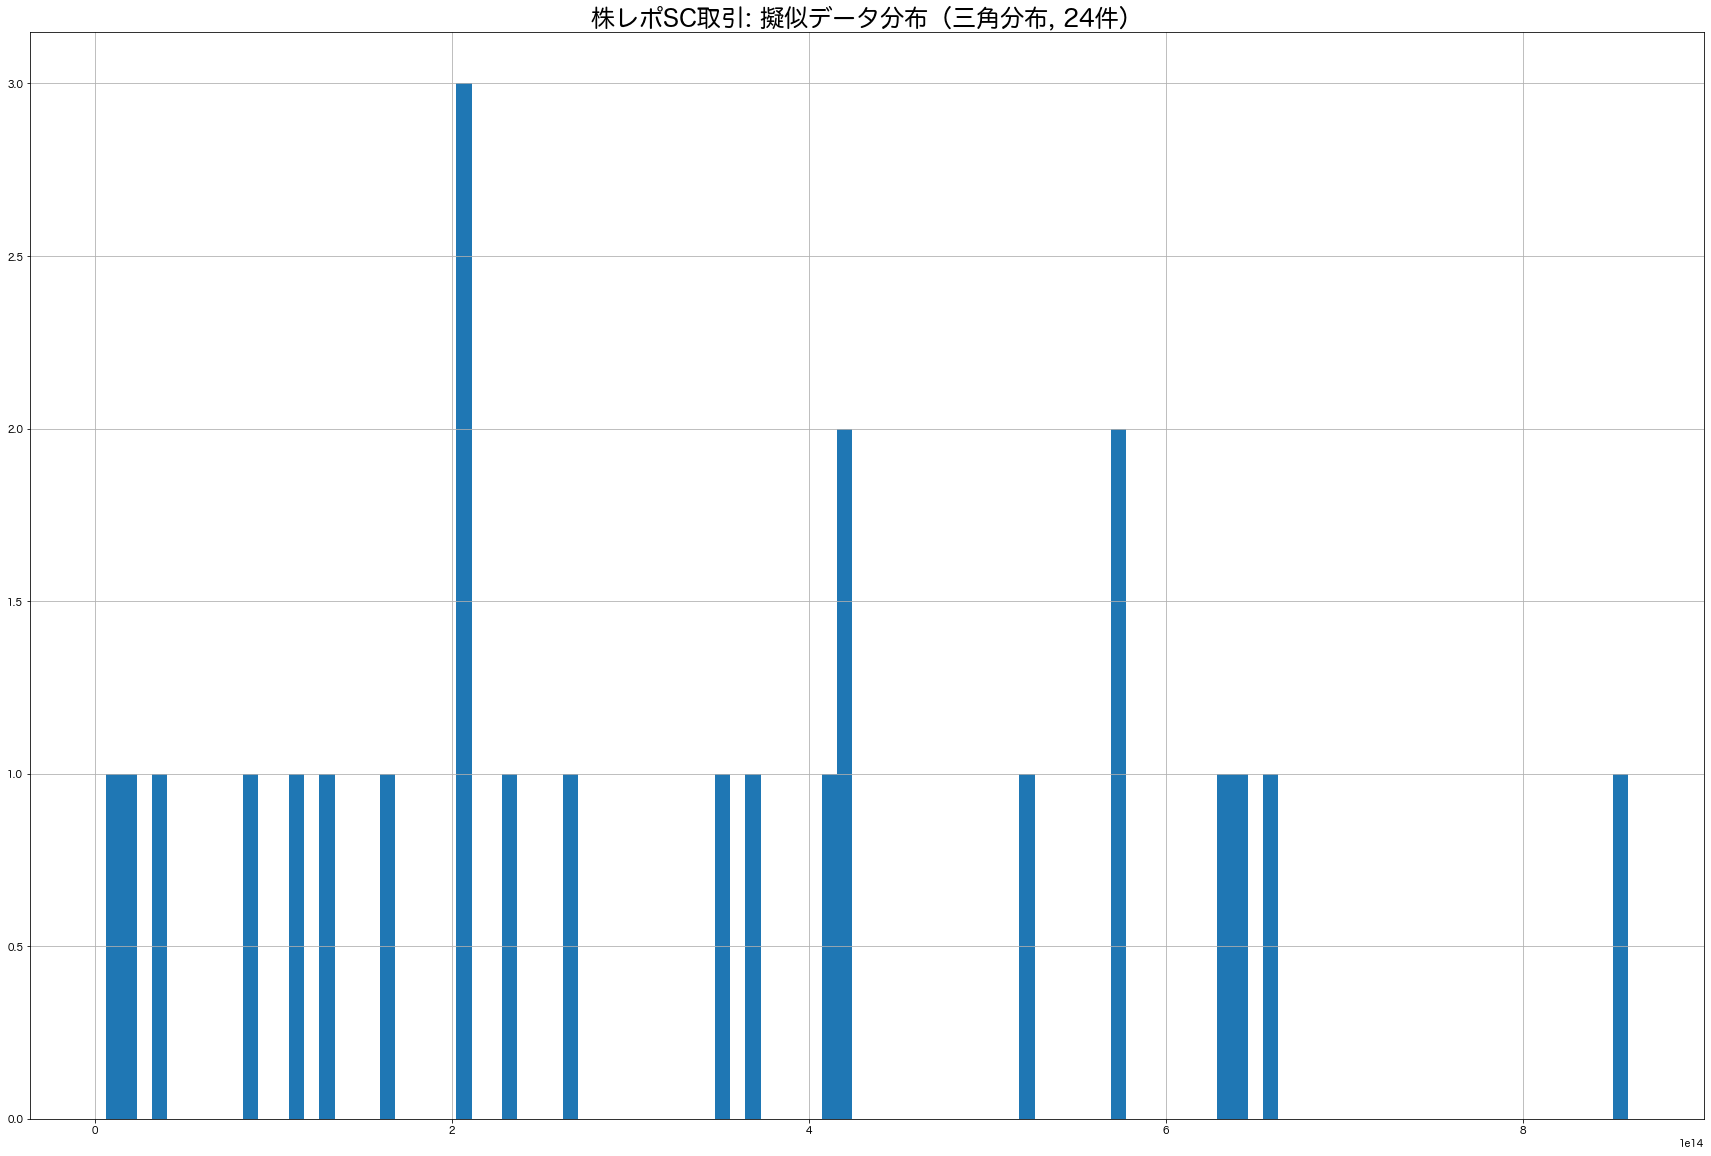

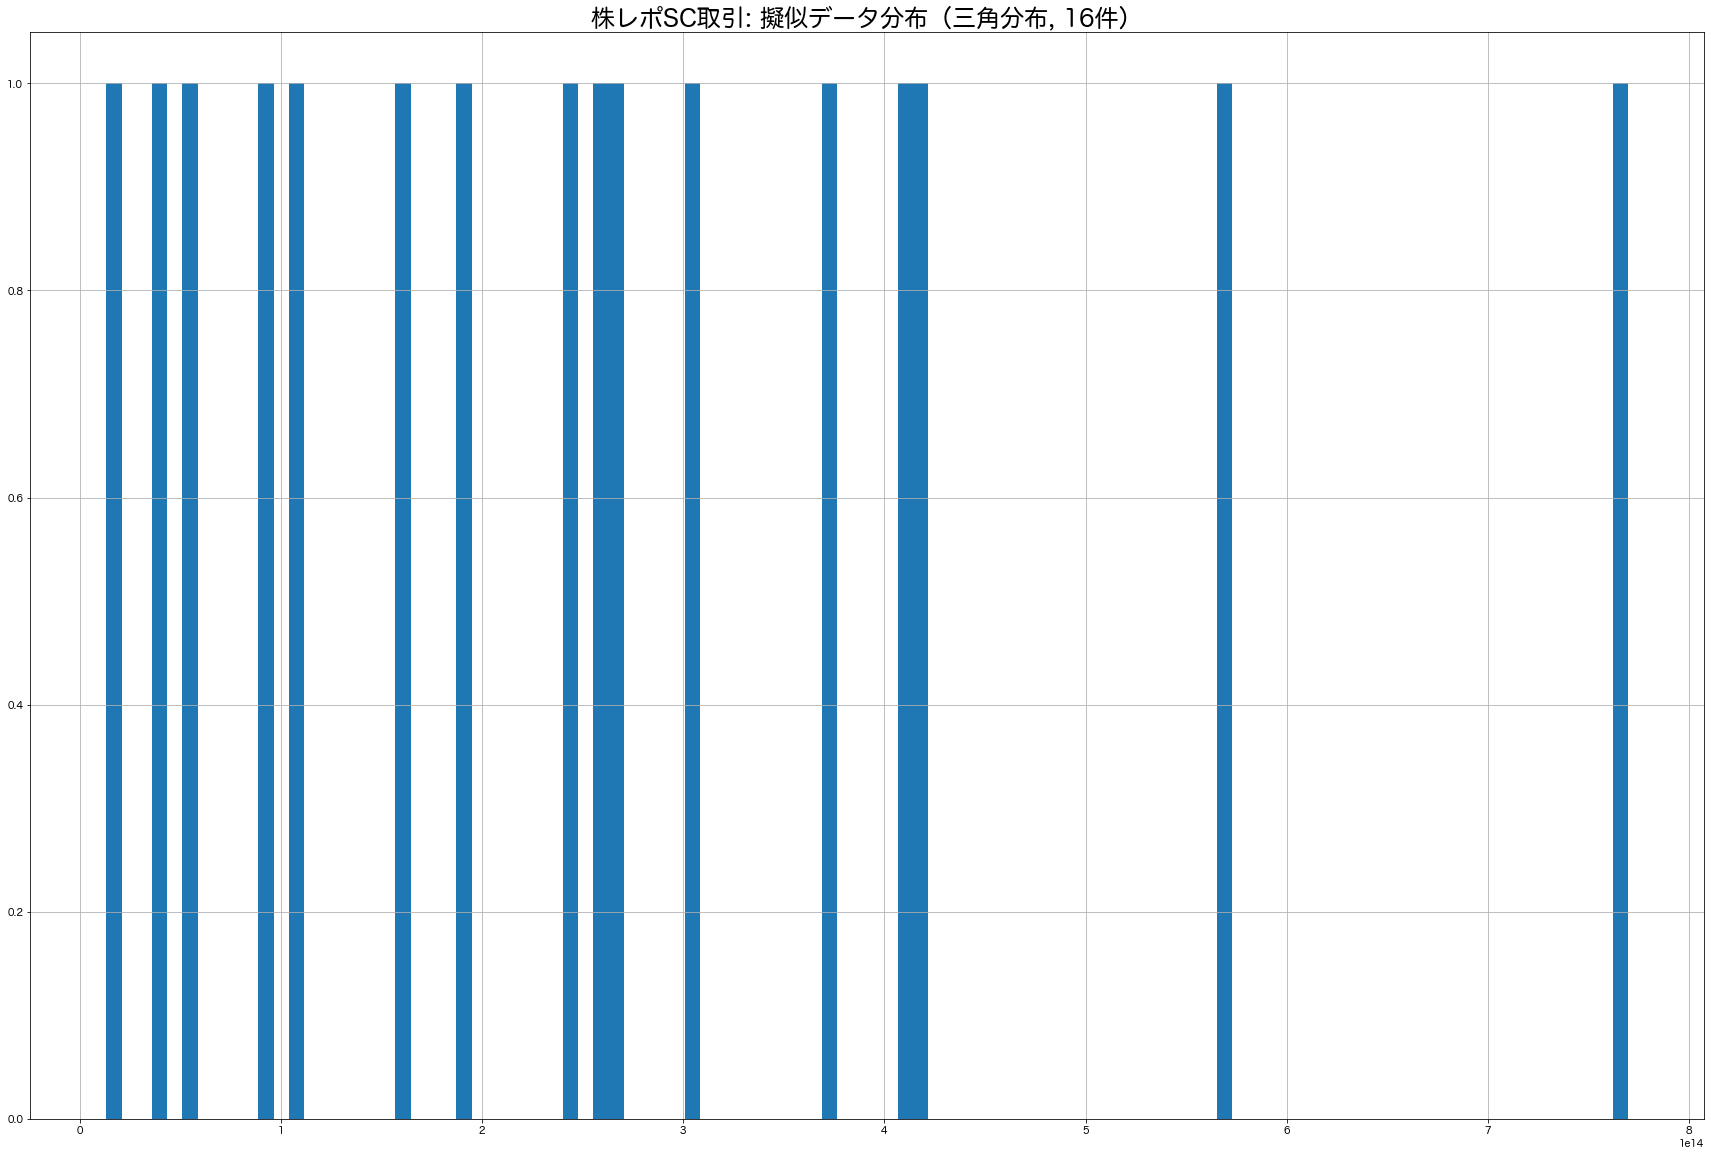

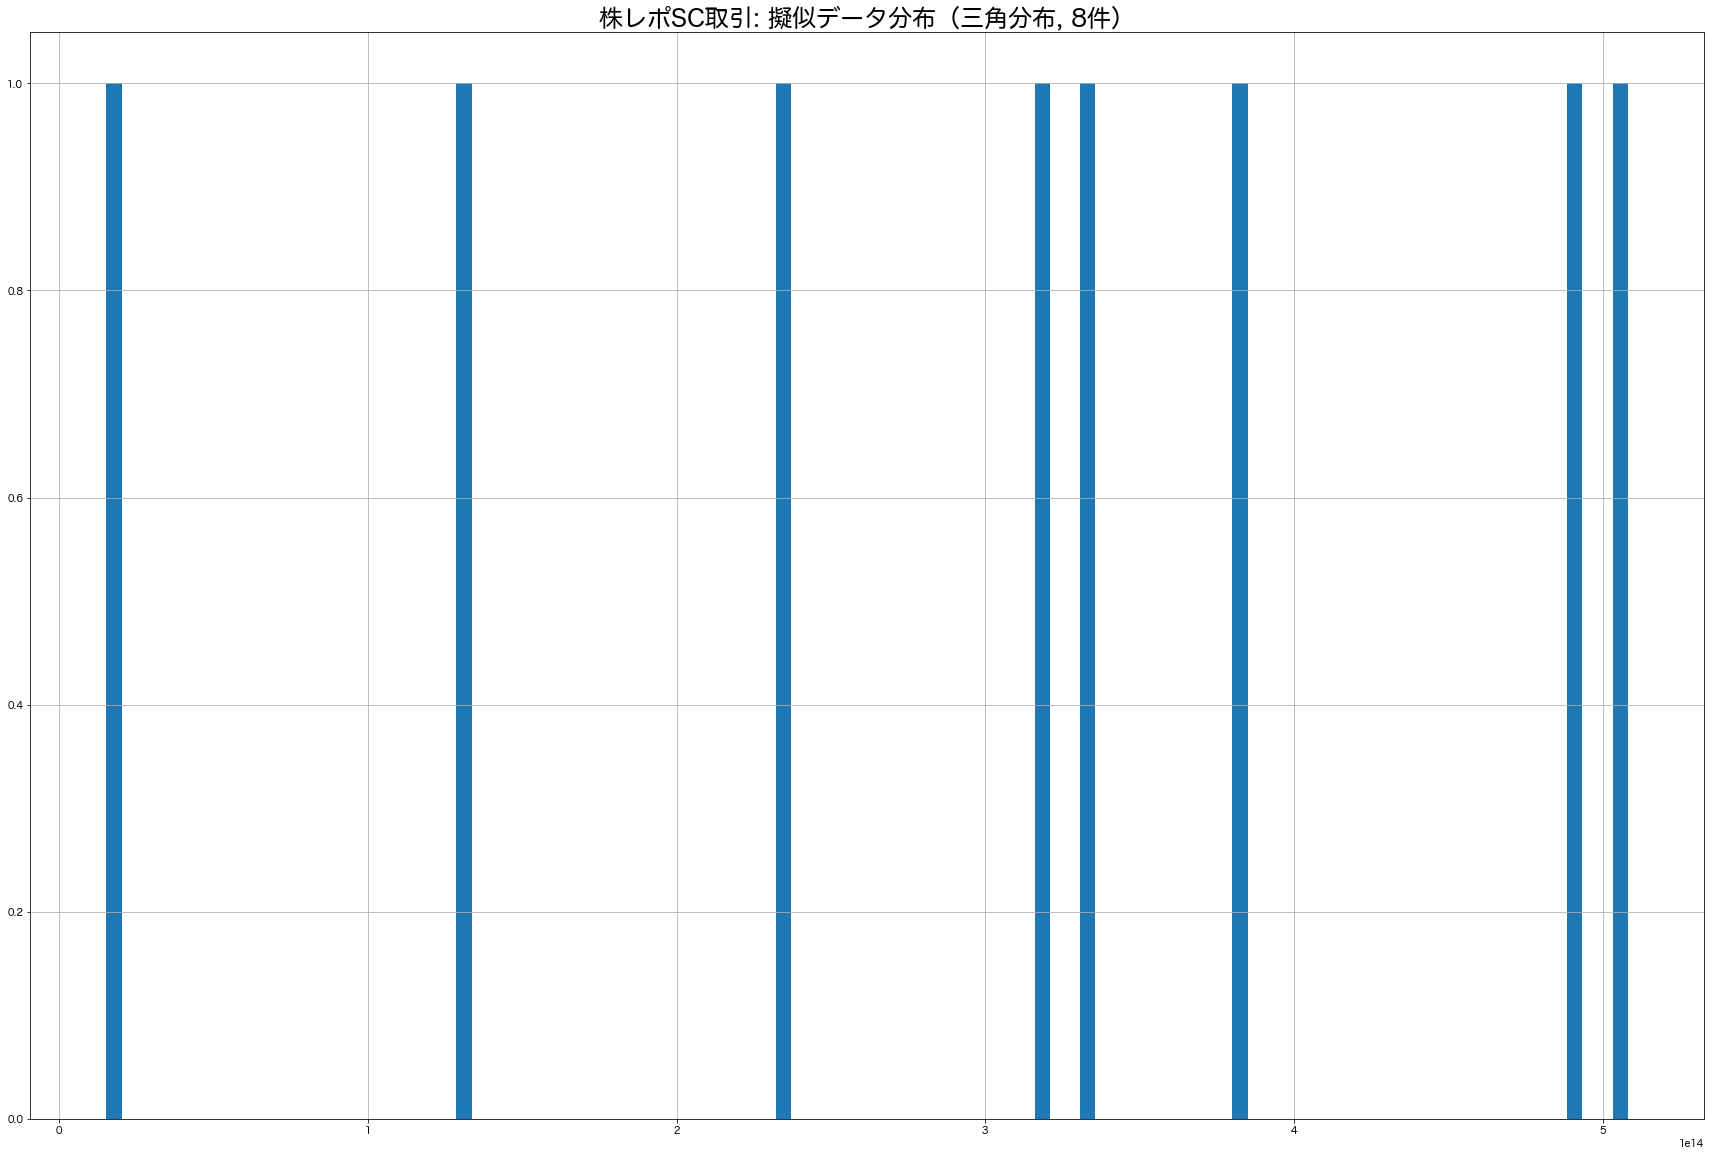

In [43]:
for _key, _value in additional_trade_nums.items():
    _num = _value['sc']
    all_price_dfs[_key]['sc'] = get_sc_price_df(_num)
all_price_dfs['460']

#### 債券

債券レポ取引: 
             10億円以内         10億円超         50億円超        100億円超        500億円超
ratio  1.200000e-01  3.100000e-01  1.900000e-01  3.100000e-01  7.000000e-02
min    1.000000e+08  1.000000e+09  5.000000e+09  1.000000e+10  5.000000e+10
max    1.000000e+09  5.000000e+09  1.000000e+10  5.000000e+10  5.000000e+11


<AxesSubplot:title={'center':'債券レポ取引: 概観'}>

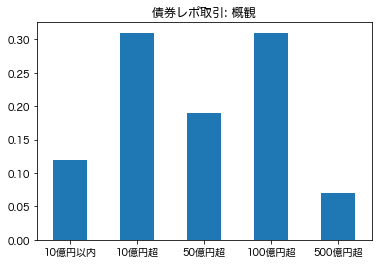

In [44]:
bond_price_column_labels = ['10億円以内', '10億円超', '50億円超', '100億円超', '500億円超']
bond_price_dist = pd.DataFrame([[0.12, 0.31, 0.19, 0.31, 0.07], [1.0e+8, 1.0e+9, 5.0e+9, 1.0e+10, 5.0e+10], [1.0e+9, 5.0e+9, 1.0e+10, 5.0e+10, 5.0e+11]],
                             columns=bond_price_column_labels,
                             index=['ratio', 'min', 'max'])
bond_price_ave = 113.0e+8
print('債券レポ取引: ')
pprint(bond_price_dist)
print('='*50)

plt.title('債券レポ取引: 概観')
bond_price_dist.T['ratio'].plot(kind='bar', rot=0)

債券レポ: 取引金額ヒストグラム


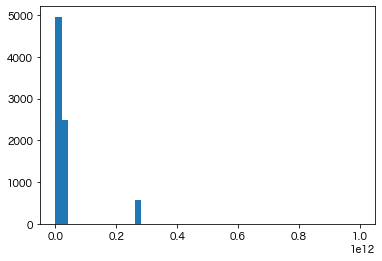

In [45]:
bond_trade_num = 8000
bond_ave_price_list = (bond_price_dist.T['min'] + bond_price_dist.T['max']) / 2
bond_sample = [[ave]*int(bond_price_dist.T['ratio'][index] * bond_trade_num)  for (index, ave) in enumerate(bond_ave_price_list)]
plt.hist(list(itertools.chain.from_iterable(bond_sample)), bins=50, range=(0, 1.0e+12))
print('債券レポ: 取引金額ヒストグラム')

In [46]:
def get_bond_price_df(trade_num):
    bond_price_max = bond_price_dist['500億円超']['max']
    bond_price_min = bond_price_dist['10億円以内']['min']
    mock_bond_price_df = pd.DataFrame(np.random.triangular(bond_price_min, bond_price_ave, bond_price_max, trade_num)) * 1.0e+5
    mock_bond_price_df.hist(bins=100, figsize=(30, 20))
    plt.title(f'債券レポ取引: 擬似データ分布（三角分布, {trade_num}件）', fontsize=24)
    return mock_bond_price_df

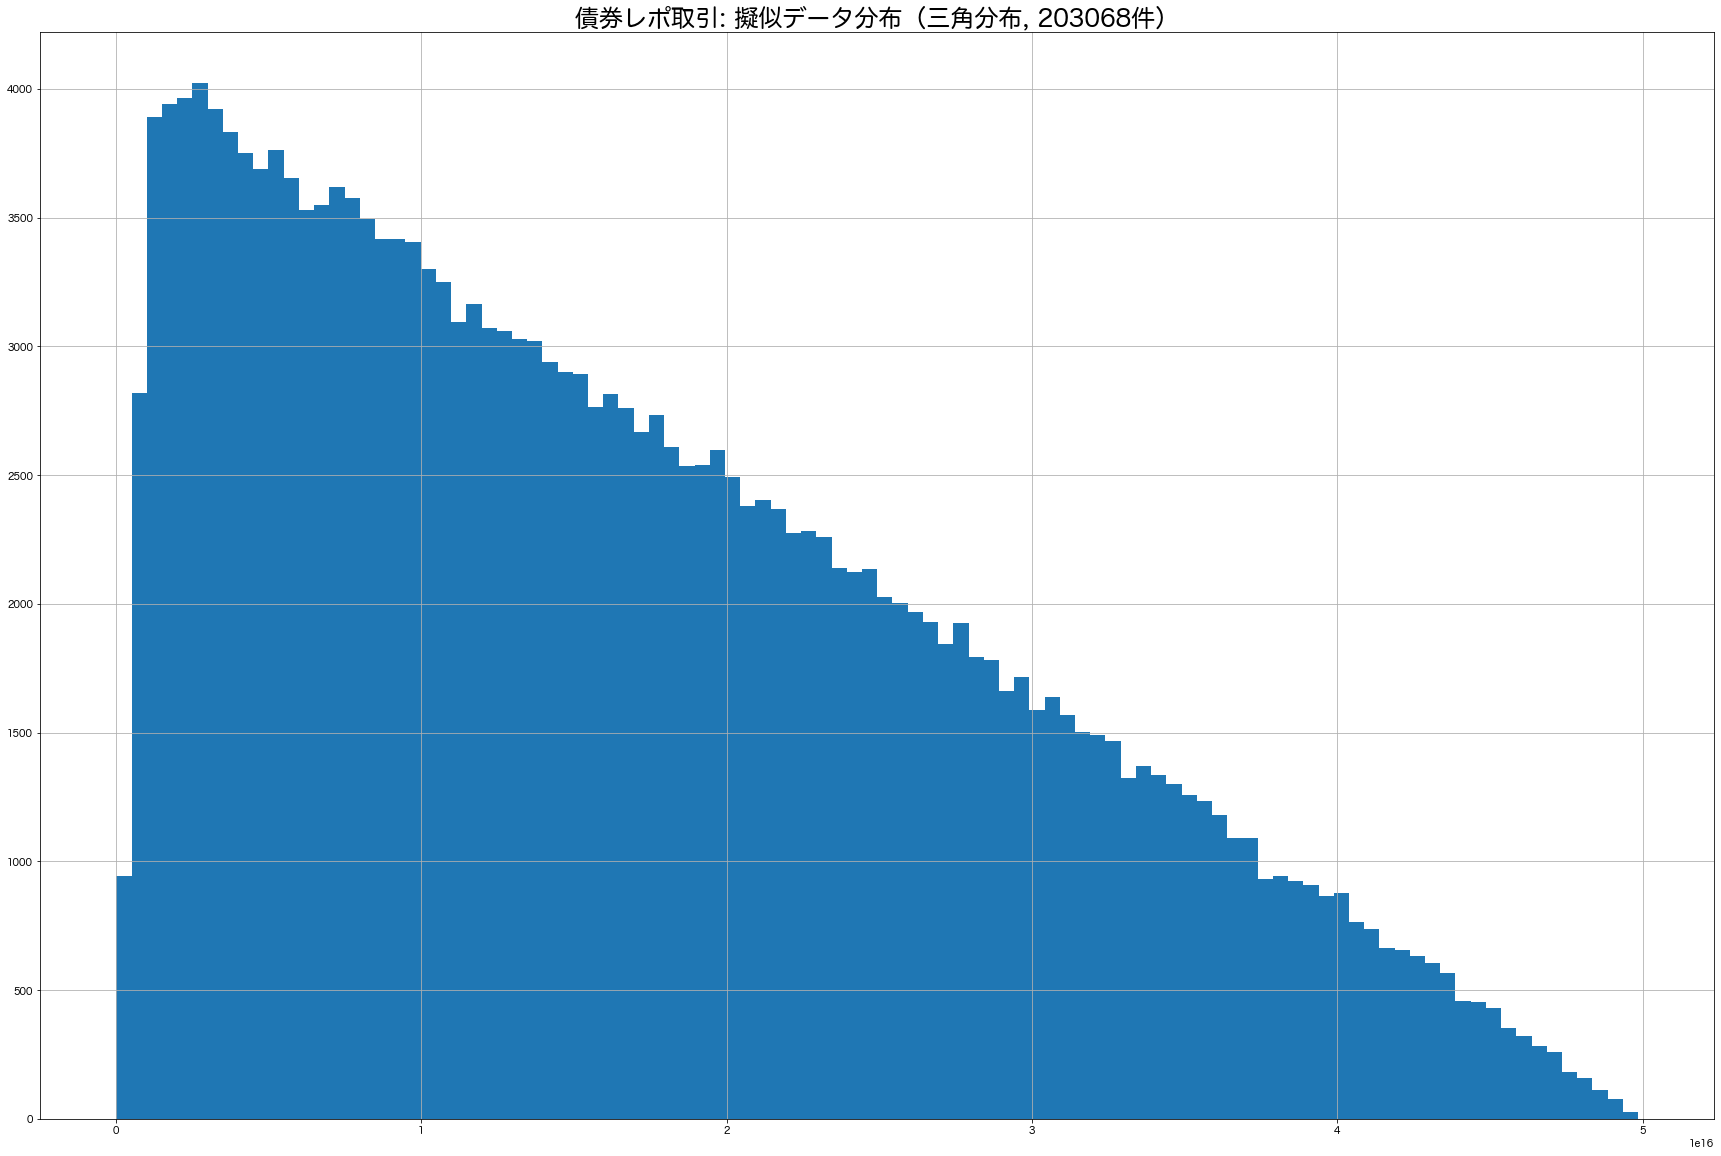

In [47]:
mock_bond_trade_8000_df = get_bond_price_df(b_trade_nums['100%']['bond'])

{'gc':               0
 0  1.013723e+15
 1  6.435510e+15
 2  2.559784e+15
 3  2.701019e+15
 4  5.243717e+15,
 'sc':                0
 0   1.743958e+14
 1   5.996641e+14
 2   1.667789e+14
 3   5.218337e+14
 4   5.621577e+14
 5   6.823049e+13
 6   8.395993e+13
 7   2.877866e+14
 8   2.187465e+14
 9   5.415729e+14
 10  5.196726e+14
 11  7.679606e+13
 12  2.396167e+14
 13  6.784115e+14
 14  5.296816e+14
 15  3.526336e+14
 16  2.001320e+14
 17  5.290389e+14
 18  7.080994e+13
 19  4.056630e+14
 20  2.773400e+14
 21  6.409583e+14
 22  3.669718e+14
 23  3.023083e+14
 24  4.280504e+14
 25  2.103052e+14
 26  2.081913e+14
 27  1.771412e+14
 28  5.039312e+14
 29  7.271594e+14
 30  3.365762e+13
 31  5.864830e+13,
 'bond':                 0
 0    7.397593e+15
 1    1.195991e+16
 2    1.625115e+16
 3    3.000968e+16
 4    1.957219e+15
 ..            ...
 158  3.072567e+16
 159  1.814621e+16
 160  8.655589e+15
 161  2.607200e+16
 162  3.116559e+15
 
 [163 rows x 1 columns]}

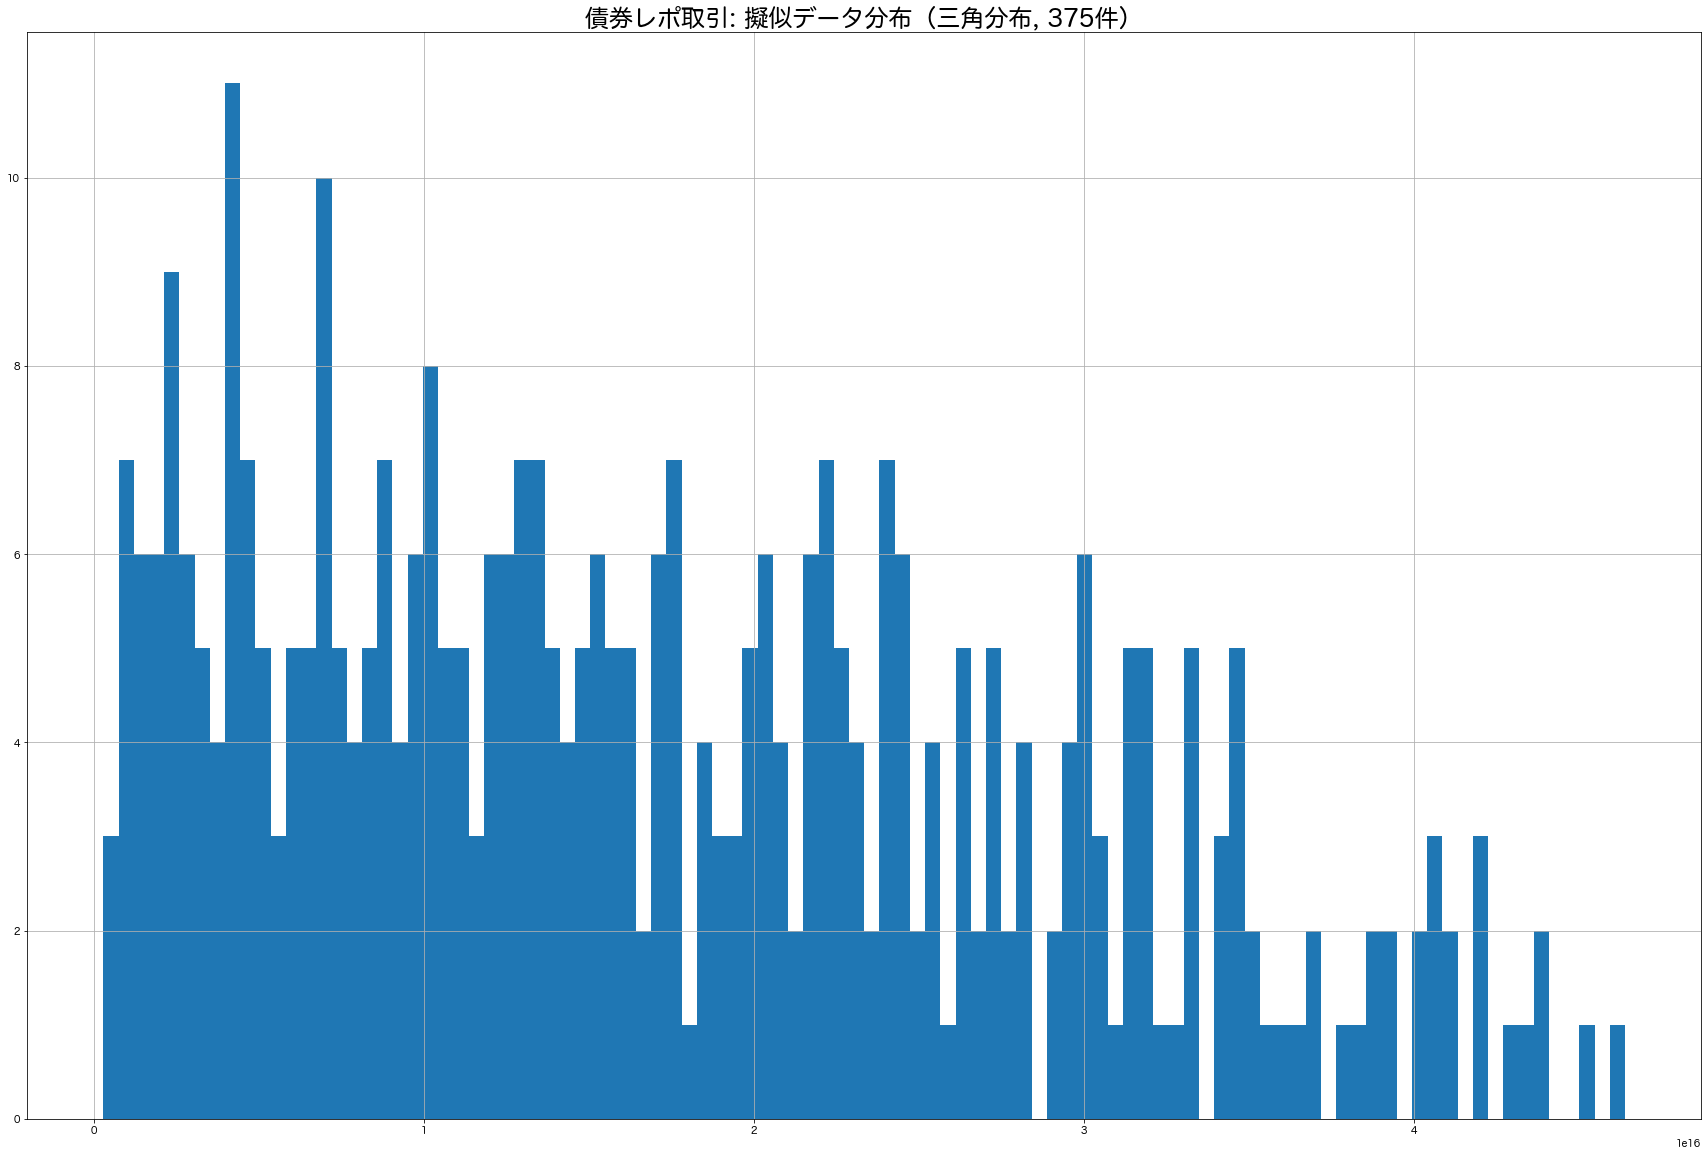

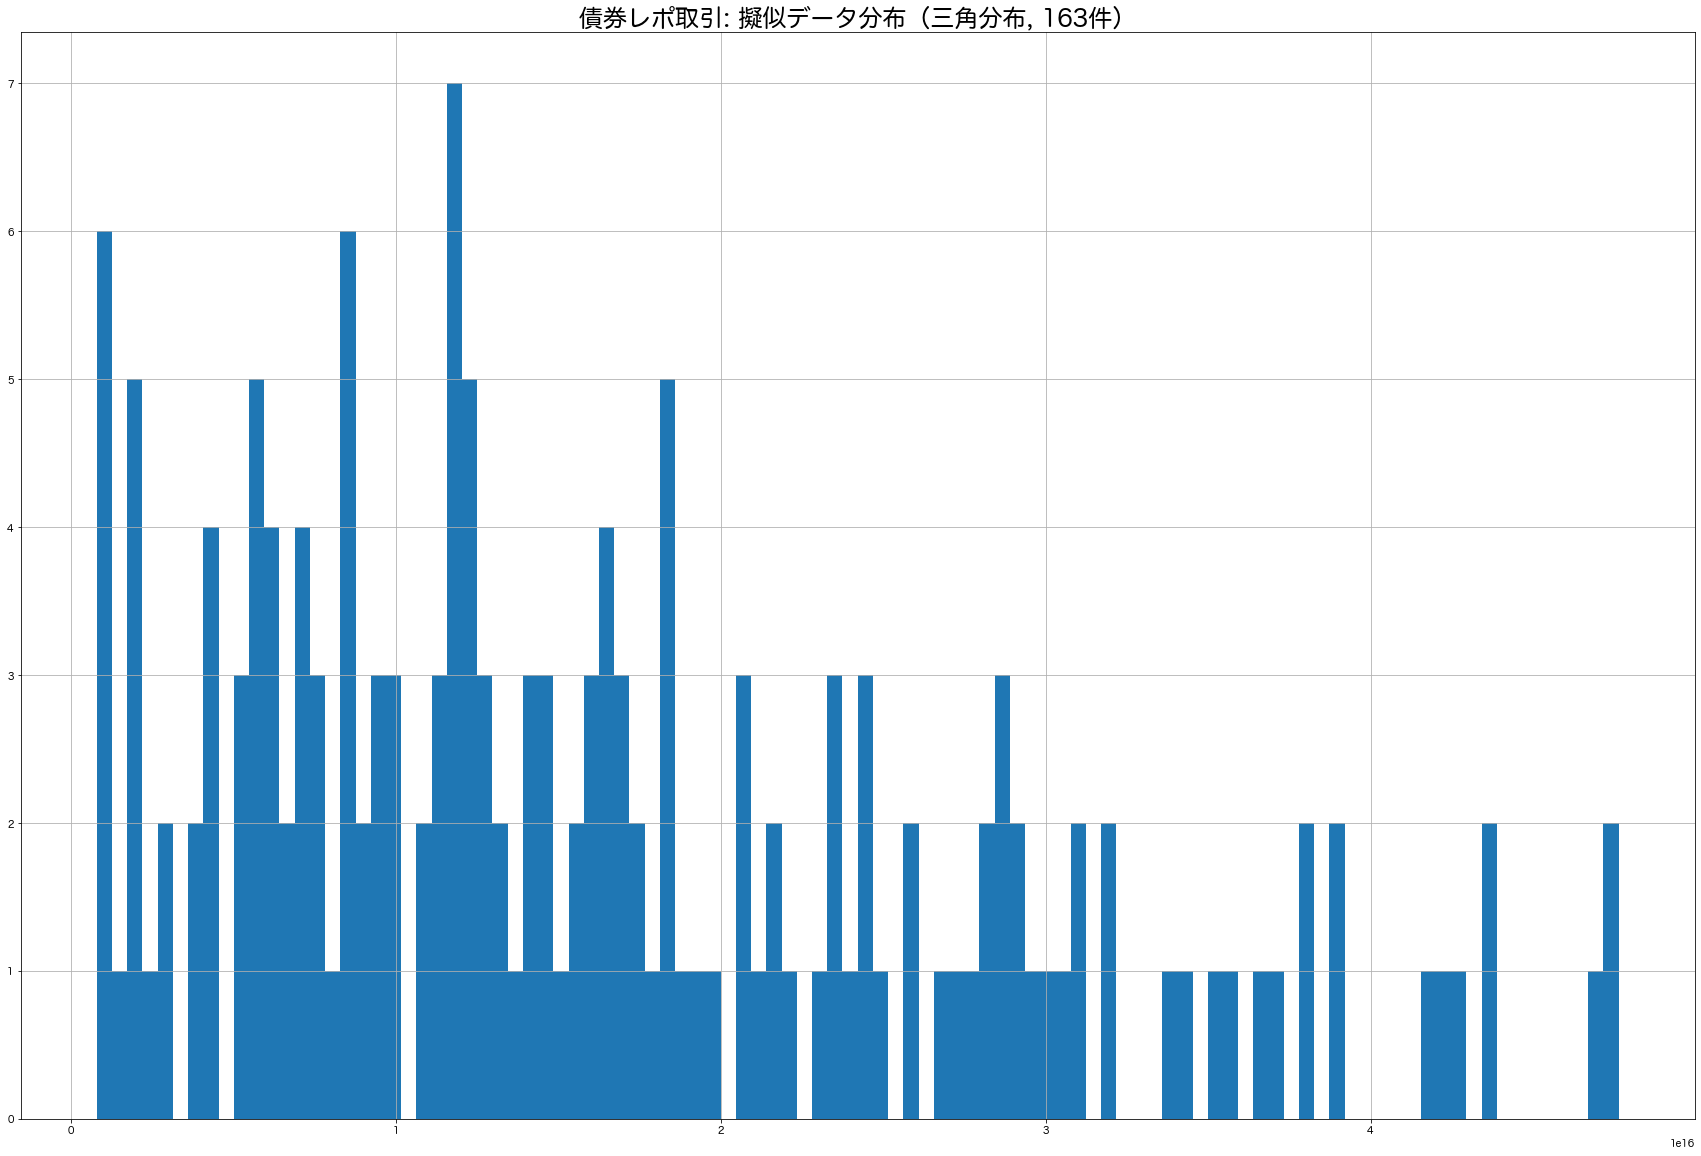

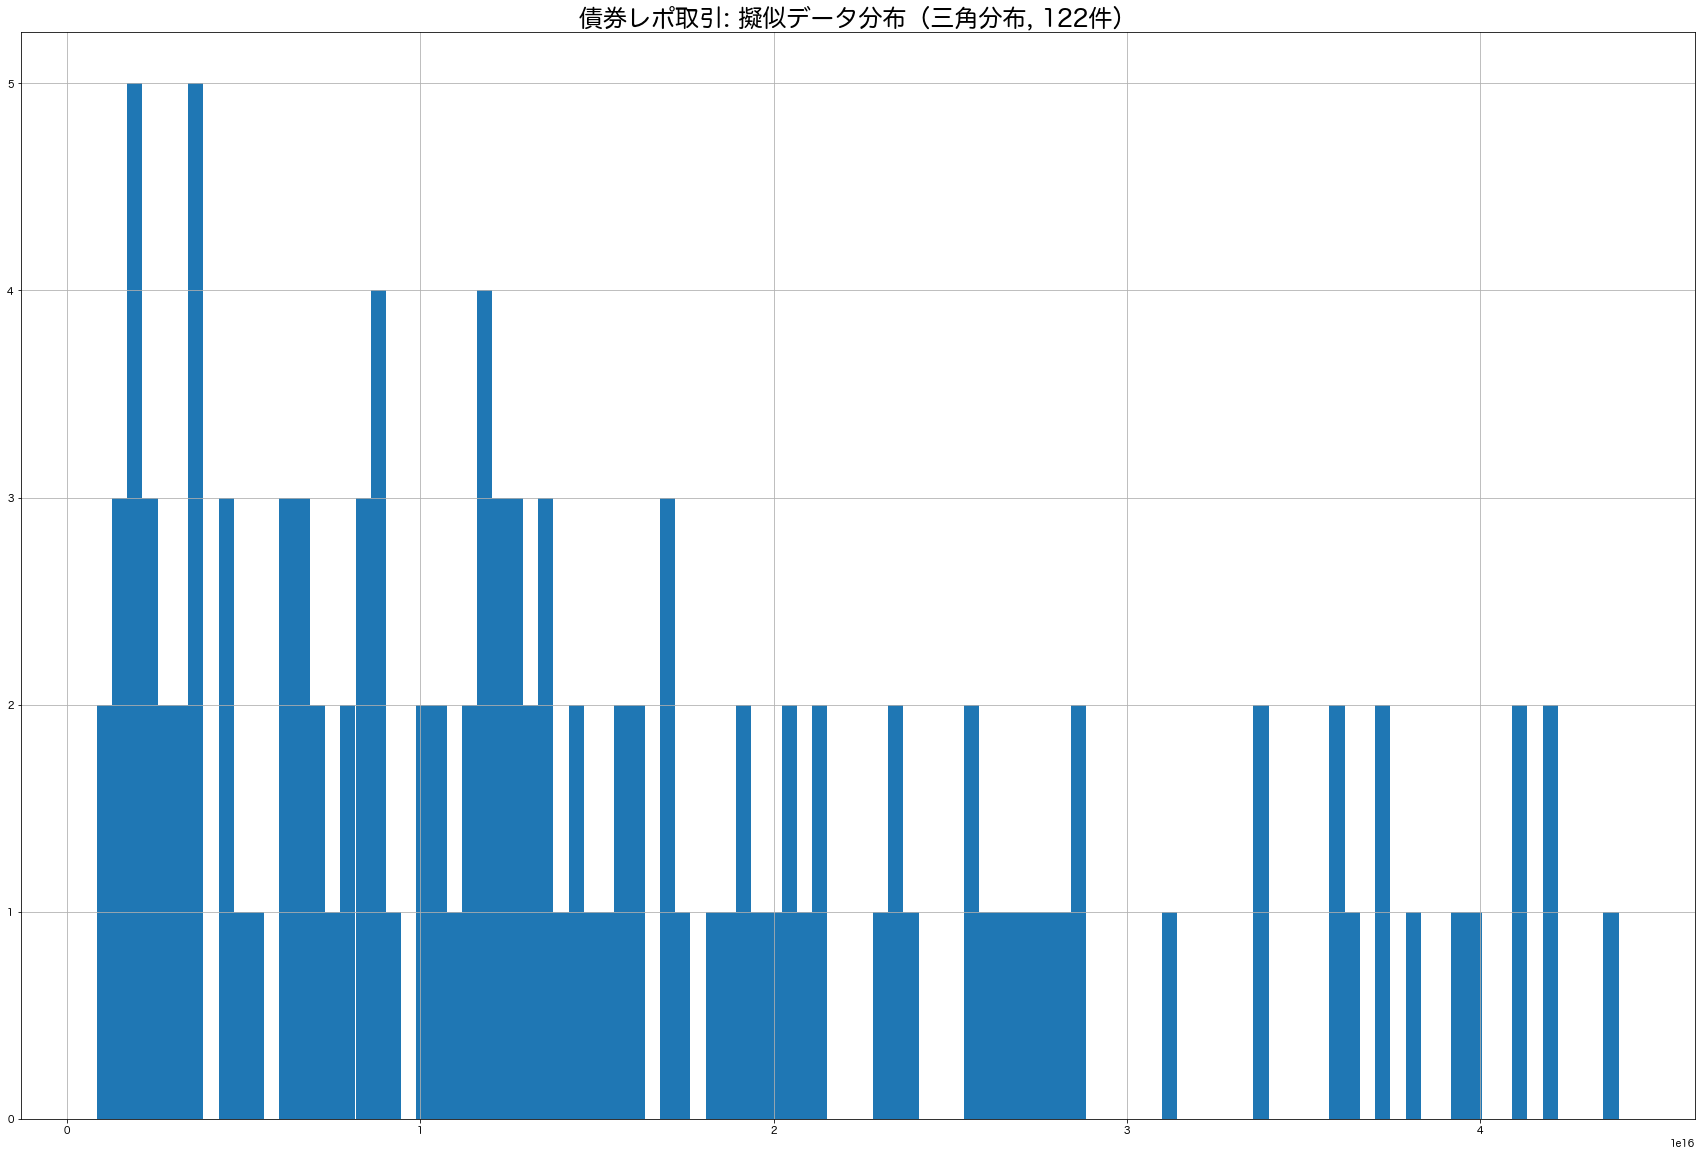

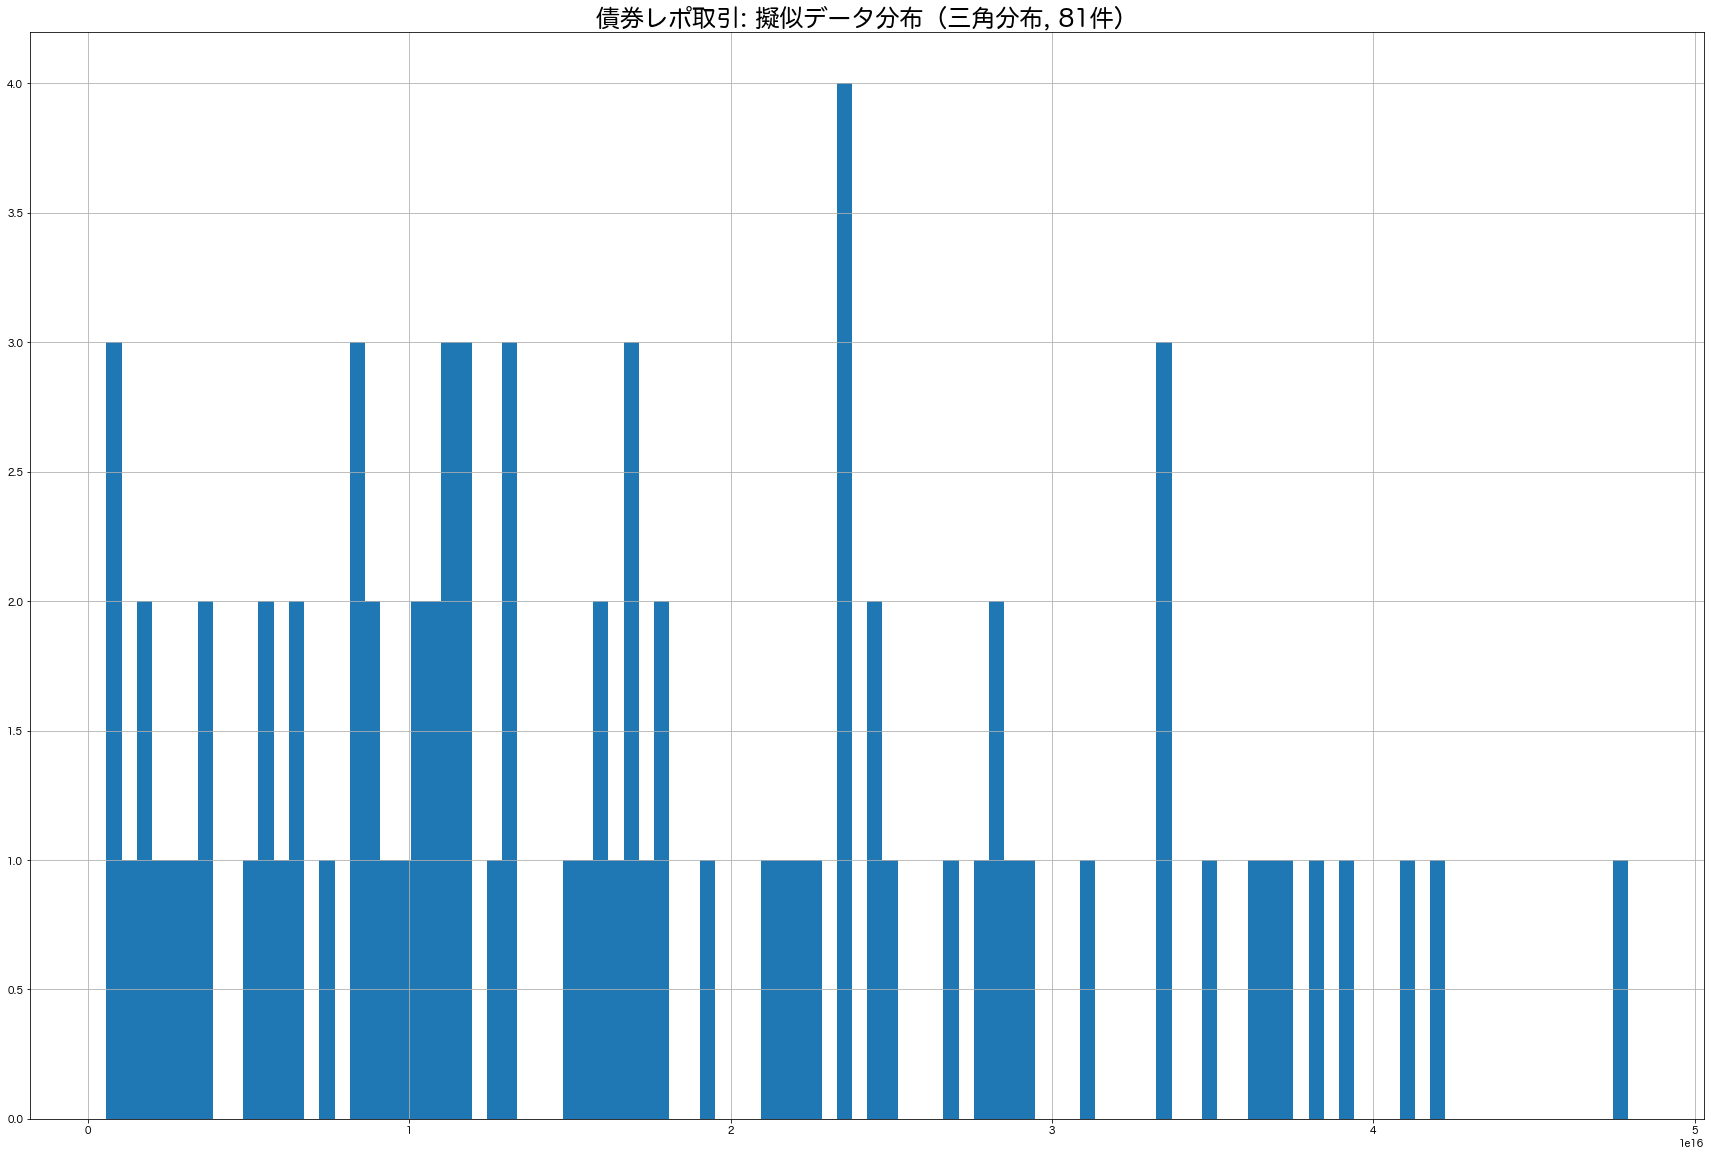

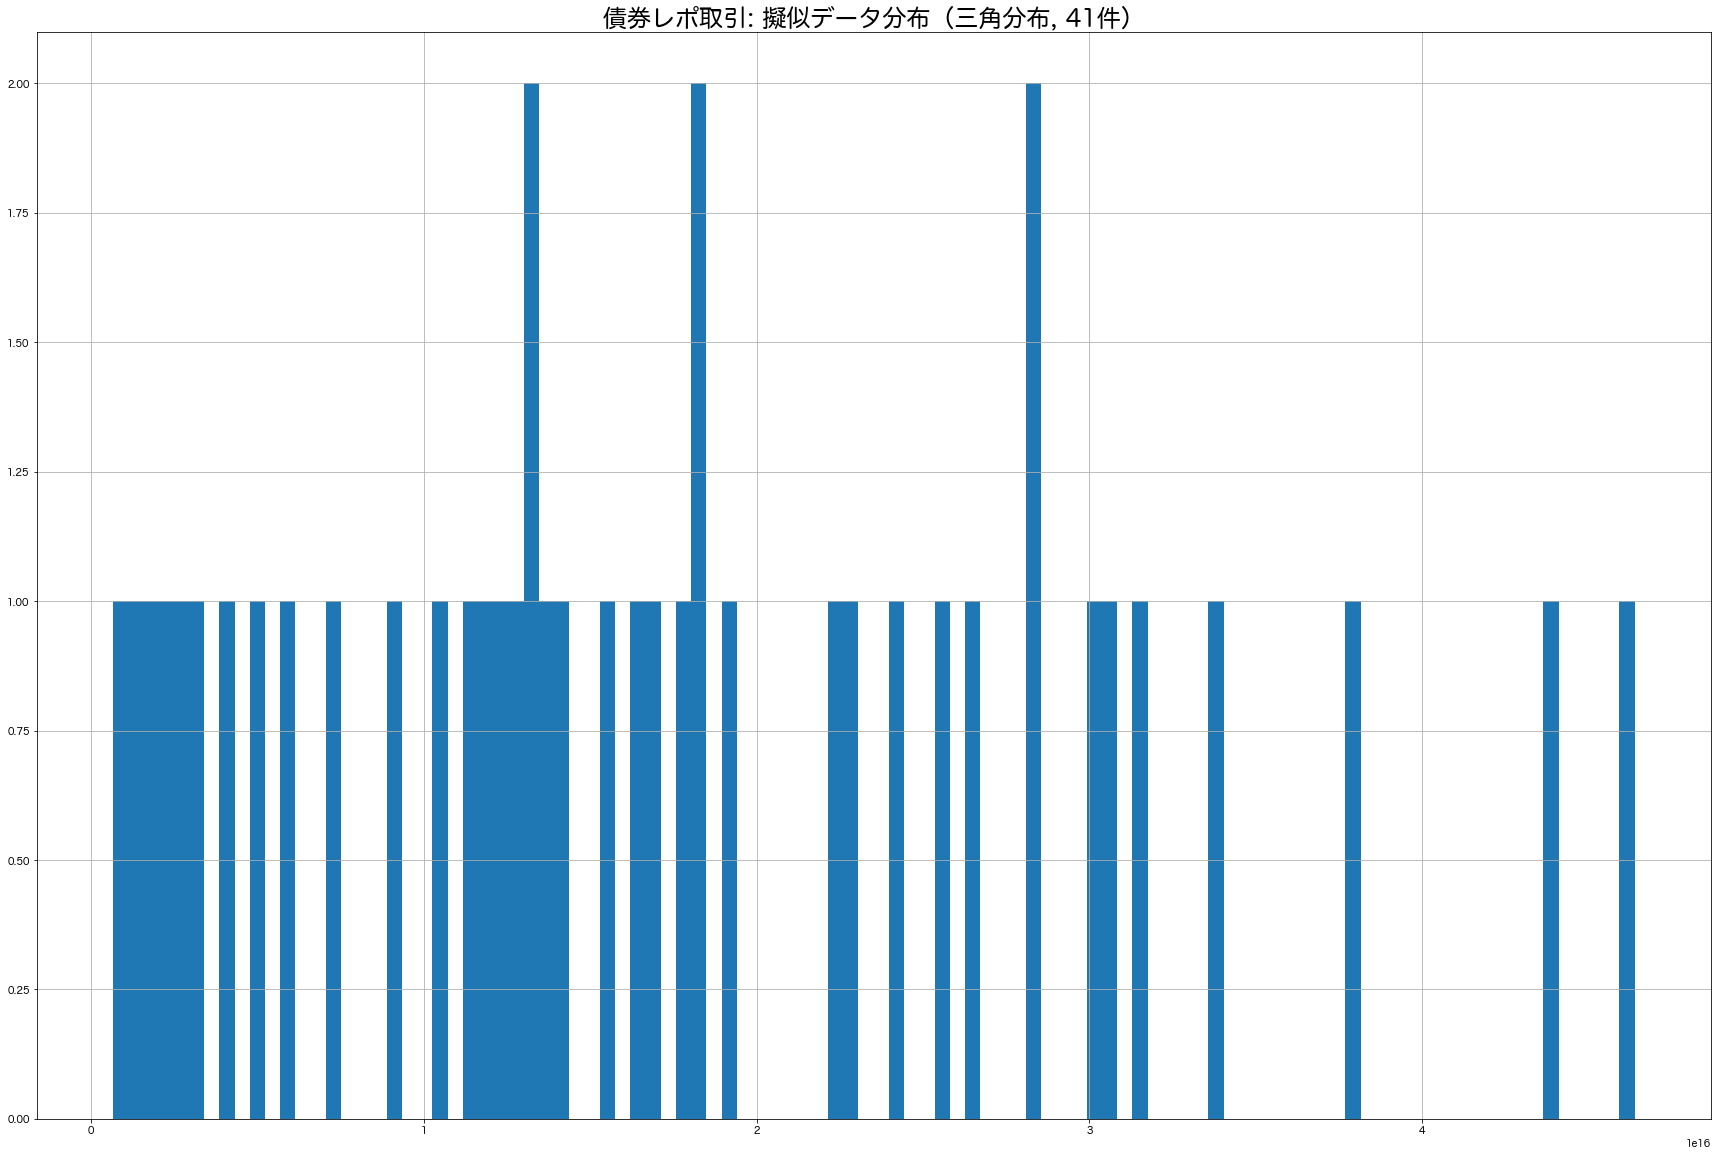

In [49]:
for _key, _value in additional_trade_nums.items():
    _num = _value['bond']
    all_price_dfs[_key]['bond'] = get_bond_price_df(_num)
all_price_dfs['200']

### Number of securities per trade

In [50]:
# security_num_df を格納するobjの初期化
all_security_num_dfs = {
    '460': {},
    '200': {},
    '150': {},
    '100': {},
    '50': {},
}

#### GC取引

株レポ: GC取引銘柄数
         1   2~10  11~50  51~100    101~
ratio  0.1   0.45    0.3     0.1    0.05
min    1.0   2.00   11.0    51.0  101.00
max    1.0  10.00   50.0   100.0  200.00


Text(0.5, 1.0, '株レポGC取引: 銘柄数')

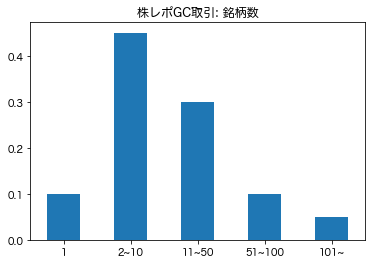

In [51]:
security_num_column_labels = ['1', '2~10', '11~50', '51~100', '101~']
gc_security_num_dist = pd.DataFrame([[0.1, 0.45, 0.3, 0.1, 0.05], [1, 2, 11, 51, 101], [1, 10, 50, 100, 200]],
                             columns=security_num_column_labels,
                             index=['ratio', 'min', 'max'])
gc_security_num_ave = 24.55
print('株レポ: GC取引銘柄数')
pprint(gc_security_num_dist)
print('='*50)

gc_security_num_dist.T['ratio'].plot(kind='bar', rot=0)
plt.title('株レポGC取引: 銘柄数')

Text(0.5, 1.0, '株レポGC取引: ヒストグラム')

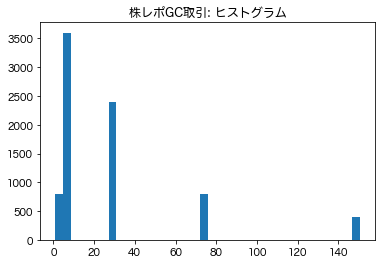

In [52]:
gc_trade_num = 8000
gc_ave_security_num_list = (gc_security_num_dist.T['min'] + gc_security_num_dist.T['max']) / 2
gc_security_num_sample = [[ave]*int(gc_security_num_dist.T['ratio'][index] * gc_trade_num)  for (index, ave) in enumerate(gc_ave_security_num_list)]

plt.hist(list(itertools.chain.from_iterable(gc_security_num_sample)), bins=40)
plt.title('株レポGC取引: ヒストグラム')

In [53]:
def get_gc_num_df(trade_num):
    gc_security_num_max = gc_security_num_dist['101~']['max']
    gc_security_num_min = gc_security_num_dist['1']['min'] - 1
    mock_gc_security_num_df = pd.DataFrame(np.ceil(np.random.triangular(gc_security_num_min, gc_security_num_ave, gc_security_num_max, trade_num)), dtype=int)
    mock_gc_security_num_df.hist(bins=100, figsize=(30, 20), xlabelsize=20, ylabelsize=20)
    plt.title('株レポGC取引: 擬似データ分布（三角分布）')
    return mock_gc_security_num_df

,0
0,38
1,164
2,133
3,76
4,53
...,...
1753,34
1754,69
1755,122
1756,60


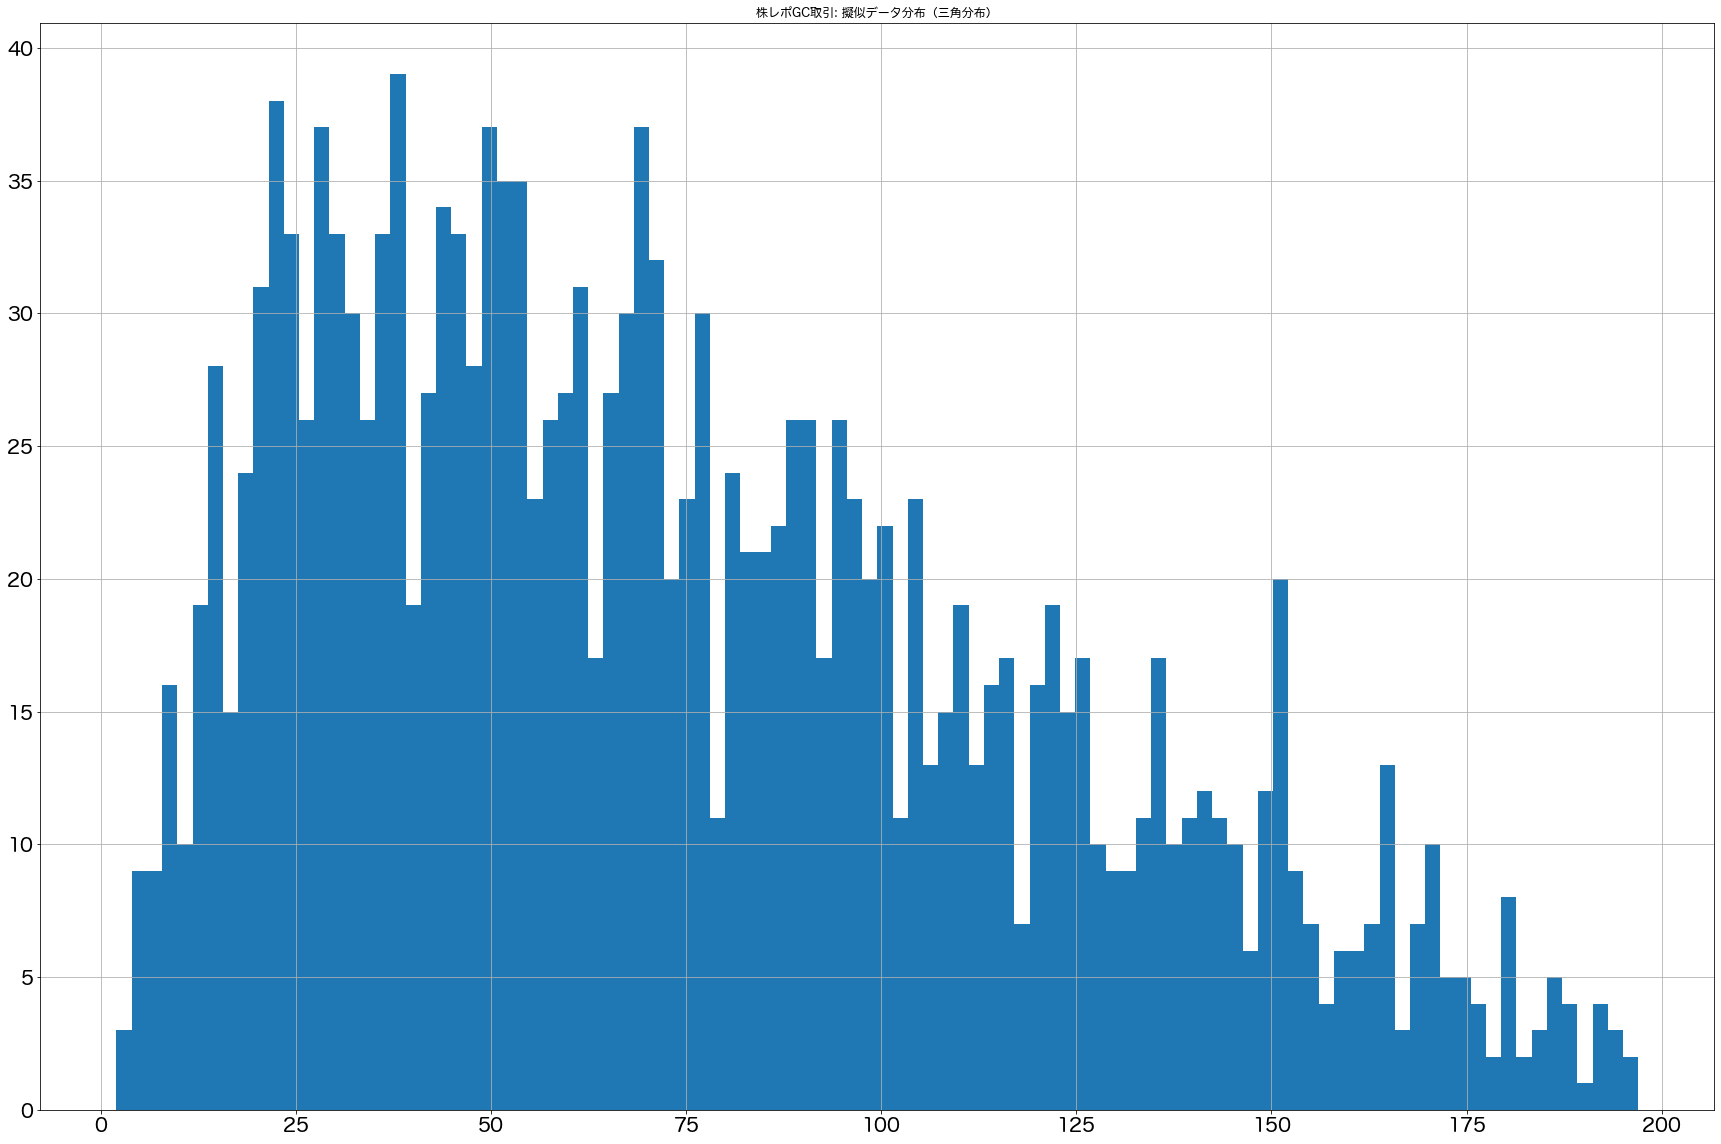

In [54]:
# 三角分布で類似分布を作成
get_gc_num_df(b_security_nums['100%']['stock'])

{'460': {'gc':       0
  0    38
  1    36
  2    43
  3    67
  4    15
  5    73
  6   166
  7    29
  8   113
  9    91
  10   39},
 '200': {'gc':      0
  0   11
  1  118
  2   37
  3   48
  4   63},
 '150': {'gc':      0
  0  137
  1  173
  2   98
  3  148},
 '100': {'gc':      0
  0  192
  1   75
  2   68},
 '50': {'gc':     0
  0  25}}

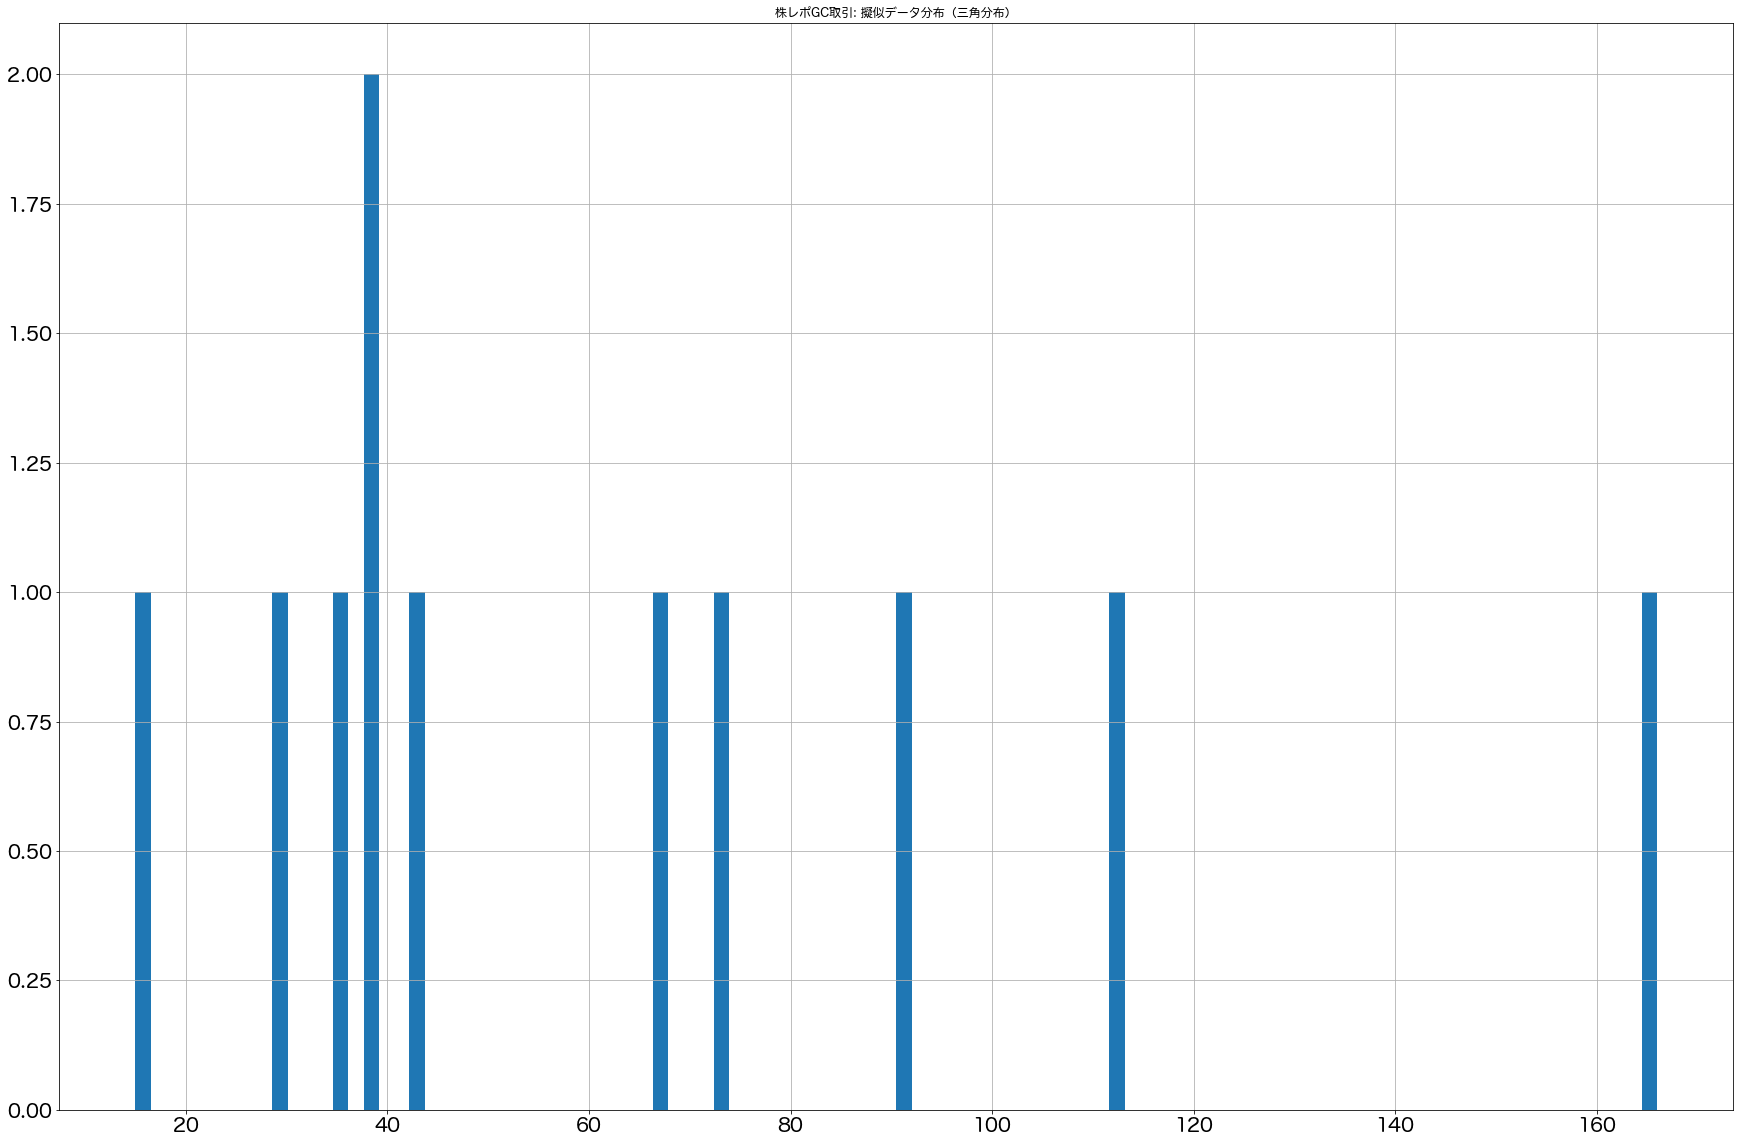

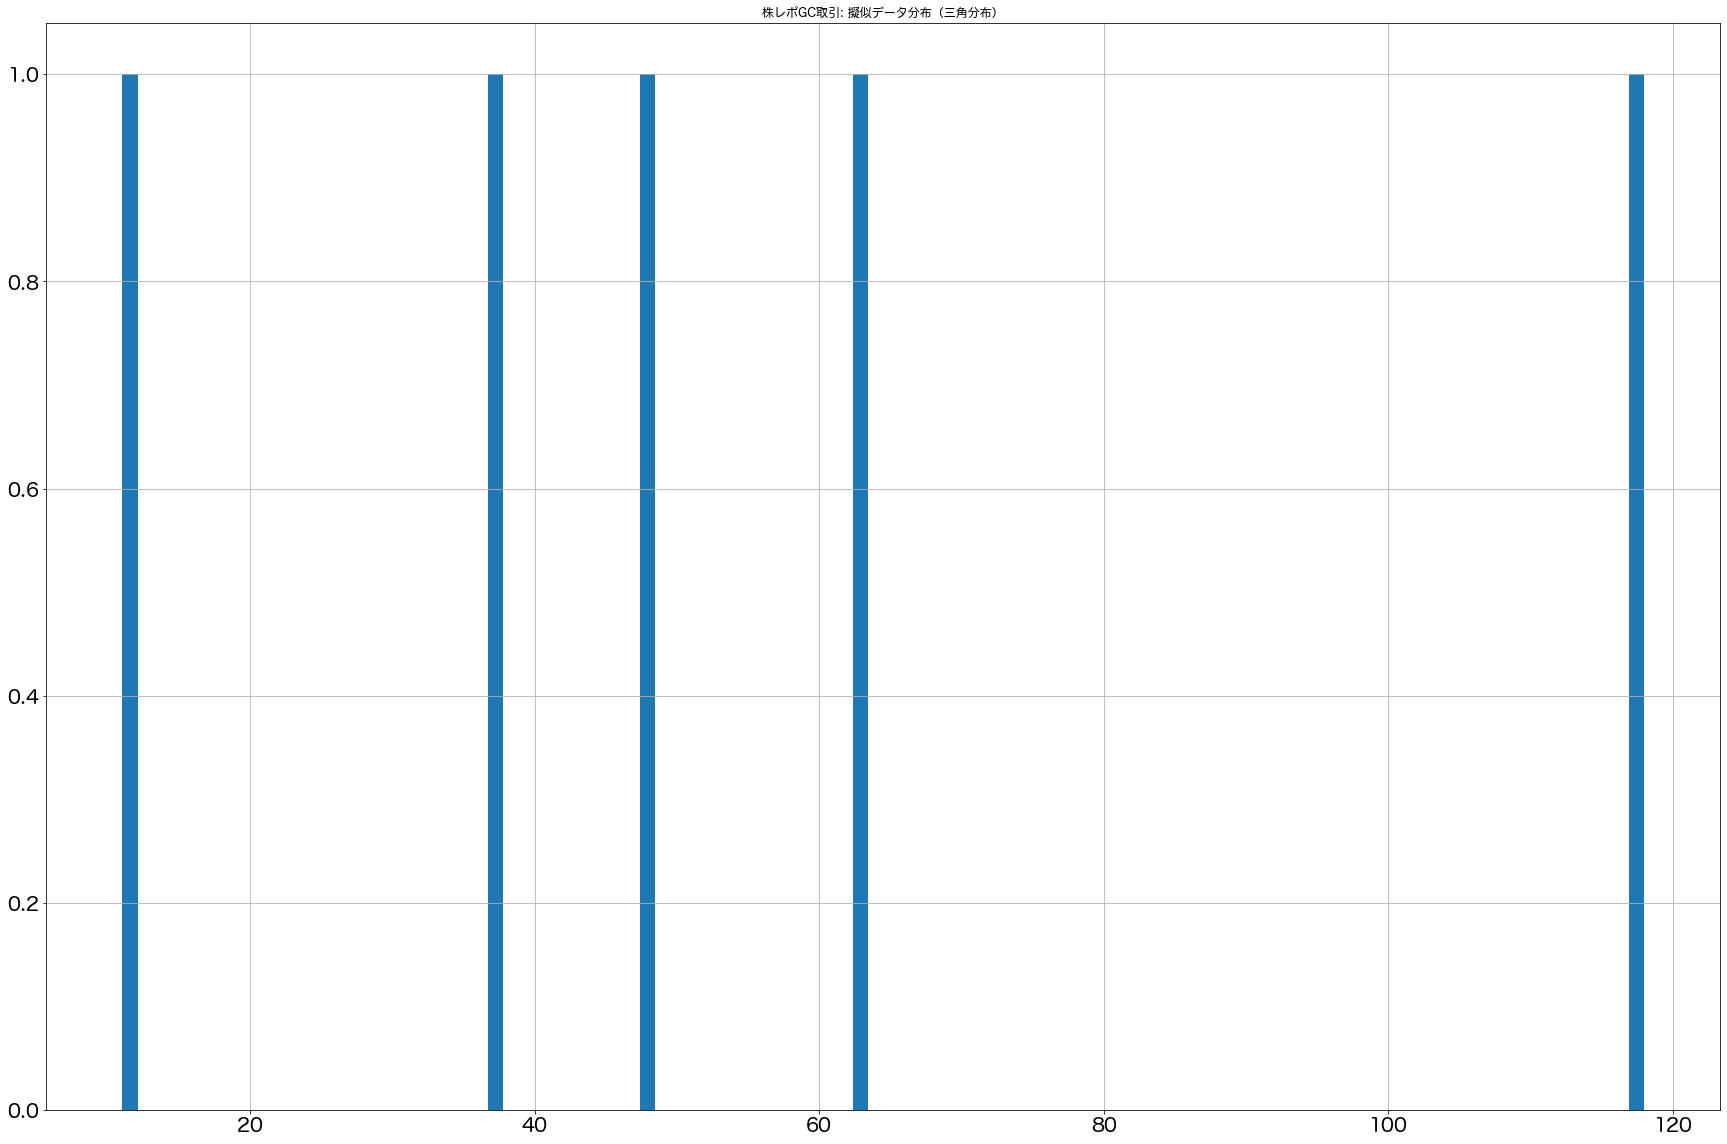

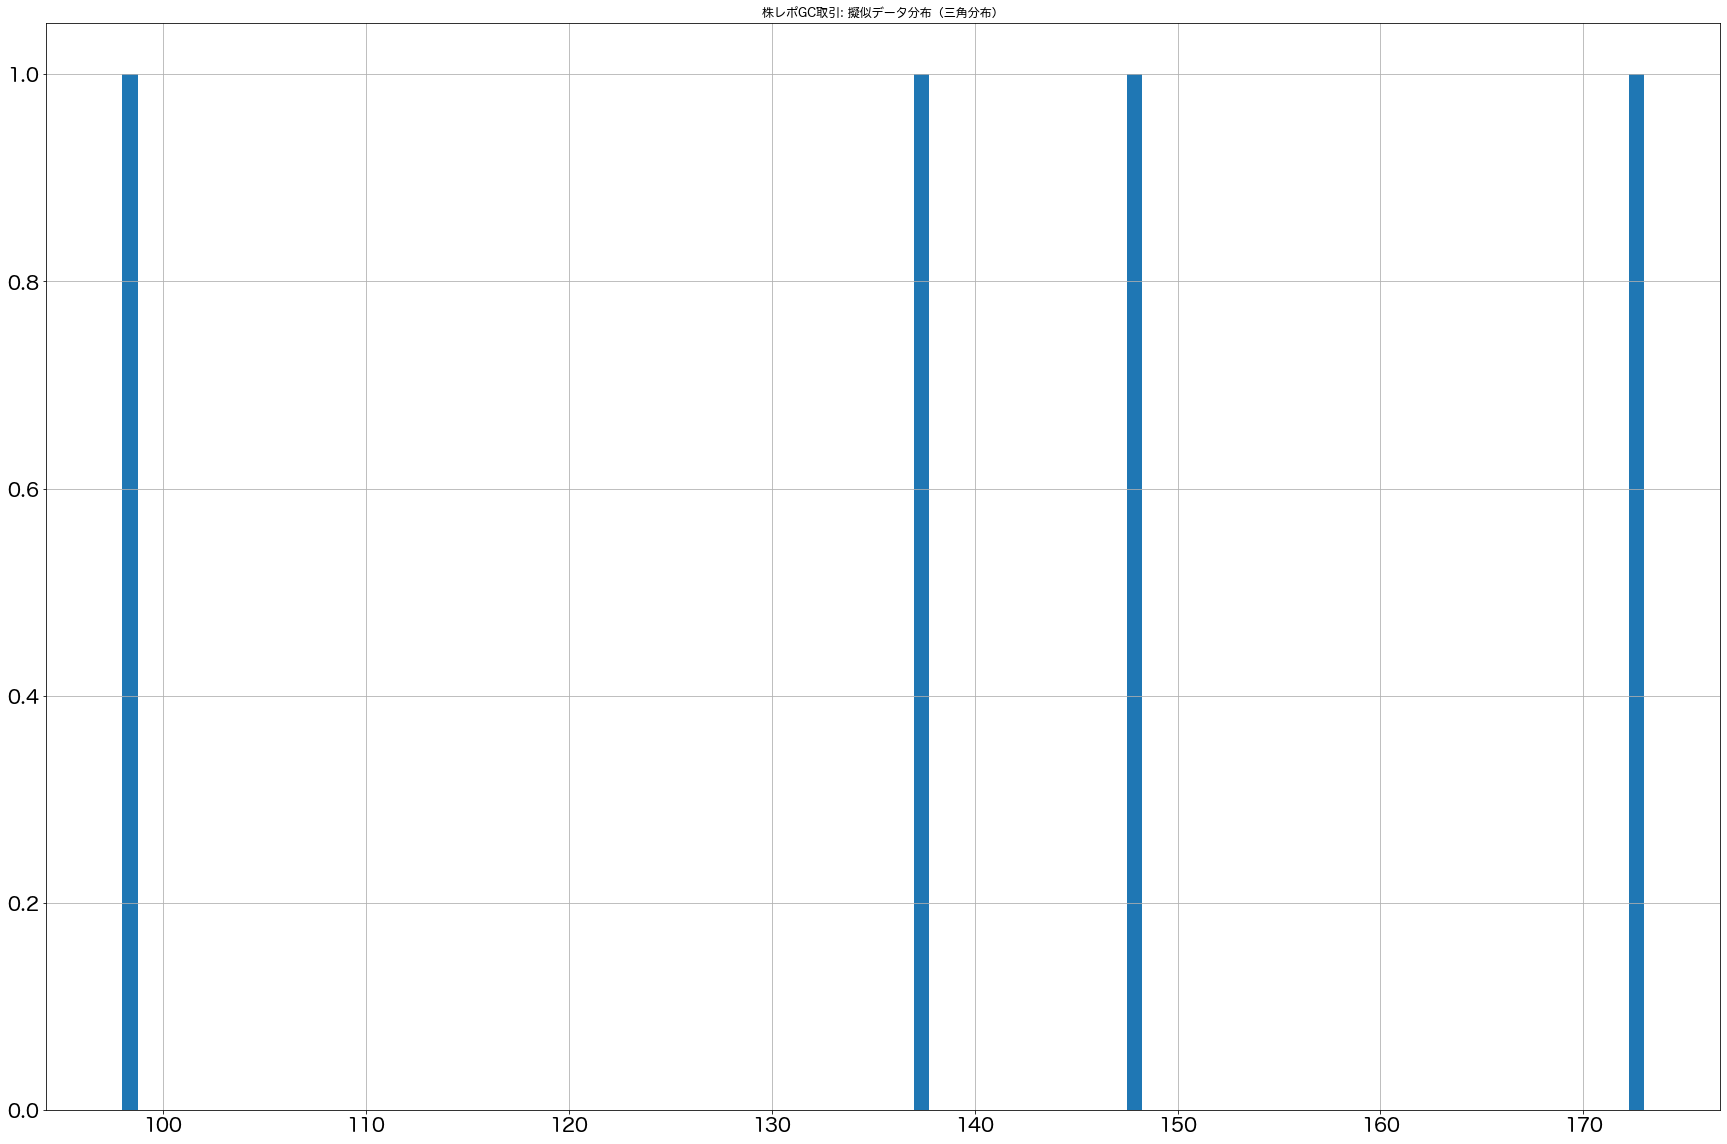

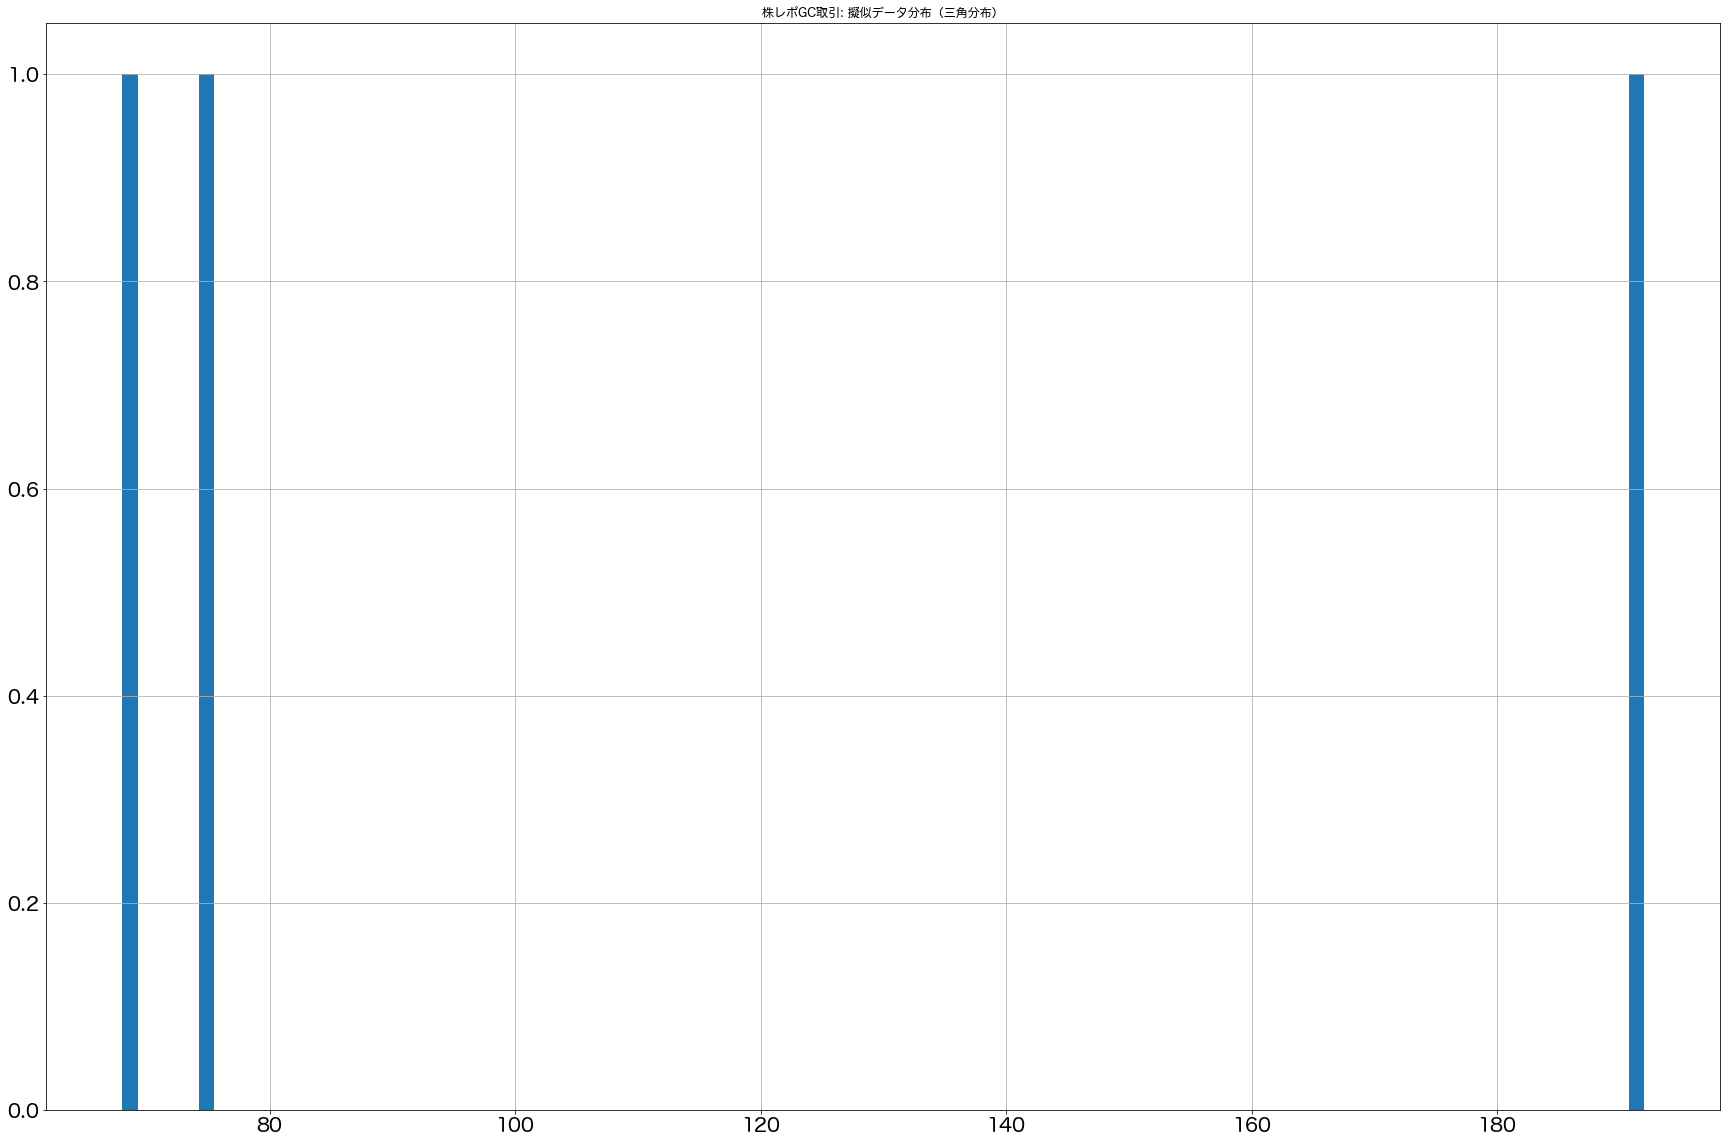

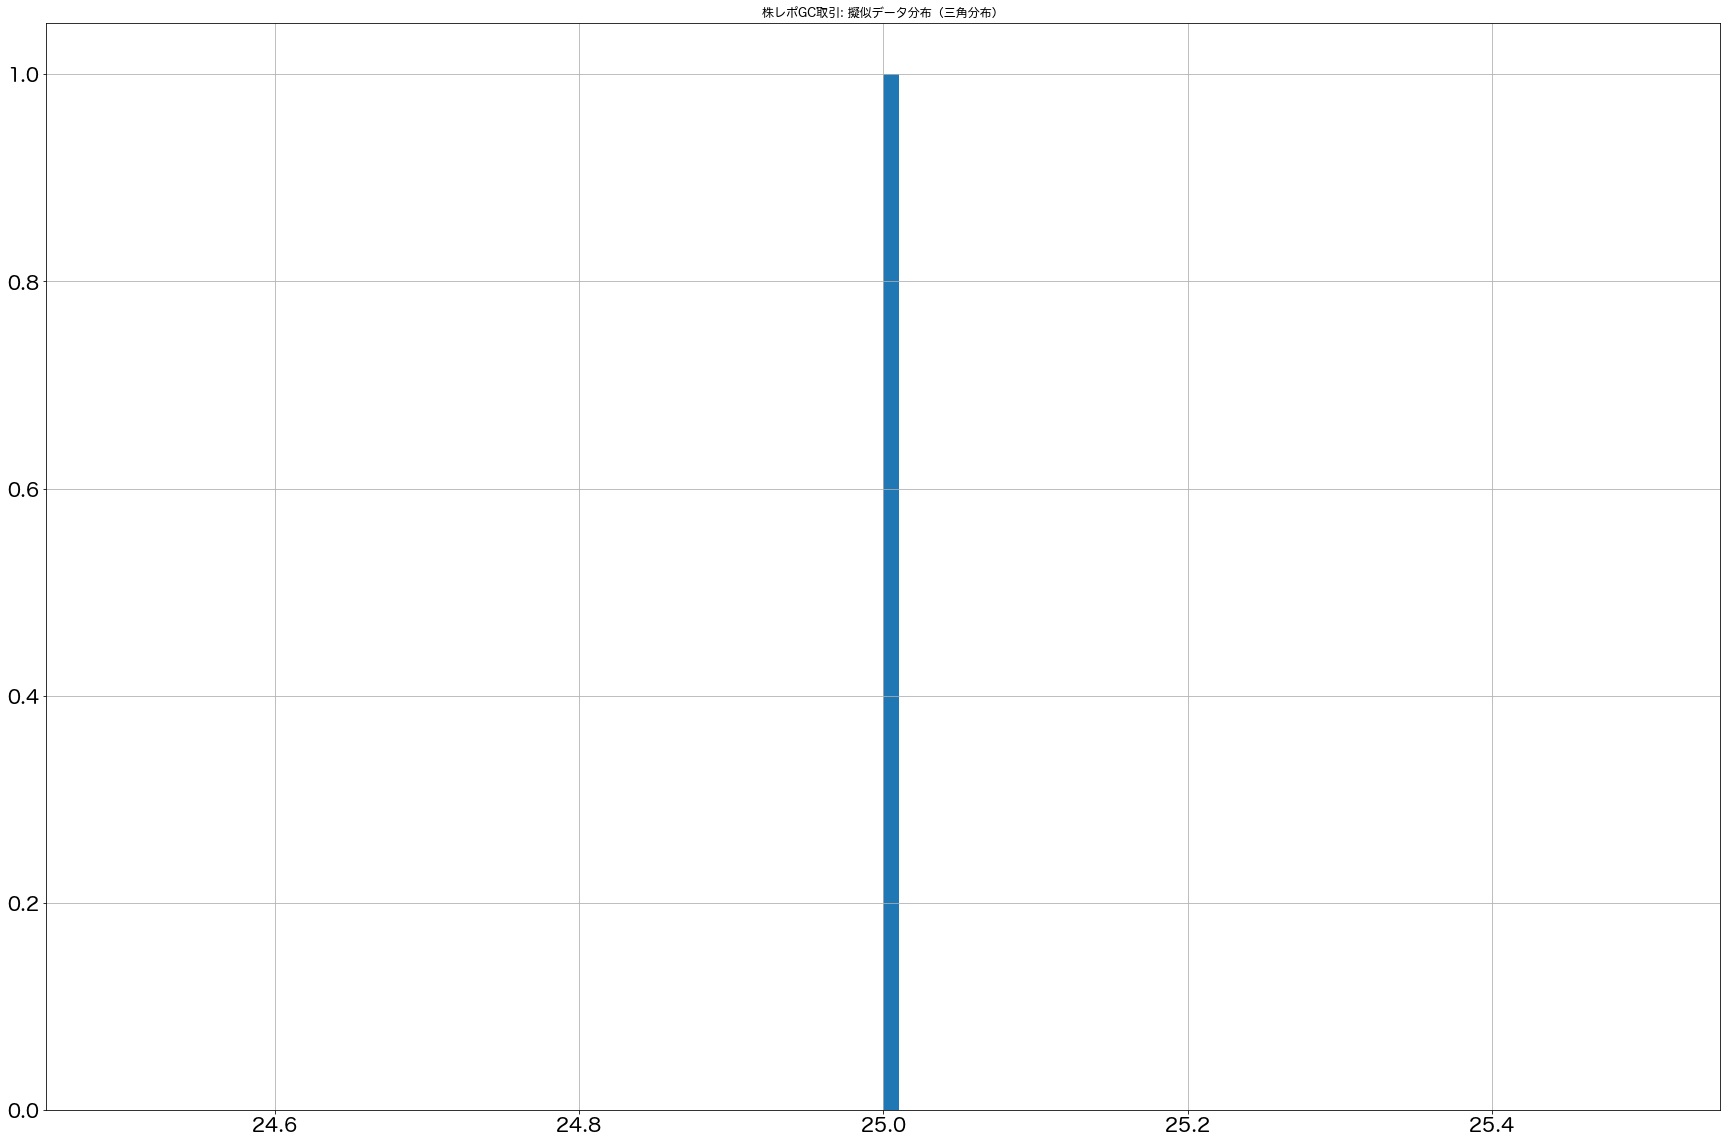

In [55]:
for _key, _value in additional_trade_nums.items():
    _num = _value['gc']
    all_security_num_dfs[_key]['gc'] = get_gc_num_df(_num)
all_security_num_dfs

#### SC取引

株レポ: SC取引銘柄数
          1   2~10  11~50  51~100   101~
ratio  0.54   0.36    0.1       0    0.0
min    1.00   2.00   11.0      51  101.0
max    1.00  10.00   50.0     100  200.0
'=================================================='


Text(0.5, 1.0, '株レポSC取引: 銘柄数')

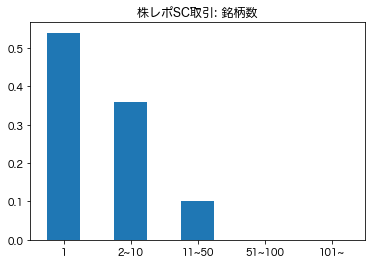

In [56]:
sc_security_num_dist = pd.DataFrame([[0.54, 0.36, 0.1, 0, 0.], [1, 2, 11, 51, 101], [1, 10, 50, 100, 200]],
                             columns=security_num_column_labels,
                             index=['ratio', 'min', 'max'])
sc_security_num_ave = 4.05
print('株レポ: SC取引銘柄数')
pprint(sc_security_num_dist)
pprint('='*50)

sc_security_num_dist.T['ratio'].plot(kind='bar', rot=0)
plt.title('株レポSC取引: 銘柄数')

Text(0.5, 1.0, '株レポSC取引: ヒストグラム')

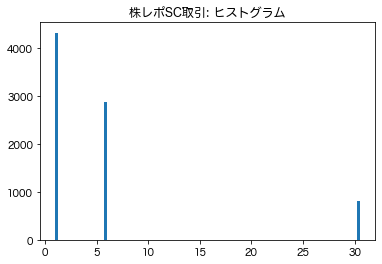

In [57]:
sc_trade_num = 8000
sc_ave_security_num_list = (sc_security_num_dist.T['min'] + sc_security_num_dist.T['max']) / 2
sc_security_num_sample = [[ave]*int(sc_security_num_dist.T['ratio'][index] * sc_trade_num)  for (index, ave) in enumerate(sc_ave_security_num_list)]

plt.hist(list(itertools.chain.from_iterable(sc_security_num_sample)), bins=100)
plt.title('株レポSC取引: ヒストグラム')

In [58]:
def get_sc_num_df(trade_num):
    sc_security_num_max = sc_security_num_dist['101~']['max']
    sc_security_num_min = sc_security_num_dist['1']['min'] - 1
    _nums = []
    for i in range(trade_num):
        _nums.append(np.random.choice(a=[1, np.random.randint(2, 11), np.random.randint(11, 51)],  p=[0.54, 0.36, 0.1]))
       
    mock_sc_security_num_df = pd.DataFrame(_nums, dtype=int)
    mock_sc_security_num_df.hist(bins=100, figsize=(30, 20), xlabelsize=20, ylabelsize=20)
    plt.title('株レポSC取引: 擬似データ分布')
    return mock_sc_security_num_df

,0
0,1
1,26
2,29
3,1
4,6
...,...
1753,6
1754,1
1755,1
1756,1


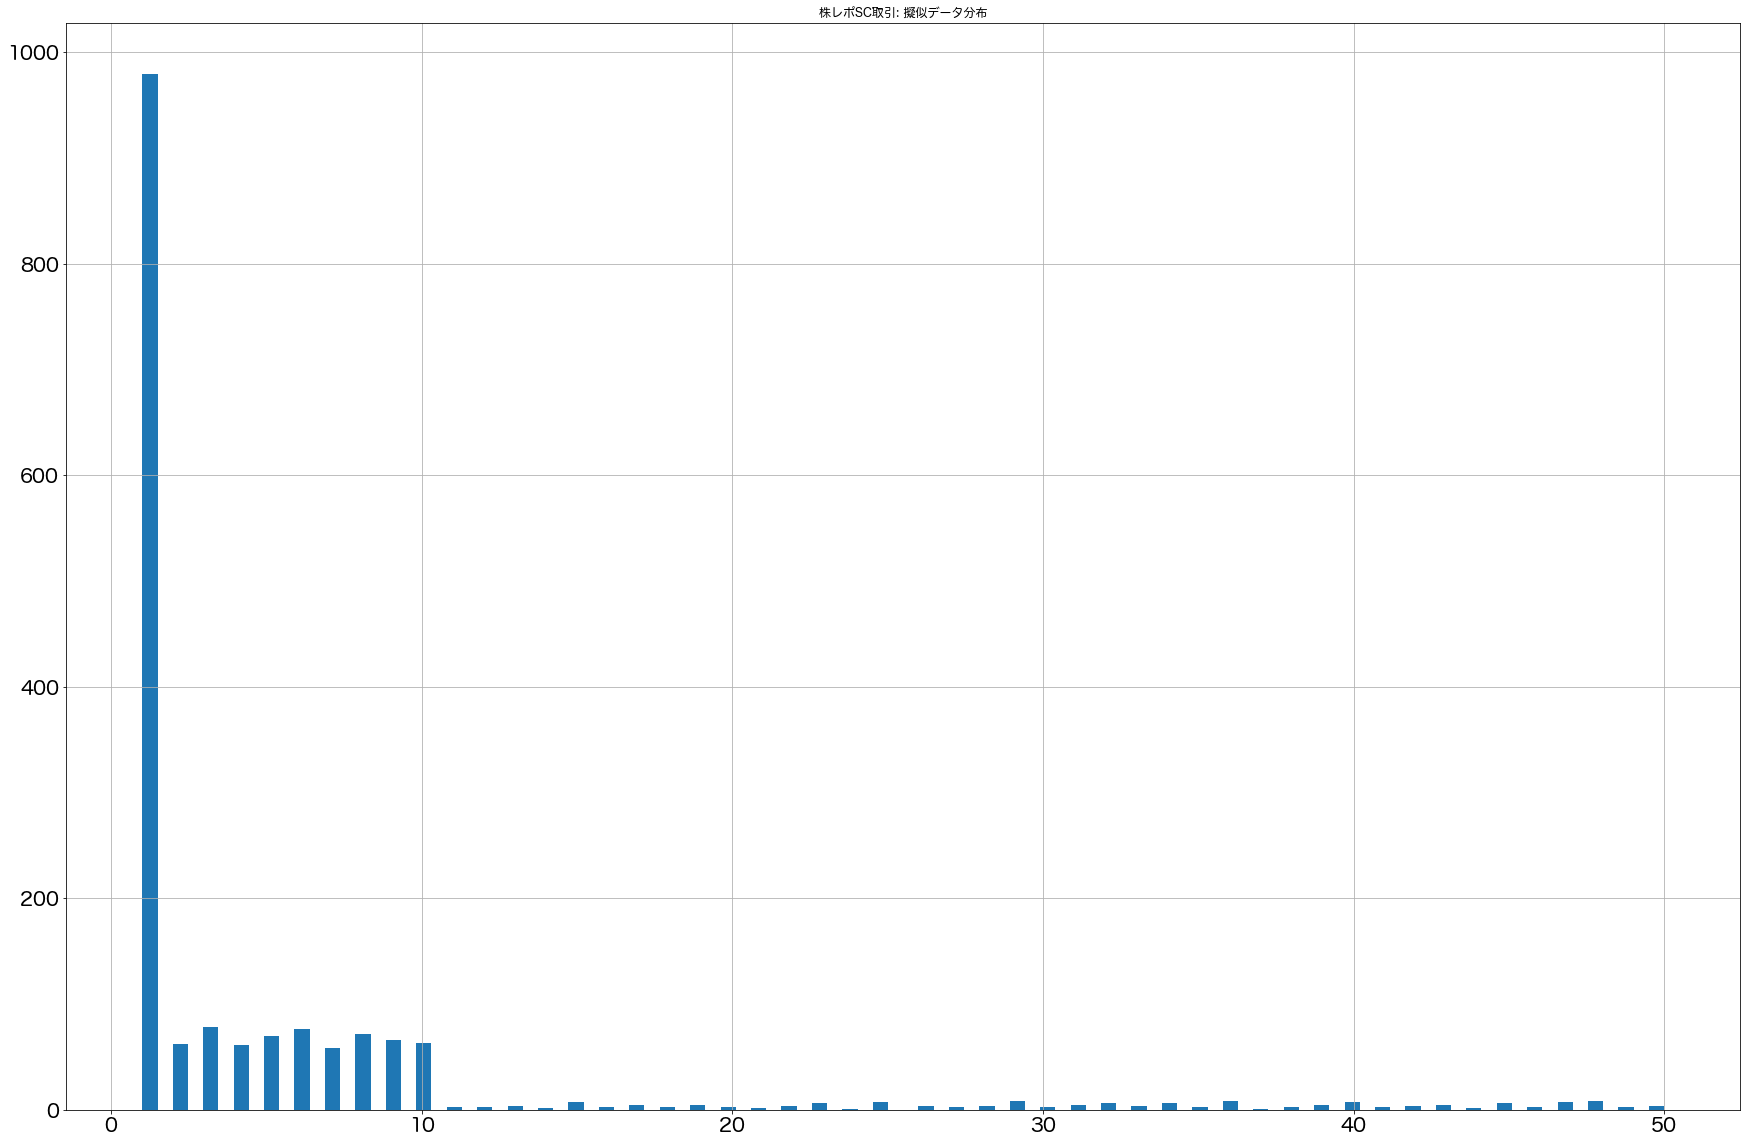

In [59]:
get_sc_num_df(b_security_nums['100%']['stock'])

{'460': {'gc':       0
  0    38
  1    36
  2    43
  3    67
  4    15
  5    73
  6   166
  7    29
  8   113
  9    91
  10   39,
  'sc':      0
  0    2
  1    1
  2    1
  3    1
  4    1
  ..  ..
  69   1
  70  37
  71   1
  72   3
  73   1
  
  [74 rows x 1 columns]},
 '200': {'gc':      0
  0   11
  1  118
  2   37
  3   48
  4   63,
  'sc':      0
  0    1
  1    1
  2    1
  3    4
  4    1
  5    1
  6   10
  7    9
  8    1
  9    1
  10  30
  11   1
  12   6
  13   1
  14  47
  15  10
  16   4
  17  40
  18   1
  19   5
  20   1
  21   2
  22  17
  23   1
  24   1
  25   1
  26   1
  27   1
  28   1
  29   1
  30   9
  31   7},
 '150': {'gc':      0
  0  137
  1  173
  2   98
  3  148,
  'sc':      0
  0   27
  1    9
  2   10
  3    3
  4    1
  5    1
  6    1
  7   22
  8    1
  9   34
  10   3
  11   1
  12   1
  13   1
  14   1
  15  11
  16   8
  17   1
  18   3
  19   1
  20   1
  21   1
  22  10
  23   1},
 '100': {'gc':      0
  0  192
  1   75
  2   68,
  'sc': 

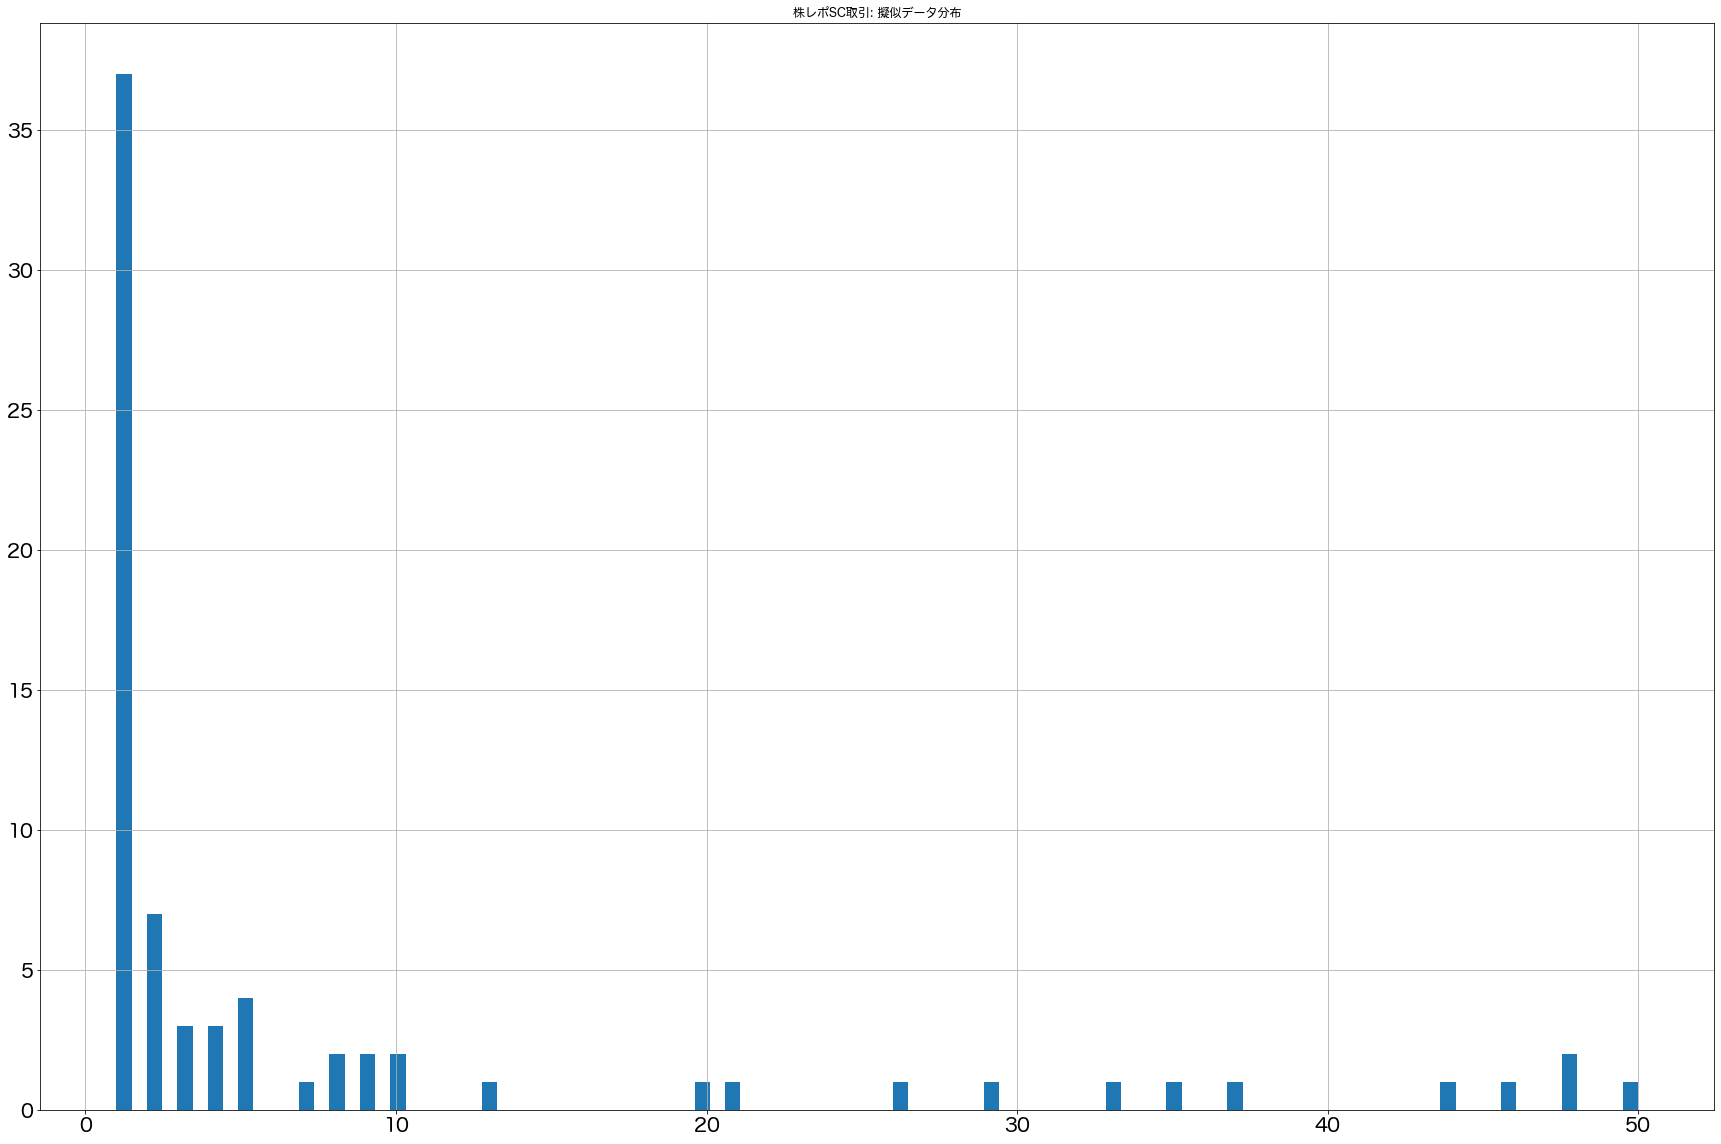

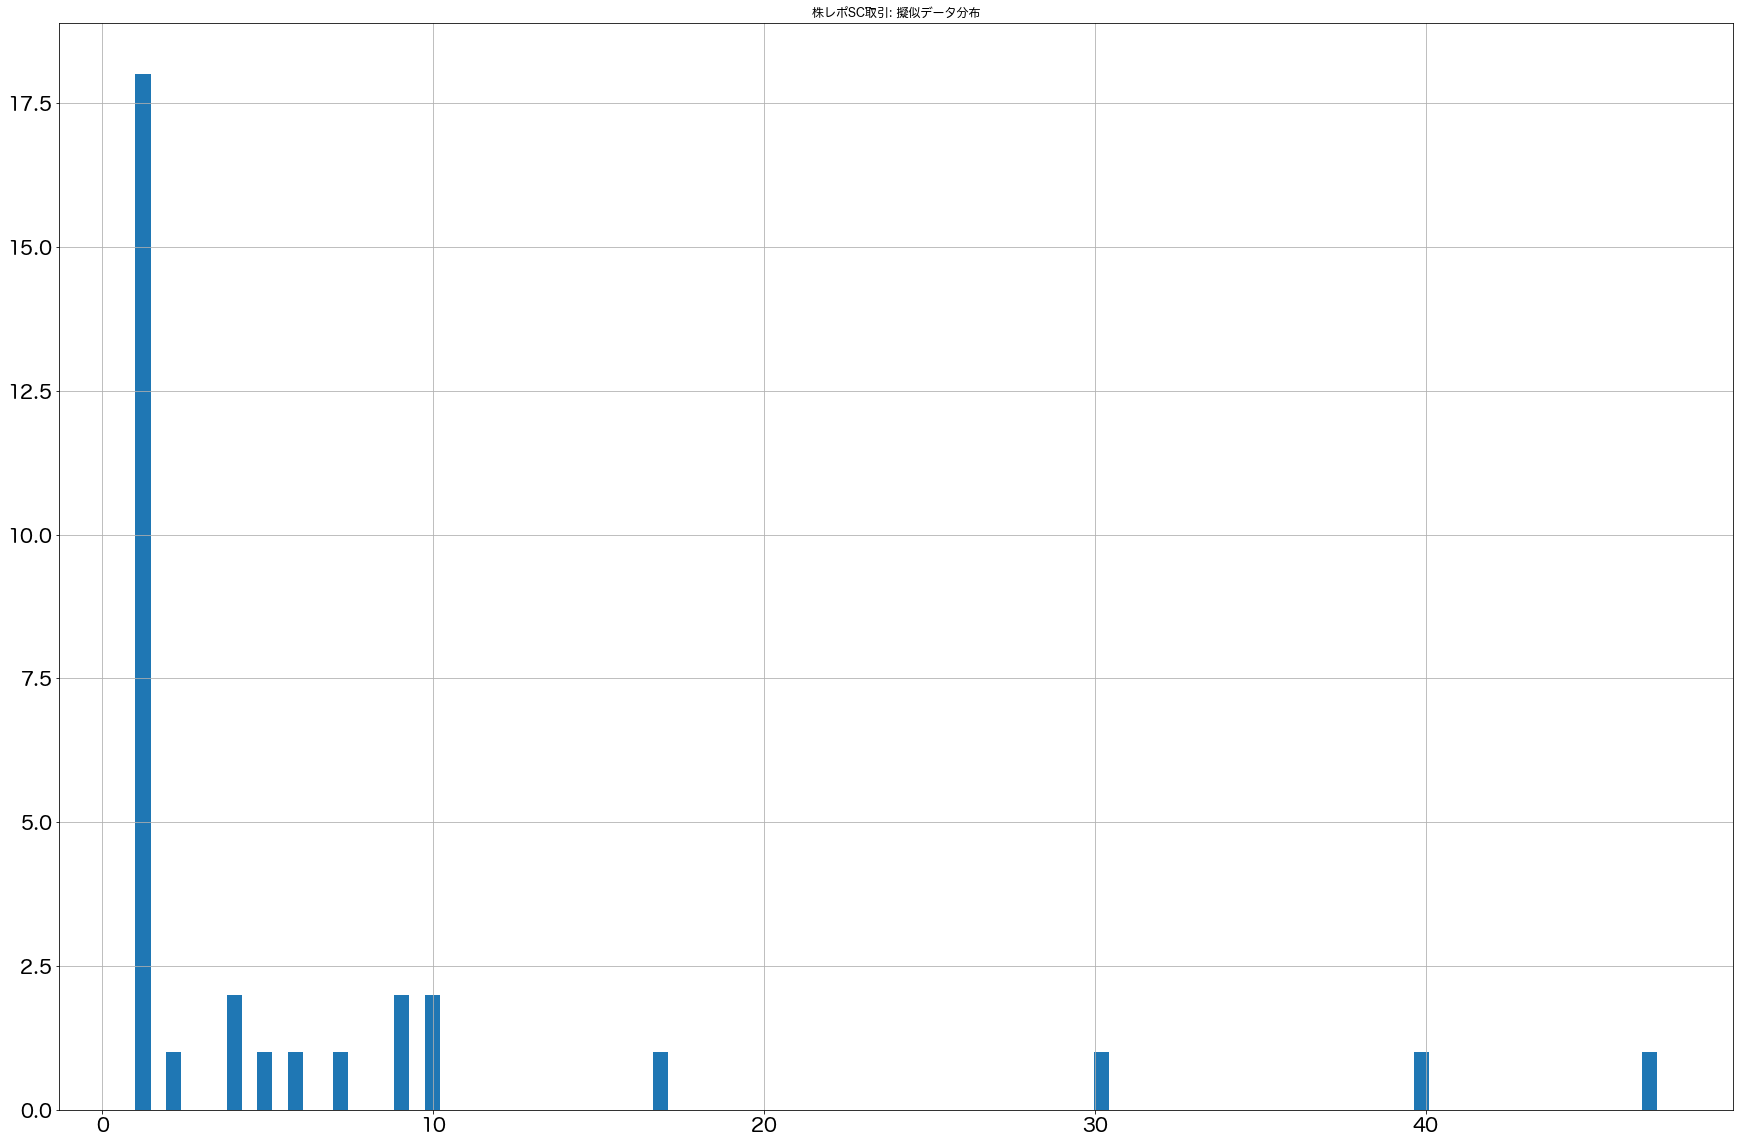

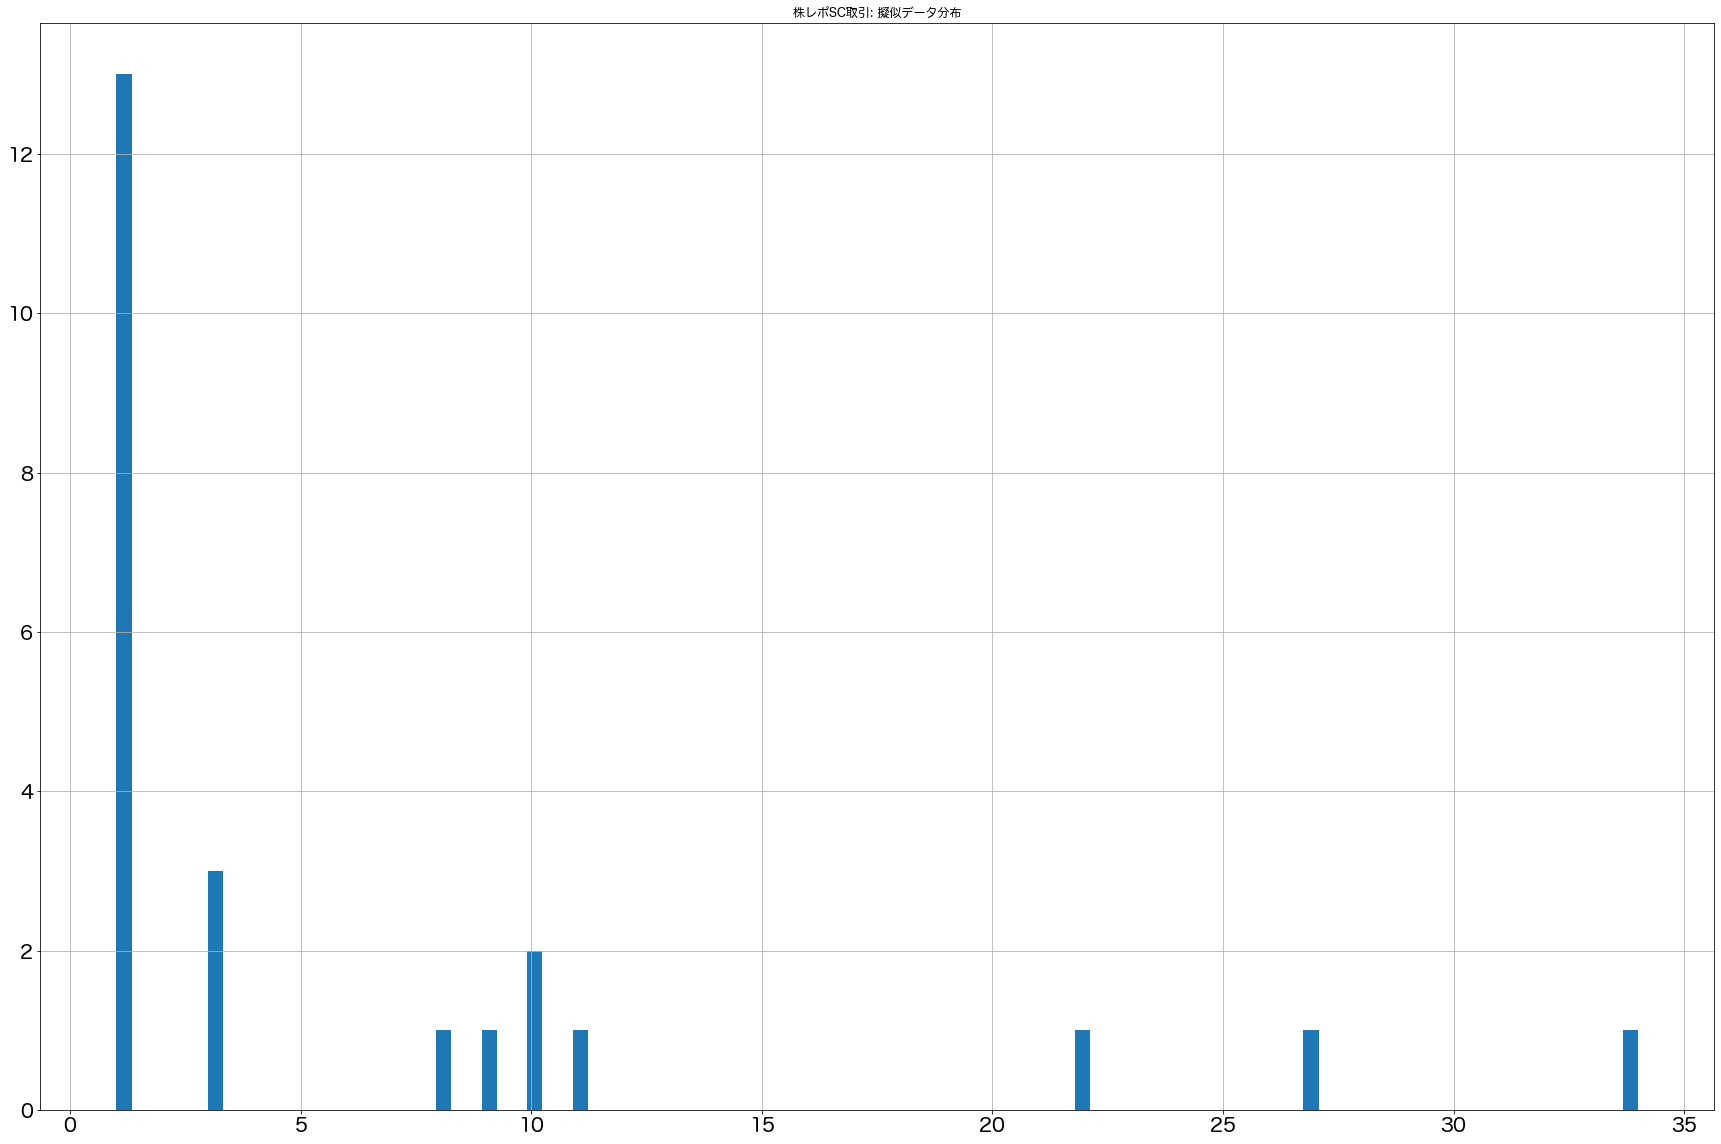

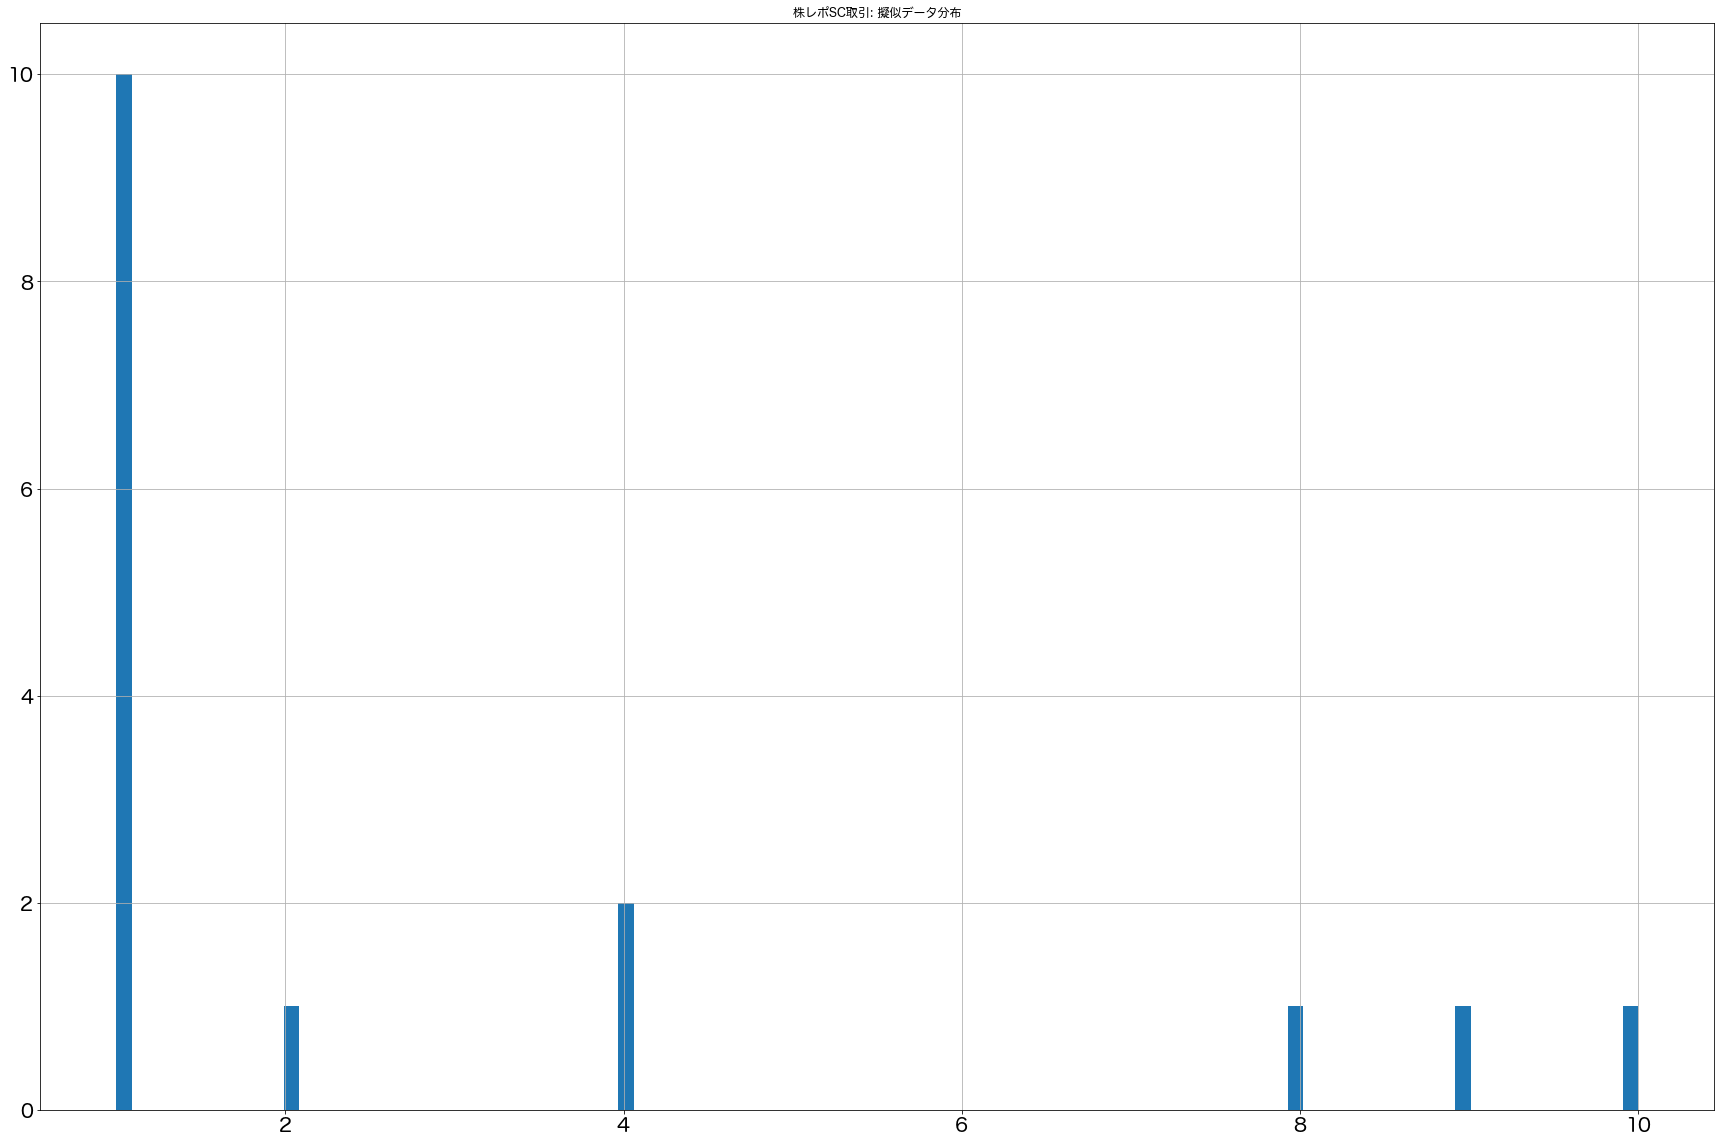

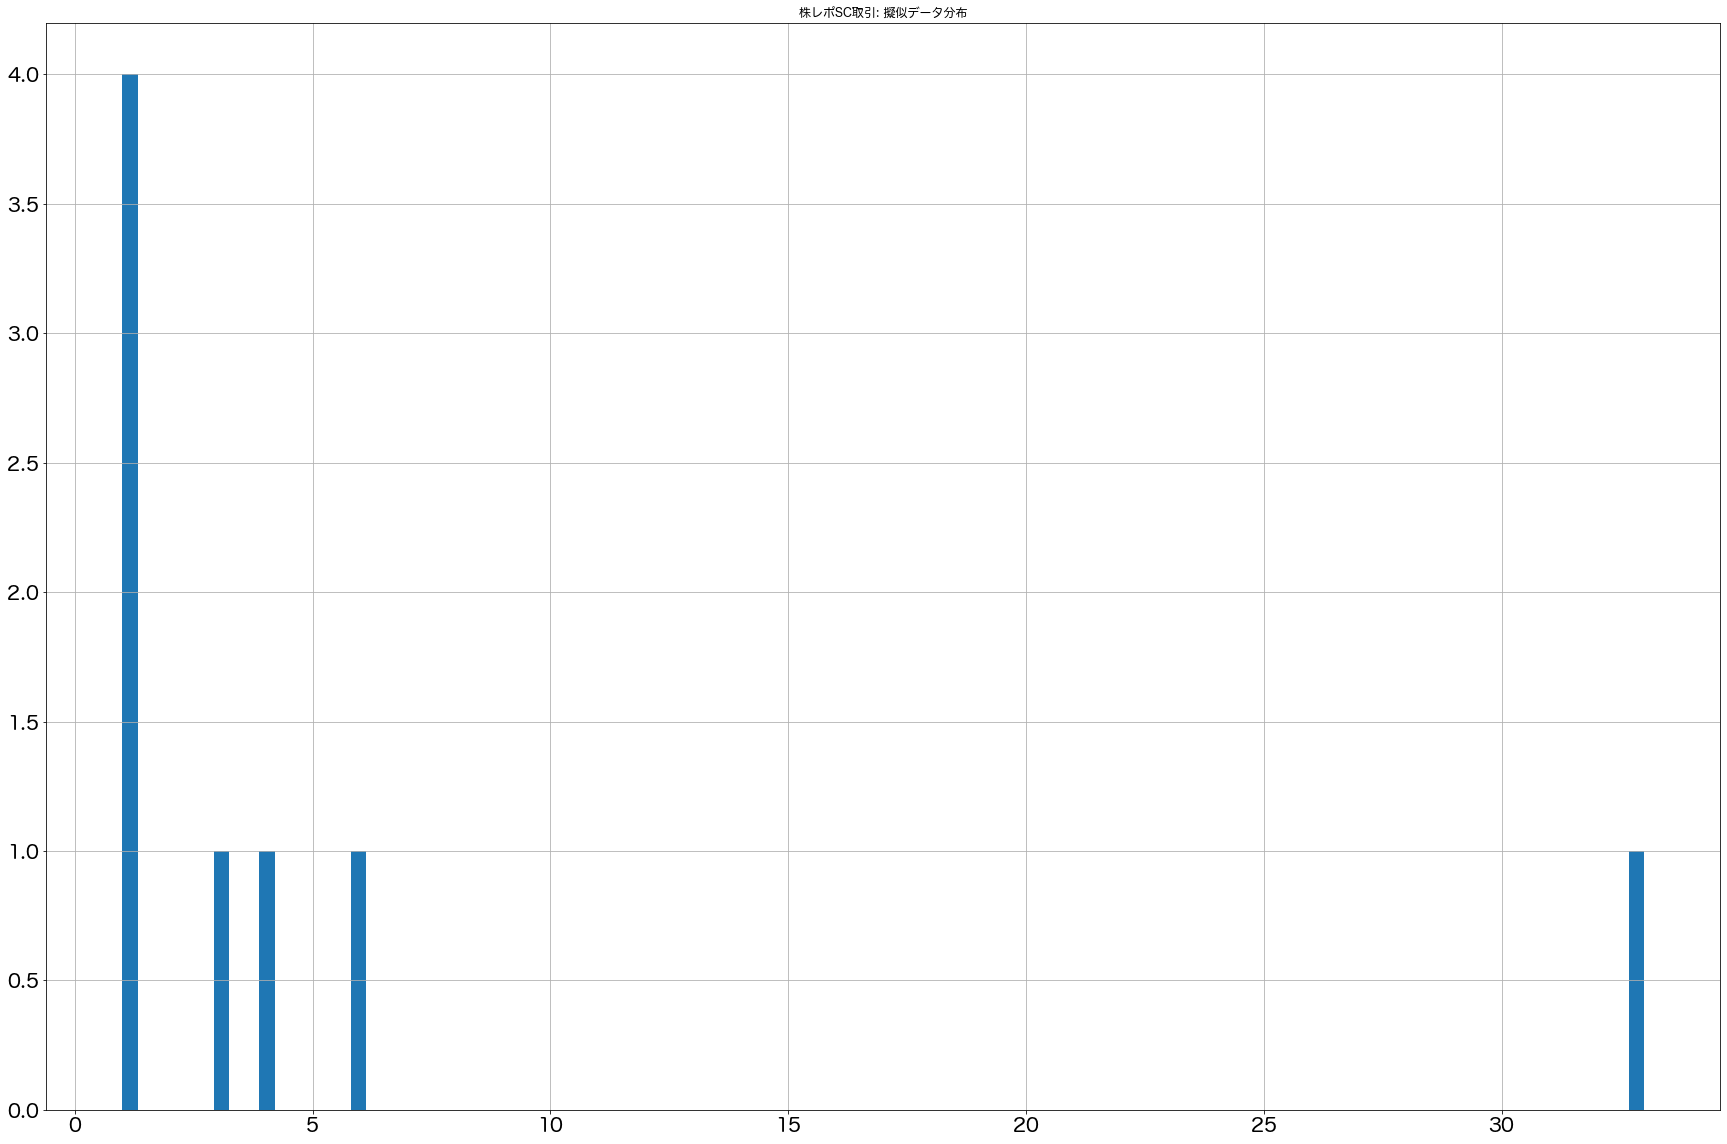

In [60]:
for _key, _value in additional_trade_nums.items():
    _num = _value['sc']
    all_security_num_dfs[_key]['sc'] = get_sc_num_df(_num)
all_security_num_dfs

#### 債券レポ

債券レポ: 取引銘柄数
          1   2-5   6-10  11-50
ratio  0.69  0.27   0.03   0.01
min    1.00  2.00   6.00  11.00
max    1.00  5.00  10.00  30.00
'=================================================='


Text(0.5, 1.0, '債券レポ取引: 銘柄数')

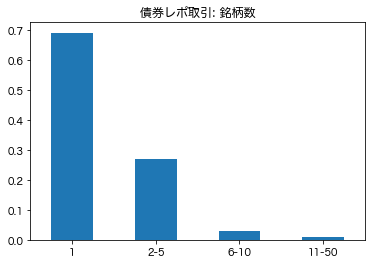

In [61]:
bond_security_num_dist = pd.DataFrame([[0.69, 0.27, 0.03, 0.01], [1, 2, 6, 11], [1, 5, 10, 30]],
                             columns=['1', '2-5', '6-10', '11-50'],
                             index=['ratio', 'min', 'max'])
bond_security_num_ave = 1.87
print('債券レポ: 取引銘柄数')
pprint(bond_security_num_dist)
pprint('='*50)

bond_security_num_dist.T['ratio'].plot(kind='bar', rot=0)
plt.title('債券レポ取引: 銘柄数')

Text(0.5, 1.0, '再建レポ取引: ヒストグラム')

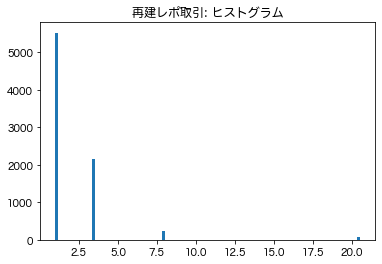

In [62]:
bond_trade_num = 8000
bond_ave_security_num_list = (bond_security_num_dist.T['min'] + bond_security_num_dist.T['max']) / 2
bond_security_num_sample = [[ave]*int(bond_security_num_dist.T['ratio'][index] * bond_trade_num)  for (index, ave) in enumerate(bond_ave_security_num_list)]

plt.hist(list(itertools.chain.from_iterable(bond_security_num_sample)), bins=100)
plt.title('再建レポ取引: ヒストグラム')

In [63]:
def get_bond_num_df(trade_num):
    bond_security_num_max = bond_security_num_dist['11-50']['max']
    bond_security_num_min = bond_security_num_dist['1']['min'] - 1
    _nums = []
    for i in range(trade_num):
        _nums.append(np.random.choice(a=[1, np.random.randint(2, 6), np.random.randint(6, 11), np.random.randint(11, 51)],  p=[0.69, 0.27, 0.03, 0.01]))
       
    mock_bond_security_num_df = pd.DataFrame(_nums, dtype=int)
    mock_bond_security_num_df.hist(bins=1000, figsize=(30, 20))
    plt.title('債券レポ取引: 擬似データ分布（三角分布）')
    return mock_bond_security_num_df

0    50
dtype: int64

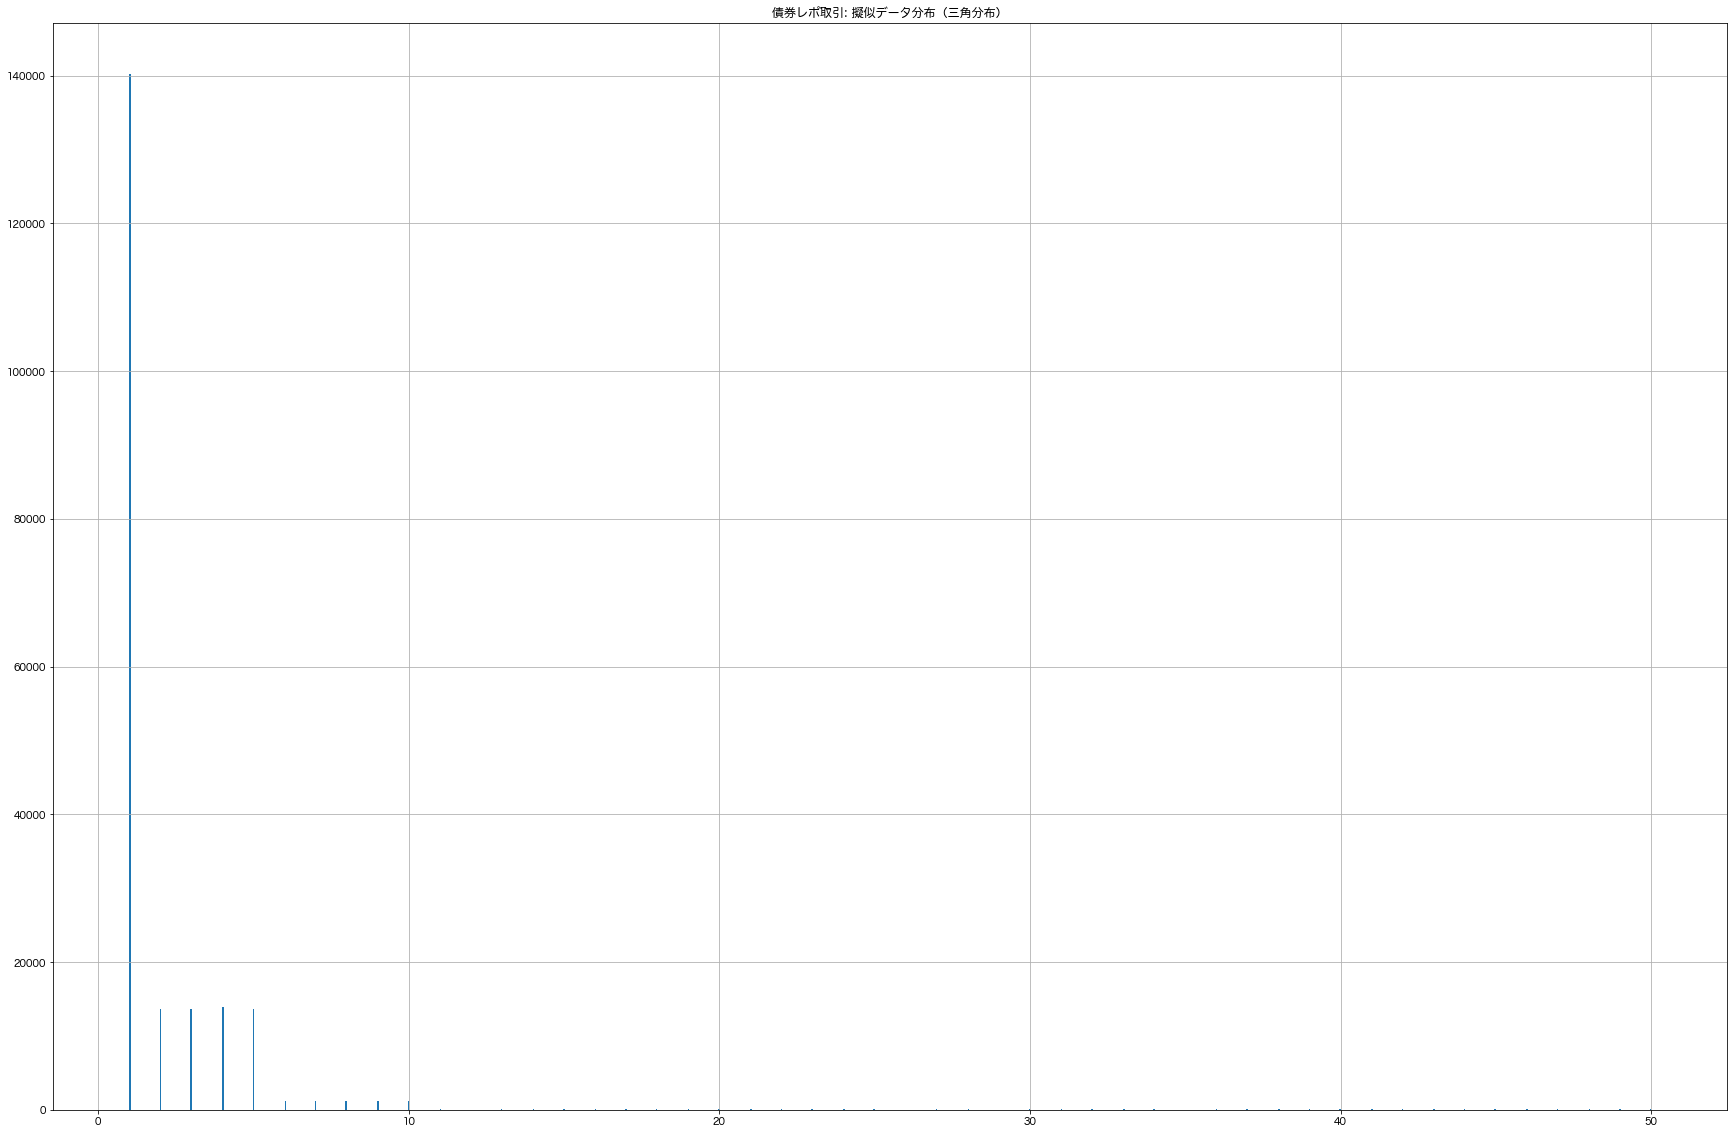

In [64]:
get_bond_num_df(b_trade_nums['100%']['bond']).max()

{'460': {'gc':       0
  0    38
  1    36
  2    43
  3    67
  4    15
  5    73
  6   166
  7    29
  8   113
  9    91
  10   39,
  'sc':      0
  0    2
  1    1
  2    1
  3    1
  4    1
  ..  ..
  69   1
  70  37
  71   1
  72   3
  73   1
  
  [74 rows x 1 columns],
  'bond':      0
  0    1
  1    1
  2    1
  3    7
  4    1
  ..  ..
  370  1
  371  1
  372  1
  373  1
  374  1
  
  [375 rows x 1 columns]},
 '200': {'gc':      0
  0   11
  1  118
  2   37
  3   48
  4   63,
  'sc':      0
  0    1
  1    1
  2    1
  3    4
  4    1
  5    1
  6   10
  7    9
  8    1
  9    1
  10  30
  11   1
  12   6
  13   1
  14  47
  15  10
  16   4
  17  40
  18   1
  19   5
  20   1
  21   2
  22  17
  23   1
  24   1
  25   1
  26   1
  27   1
  28   1
  29   1
  30   9
  31   7,
  'bond':      0
  0    2
  1    1
  2    2
  3    1
  4    4
  ..  ..
  158  1
  159  4
  160  5
  161  1
  162  1
  
  [163 rows x 1 columns]},
 '150': {'gc':      0
  0  137
  1  173
  2   98
  3  148,
 

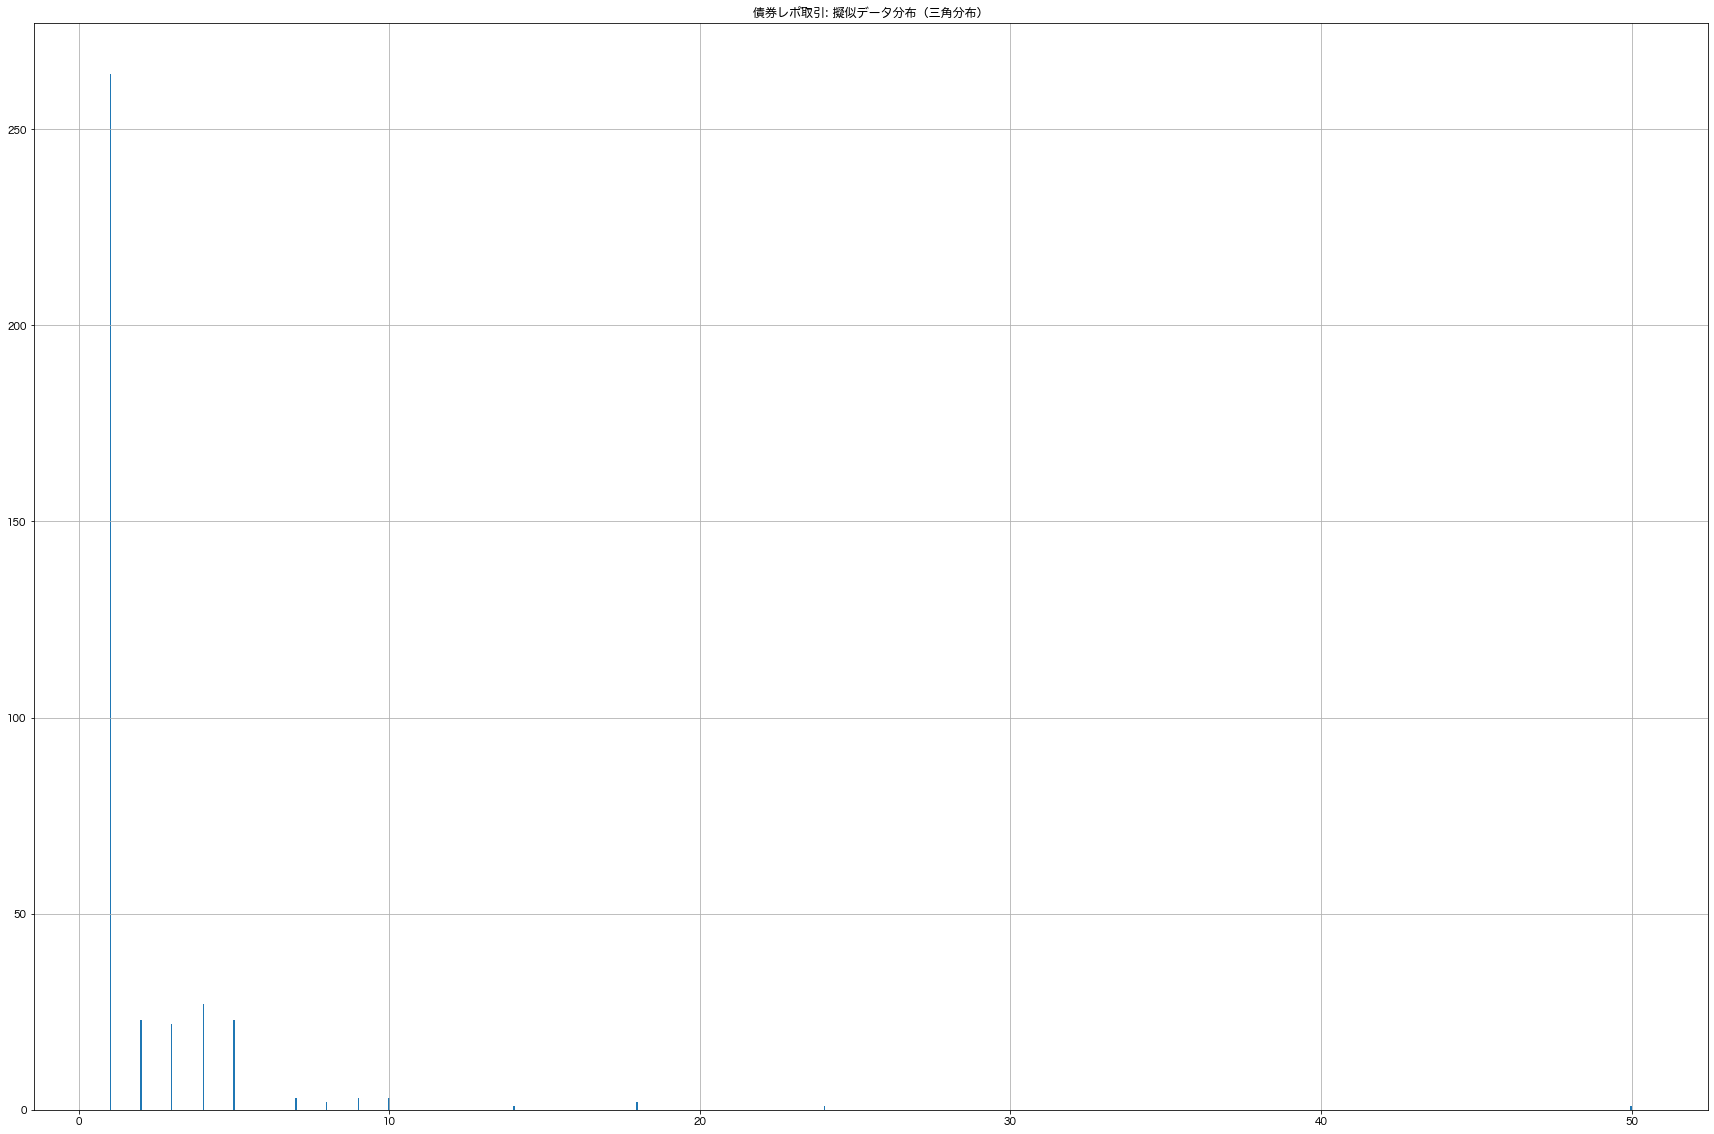

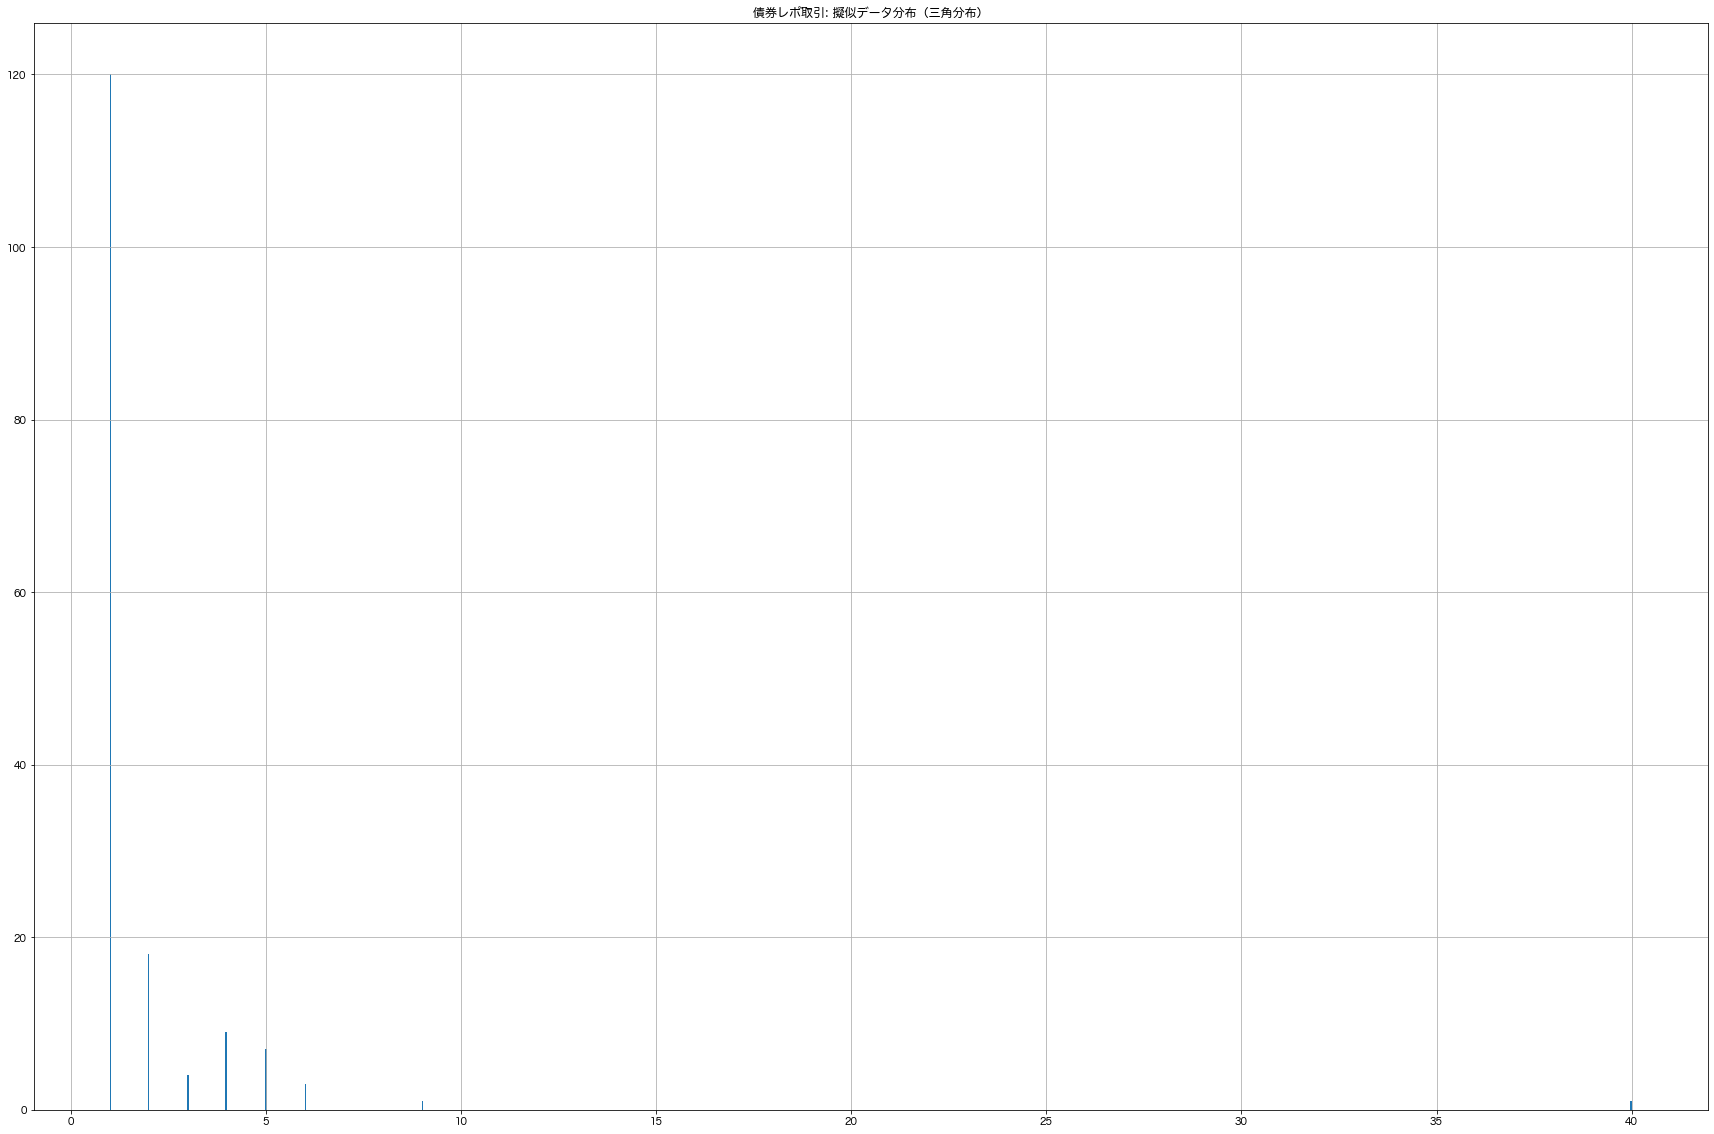

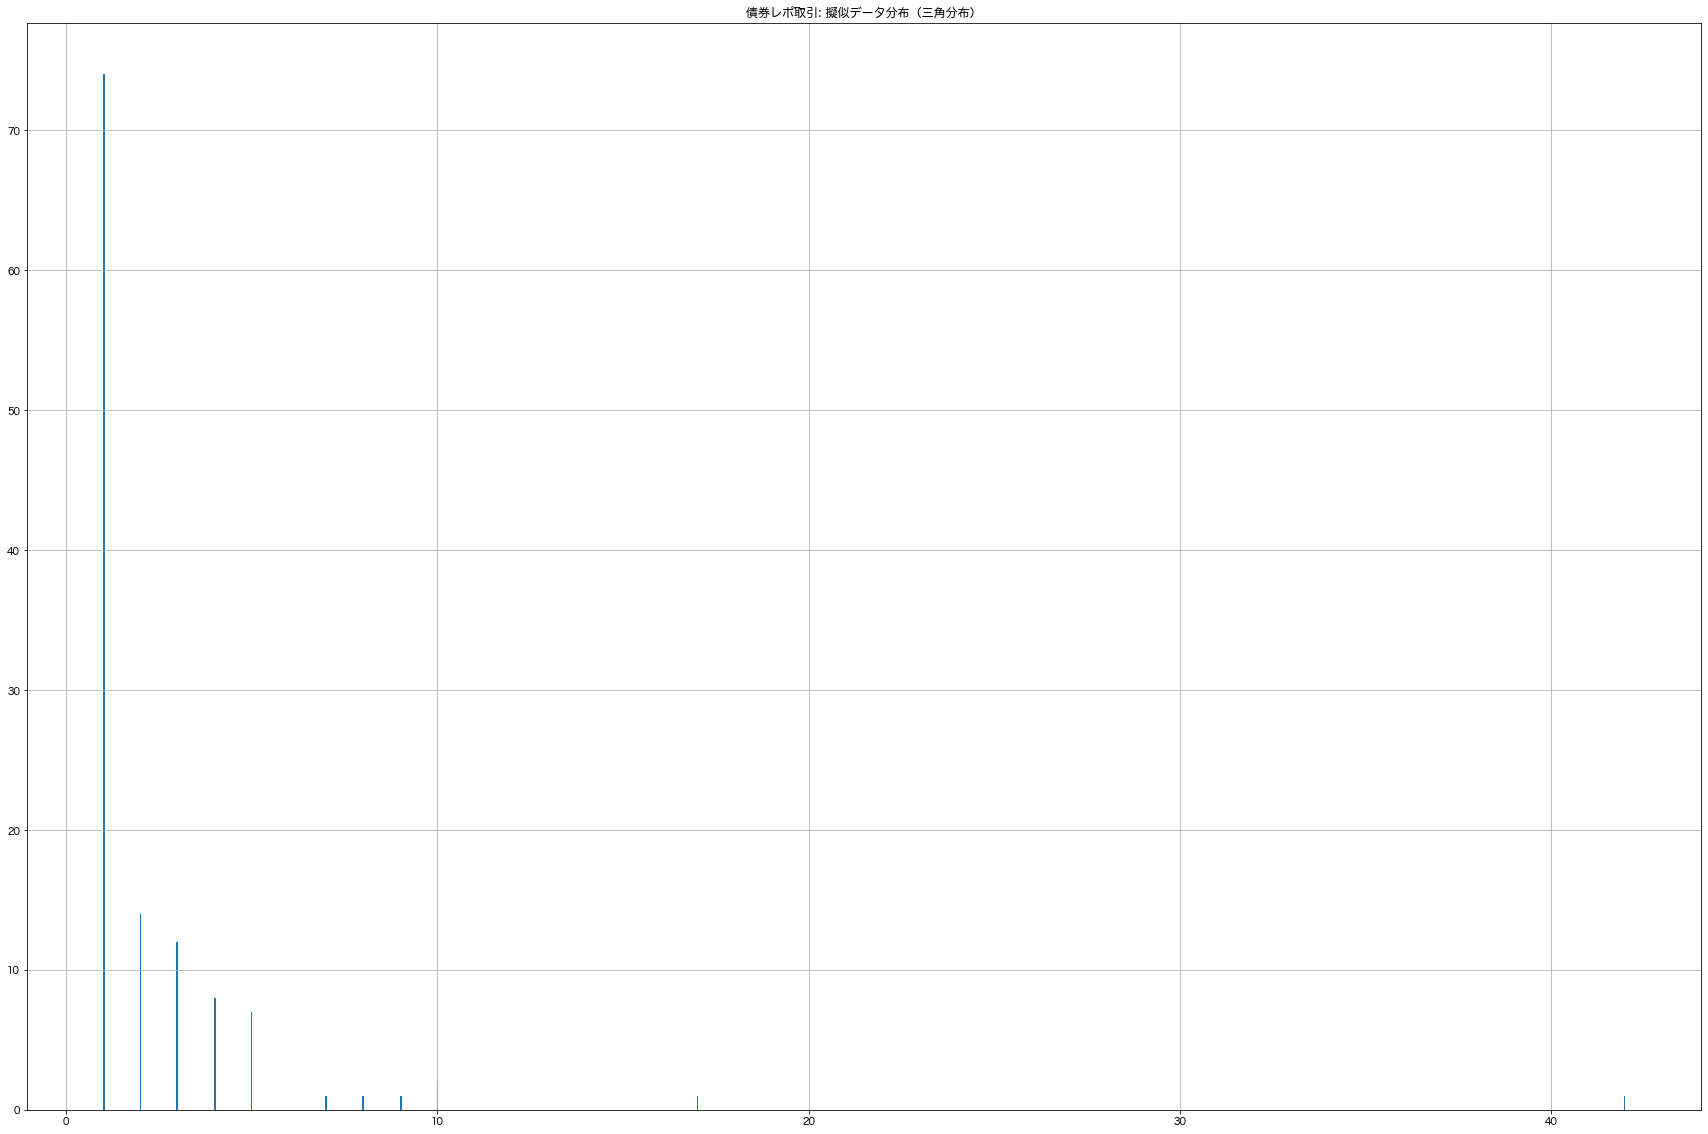

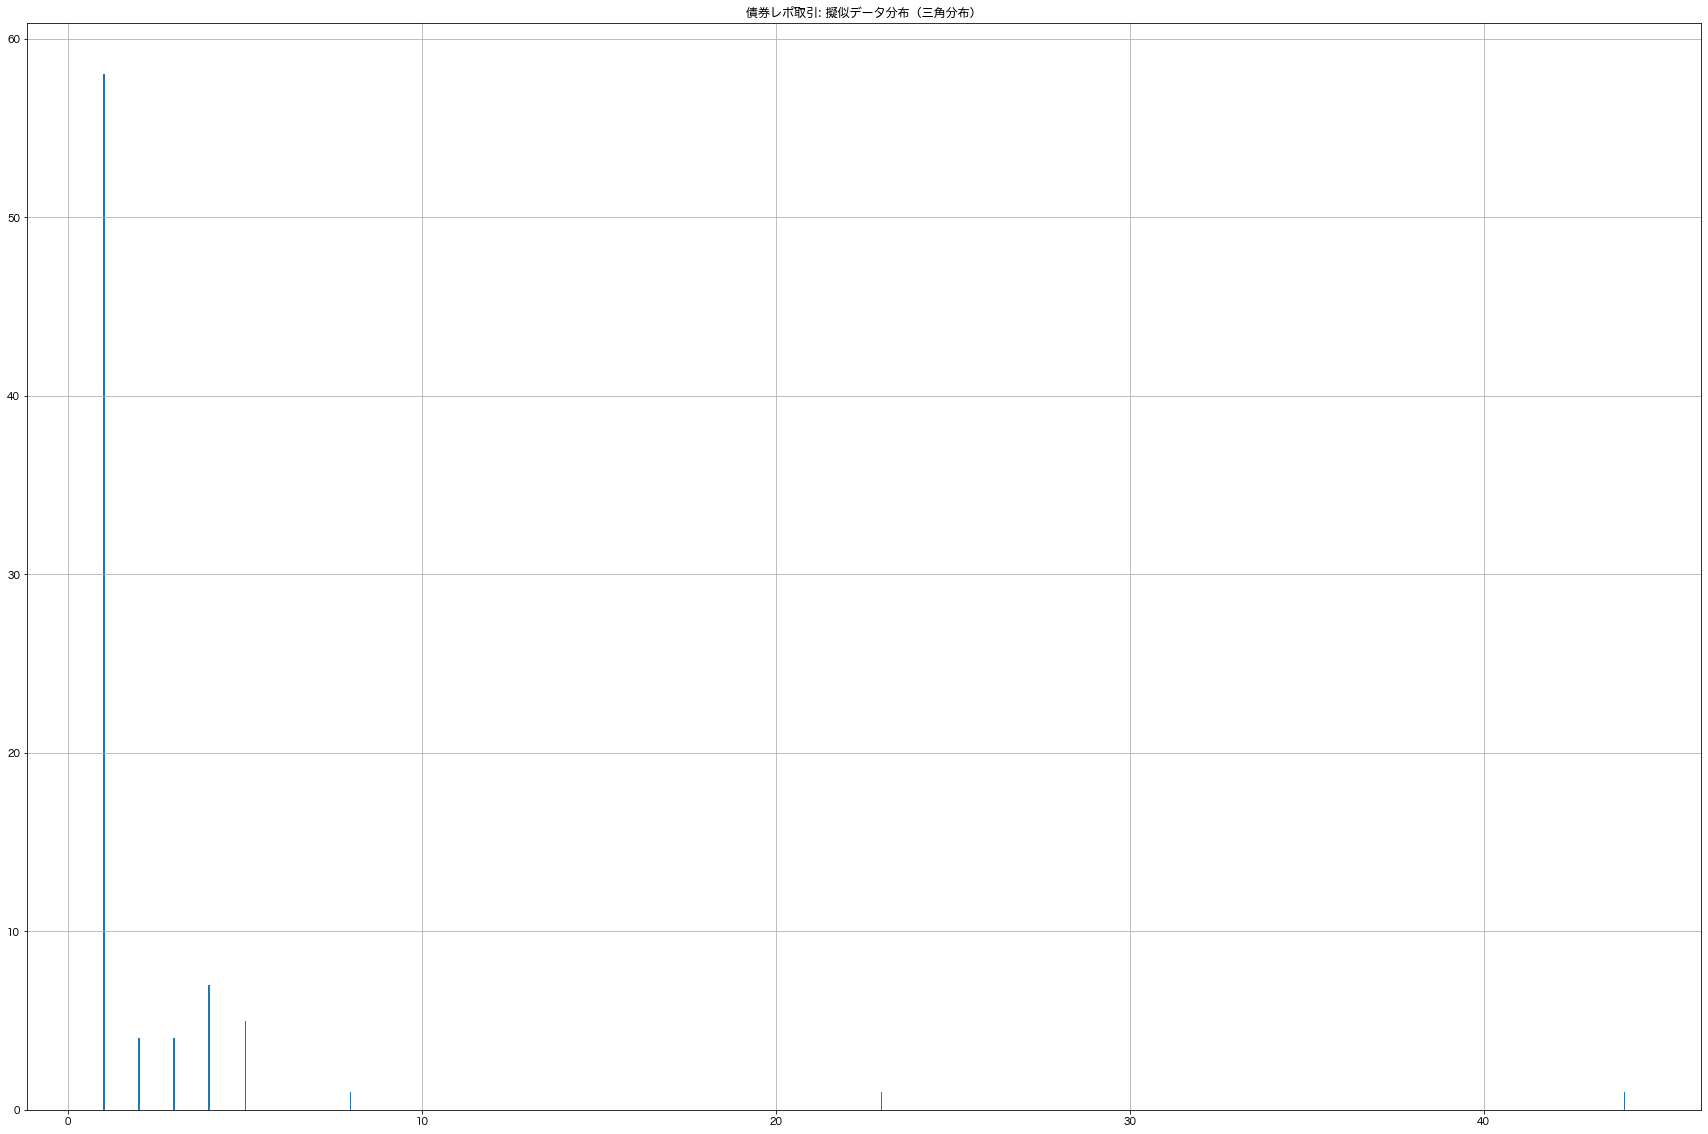

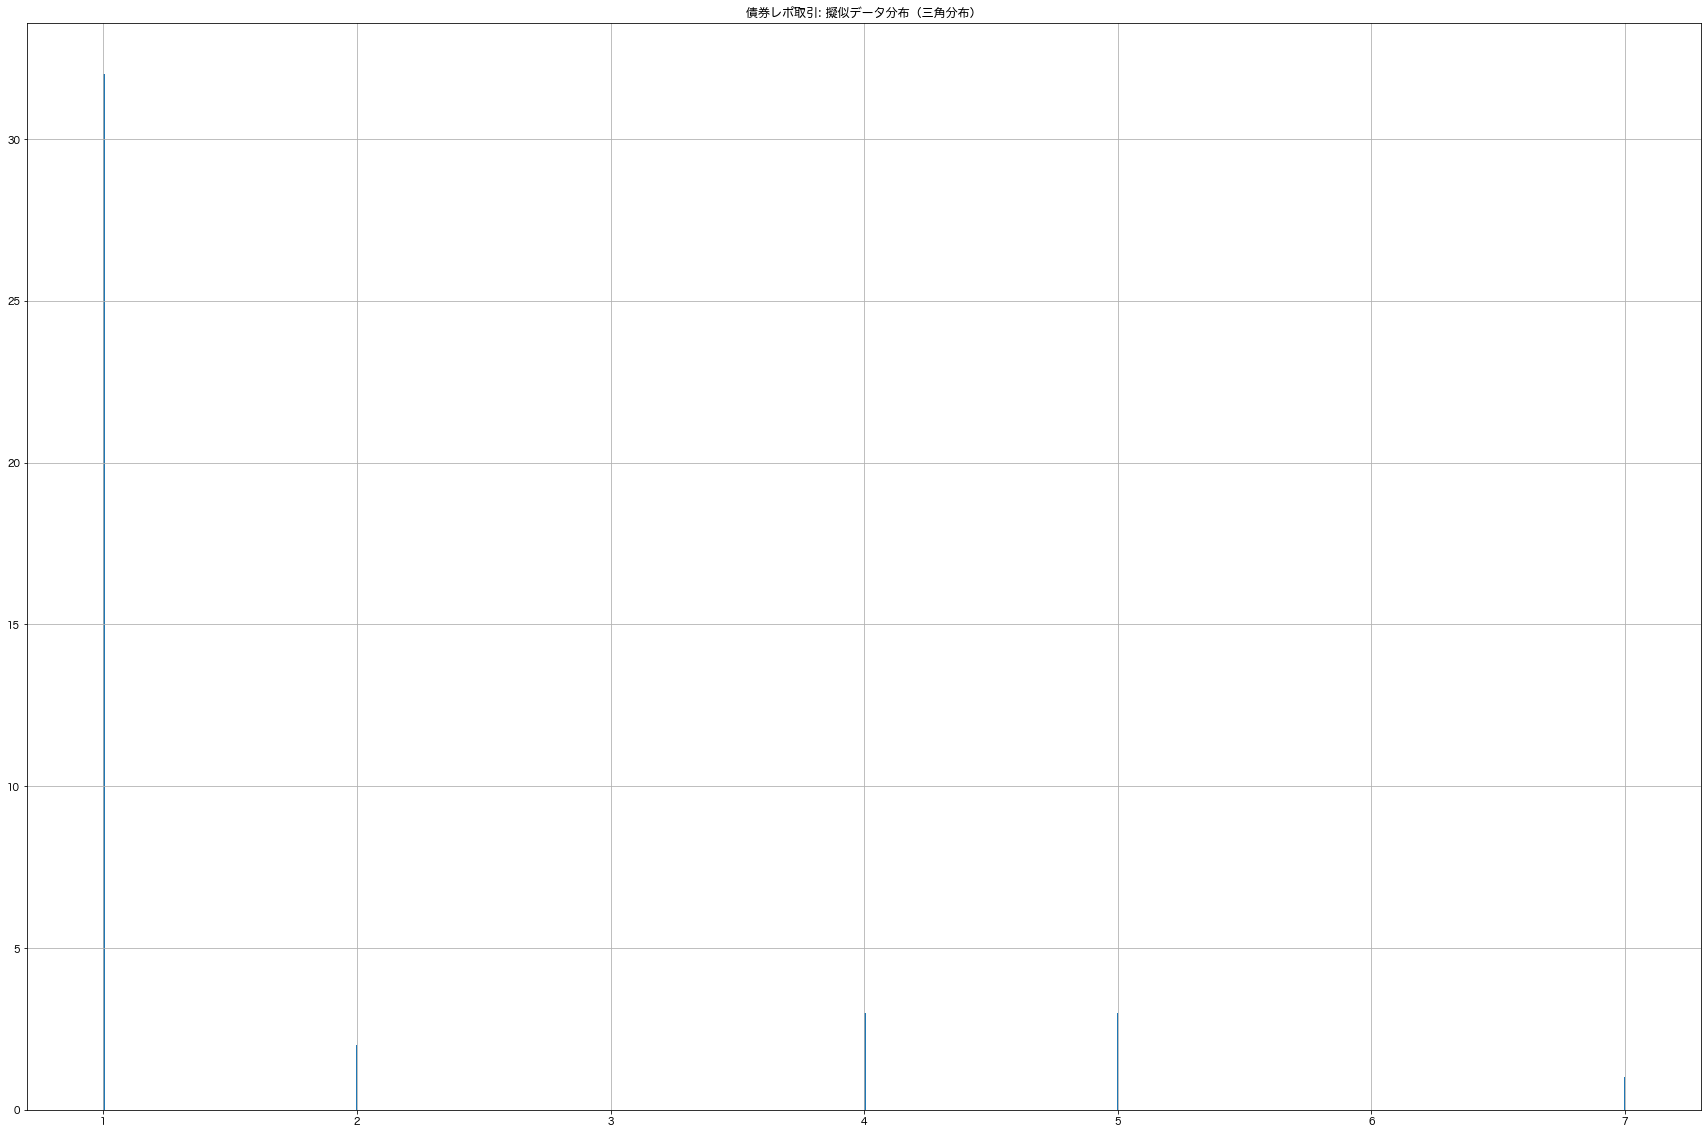

In [65]:
for _key, _value in additional_trade_nums.items():
    _num = _value['bond']
    all_security_num_dfs[_key]['bond'] = get_bond_num_df(_num)
all_security_num_dfs

### 実験用CSV作成

#### 株レポ

##### createToken.csv

In [66]:
mock_gc_df = pd.DataFrame({'price': mock_gc_price_df[0], 'security_num': mock_gc_security_num_df[0]}, dtype=int)
mock_gc_df

NameError: name 'mock_gc_price_df' is not defined

In [67]:
stock_token_num = 2800
bond_token_num = 356

print(eval(sample_create_token_df['tokenId'][0]))
hex(eval(sample_create_token_df['tokenId'][1]))

14534201717928672332366944080943963275581073313804200410876330409119688163329


'0x2022111013215200000000000000000000000000000000000000000000000002'

In [68]:
participant_num = 20
participant_list = [chr(x + 65) for x in range(participant_num)]

In [69]:
# tokenId
initial_stock_tokenId = 0x2023010917021000000000000000000000000000000000000000000000000001
stock_tokenId_list = [str(hex(initial_stock_tokenId + i)) for i in range(stock_token_num)]

initial_bond_tokenId = 0x2023010917031000000000000000000000000000000000000000000000000001
bond_tokenId_list = [str(hex(initial_bond_tokenId + i)) for i in range(bond_token_num)]

In [70]:
# tokenName
stock_tokenName_list = [f'ST0{str(i).zfill(4)}' for i in range(stock_token_num)]
bond_tokenName_list = [f'ST1{str(i).zfill(4)}' for i in range(bond_token_num)]

In [71]:
# others
tokenTypeId = sample_create_token_df['tokenTypeId'][0]
stock_tokenTypeId_list = [tokenTypeId] * stock_token_num
bond_tokenTypeId_list = [tokenTypeId] * bond_token_num
updateTime = sample_create_token_df['updateTime'][0]
stock_updateTime_list = [updateTime] * stock_token_num
bond_updateTime_list = [updateTime] * bond_token_num
token_price = 5.0e+7
stock_price_list = [token_price] * stock_token_num
bond_price_list = [token_price] * bond_token_num

In [72]:
stock_create_token_df = pd.DataFrame([stock_tokenId_list, stock_tokenName_list, stock_price_list, stock_tokenTypeId_list, stock_updateTime_list], index=sample_create_token_df.columns).T
stock_create_token_df

,tokenId,tokenName,price,tokenTypeId,updateTime
0,0x20230109170210000000000000000000000000000000...,ST00000,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
1,0x20230109170210000000000000000000000000000000...,ST00001,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
2,0x20230109170210000000000000000000000000000000...,ST00002,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
3,0x20230109170210000000000000000000000000000000...,ST00003,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
4,0x20230109170210000000000000000000000000000000...,ST00004,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
...,...,...,...,...,...
2795,0x20230109170210000000000000000000000000000000...,ST02795,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
2796,0x20230109170210000000000000000000000000000000...,ST02796,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
2797,0x20230109170210000000000000000000000000000000...,ST02797,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
2798,0x20230109170210000000000000000000000000000000...,ST02798,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112


In [73]:
bond_create_token_df = pd.DataFrame([bond_tokenId_list, bond_tokenName_list, bond_price_list, bond_tokenTypeId_list, bond_updateTime_list], index=sample_create_token_df.columns).T
bond_create_token_df

,tokenId,tokenName,price,tokenTypeId,updateTime
0,0x20230109170310000000000000000000000000000000...,ST10000,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
1,0x20230109170310000000000000000000000000000000...,ST10001,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
2,0x20230109170310000000000000000000000000000000...,ST10002,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
3,0x20230109170310000000000000000000000000000000...,ST10003,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
4,0x20230109170310000000000000000000000000000000...,ST10004,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
...,...,...,...,...,...
351,0x20230109170310000000000000000000000000000000...,ST10351,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
352,0x20230109170310000000000000000000000000000000...,ST10352,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
353,0x20230109170310000000000000000000000000000000...,ST10353,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
354,0x20230109170310000000000000000000000000000000...,ST10354,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112


In [74]:
# JCTの行も追加する
# jct_row = pd.DataFrame({'tokenId': jct_tokenId, 'tokenName': 'JCT00000', 'price': jct_price, 'tokenTypeId': sample_create_token_df['tokenTypeId'][0], 'updateTime': sample_create_token_df['updateTime'][0]}, index=[0])

# total_create_token_df = pd.concat([jct_row, stock_create_token_df, bond_create_token_df], ignore_index=True).reset_index(drop=True)
total_create_token_df = pd.concat([stock_create_token_df, bond_create_token_df], ignore_index=True)
total_create_token_df

,tokenId,tokenName,price,tokenTypeId,updateTime
0,0x20230109170210000000000000000000000000000000...,ST00000,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
1,0x20230109170210000000000000000000000000000000...,ST00001,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
2,0x20230109170210000000000000000000000000000000...,ST00002,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
3,0x20230109170210000000000000000000000000000000...,ST00003,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
4,0x20230109170210000000000000000000000000000000...,ST00004,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
...,...,...,...,...,...
3151,0x20230109170310000000000000000000000000000000...,ST10351,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
3152,0x20230109170310000000000000000000000000000000...,ST10352,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
3153,0x20230109170310000000000000000000000000000000...,ST10353,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
3154,0x20230109170310000000000000000000000000000000...,ST10354,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112


In [75]:
total_create_token_df.to_csv(f'{data_relative_path}total_create_token.csv', index=False)

##### createTrade.csv

In [76]:
a_trade_num

11938

In [77]:
# 1種類のトークンが最大取引数を取るように調整しつつ、取引ごとにランダムで銘柄をサンプリングする
def sample_with_freq_token(freq_num, token_list, token_num_list):
    if (freq_num > len(token_num_list)):
        raise ValueError('freq_num is larger than the number of trades!!')
    
    tokenIds_list = []
    freq_token_id = token_list[0]
    count = freq_num
    
    for _num in token_num_list:
        if count > 0:
            tokenIds_list.append([freq_token_id] + list(token_list[1:].sample(_num - 1)))
            count -= 1
        else:
            tokenIds_list.append(list(token_list[1:].sample(_num)))
    
    return tokenIds_list

# lenderTokenIds_list = sample_with_freq_token(b_security_nums['100%']['stock'], st_list, all_security_num_dfs['100%']['gc'][0])
# print(lenderTokenIds_list[:5])

In [78]:
def get_trade_df(trade_num, initial_tradingId,  price_df, security_num_df, create_token_df, with_freq=False, freq_num=0):
    # tradingId
    tradingId_list = [str(hex(initial_tradingId + i)) for i in range(trade_num)]

    # lenderTokenIds, lenderTokenAmounts
    st_list = create_token_df['tokenId']
    lenderTokenIds_list = sample_with_freq_token(freq_num, st_list, security_num_df[0]) if with_freq else [list(st_list[1:].sample(security_num)) for security_num in security_num_df[0]]
    lenderTokenAmounts_list = []
    lender_token_total_price_list = []
    for i in range(trade_num):
        each_num = int(math.ceil((price_df[0][i] / token_price ) / security_num_df[0][i]))
        lenderTokenAmounts_list.append([each_num] * security_num_df[0][i])
        lender_token_total_price_list.append(each_num * security_num_df[0][i] * token_price)

    # borrowerTokenAmounts
    borrowerTokenAmounts_list = [[math.ceil(lender_total_price / jct_price)] for lender_total_price in lender_token_total_price_list]
    
    # others
#     lender_list, borrower_list = get_random_participants(trade_num, participant_num)
    lender_list = [sample_create_trading_df['lender'][0]] * trade_num # dummy 
    borrowerTokenIds_list = [sample_create_trading_df['borrowerTokenIds'][0]] * trade_num
    startTime_list = [sample_create_trading_df['startTime'][0]] * trade_num
    finishTime_list = [sample_create_trading_df['finishTime'][0]] * trade_num
    rate_list = [sample_create_trading_df['rate'][0]] * trade_num
    adjustmentToken_list = [sample_create_trading_df['adjustmentToken'][0]] * trade_num
    return pd.DataFrame([tradingId_list, lender_list, borrowerTokenIds_list, lenderTokenIds_list, borrowerTokenAmounts_list, lenderTokenAmounts_list, startTime_list, finishTime_list, rate_list, adjustmentToken_list], index=sample_create_trading_df.columns).T

In [79]:
# 多者間での取引を再現するためにborrower、lenderのリストをランダムに生成
def get_random_participants(trade_num, participant_num):
    _participant_list = [chr(x + 65) for x in range(participant_num)]
    _trade_participant_list = [random.sample(_participant_list, 2) for i in range(trade_num)]
    _user_ids = {}
    default_id = '0x0000000000000000000000000000000000000000000000000000000000000000'
    for i, _participant in enumerate(_participant_list):
        index_str = str(i + 1)
        index_str_len = len(index_str)
        _user_ids[_participant] = default_id[:-index_str_len] + index_str
    return _trade_participant_list, _participant_list, _user_ids

In [80]:
# lenderIdについては0x0000000000000000000000000000000000000000000000000000000000000001~0x00000000000000000000000000000000000000000000000000000000000020
# に固定してしまうためベタ打ちで
'0x0000000000000000000000000000000000000000000000000000000000000001' + '1'

'0x00000000000000000000000000000000000000000000000000000000000000011'

In [81]:
get_random_participants(20, 10)

([['B', 'H'],
  ['F', 'A'],
  ['D', 'H'],
  ['J', 'H'],
  ['J', 'F'],
  ['E', 'I'],
  ['G', 'J'],
  ['A', 'F'],
  ['E', 'H'],
  ['H', 'A'],
  ['D', 'B'],
  ['J', 'A'],
  ['D', 'J'],
  ['E', 'G'],
  ['C', 'H'],
  ['I', 'A'],
  ['B', 'C'],
  ['F', 'A'],
  ['C', 'J'],
  ['A', 'G']],
 ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
 {'A': '0x0000000000000000000000000000000000000000000000000000000000000001',
  'B': '0x0000000000000000000000000000000000000000000000000000000000000002',
  'C': '0x0000000000000000000000000000000000000000000000000000000000000003',
  'D': '0x0000000000000000000000000000000000000000000000000000000000000004',
  'E': '0x0000000000000000000000000000000000000000000000000000000000000005',
  'F': '0x0000000000000000000000000000000000000000000000000000000000000006',
  'G': '0x0000000000000000000000000000000000000000000000000000000000000007',
  'H': '0x0000000000000000000000000000000000000000000000000000000000000008',
  'I': '0x0000000000000000000000000000000000000000

In [82]:
# trade_num毎に各種create_trade_dfを作成し結合、csv形式で出力
initial_tradingIds = {
    'gc': 0x2023010918240000000000000000000000000000000000000000000000000001,
    'sc': 0x2023010918241000000000000000000000000000000000000000000000000001,
    'bond': 0x2023010918242000000000000000000000000000000000000000000000000001,
}

results = {}
    
for _all_trade_num, _obj in additional_trade_nums.items():
    print(f'{_all_trade_num} starts:')
    pprint(_obj)
    file_name = f'{data_relative_path}create_trade_{_all_trade_num}.csv'
    create_trade_df_list = []
    for _type, _num in _obj.items():
        _initial_tradingId = initial_tradingIds[_type]
        _create_token_df = stock_create_token_df if _type in ['gc', 'sc'] else bond_create_token_df
        _security_category = 'stock' if _type in ['gc', 'sc'] else 'bond'
        _with_freq = _type in ['gc', 'bond']
        %time _create_trade_df = get_trade_df(_num, _initial_tradingId, all_price_dfs[_all_trade_num][_type], all_security_num_dfs[_all_trade_num][_type], _create_token_df, _with_freq, additional_security_nums[_all_trade_num][_security_category])
        _create_trade_df['lock'] = [2] * _num
        _create_trade_df['margincallThreshold'] = [0] * _num
        _create_trade_df['adjustmentTokenTypeId'] = ['0x3078303030303100000000000000000000000000000000000000000000000000'] * _num
        _create_trade_df.drop('adjustmentToken', axis=1, inplace=True)
        
        create_trade_df_list.append(_create_trade_df)
    all_create_trades_df = pd.concat(create_trade_df_list, ignore_index=True)
    results[_all_trade_num] = all_create_trades_df
    all_create_trades_df.to_csv(file_name, index=False)
    print(f'{_all_trade_num} finished!')

460 starts:
{'bond': 375, 'gc': 11, 'sc': 74}
CPU times: user 2.74 ms, sys: 1.1 ms, total: 3.83 ms
Wall time: 3.55 ms
CPU times: user 8.79 ms, sys: 733 µs, total: 9.52 ms
Wall time: 8.94 ms
CPU times: user 26.7 ms, sys: 174 µs, total: 26.9 ms
Wall time: 26.9 ms
460 finished!
200 starts:
{'bond': 163, 'gc': 5, 'sc': 32}
CPU times: user 820 µs, sys: 7 µs, total: 827 µs
Wall time: 830 µs
CPU times: user 3.44 ms, sys: 0 ns, total: 3.44 ms
Wall time: 3.44 ms
CPU times: user 11.3 ms, sys: 30 µs, total: 11.3 ms
Wall time: 11.3 ms
200 finished!
150 starts:
{'bond': 122, 'gc': 4, 'sc': 24}
CPU times: user 698 µs, sys: 13 µs, total: 711 µs
Wall time: 716 µs
CPU times: user 2.63 ms, sys: 3 µs, total: 2.64 ms
Wall time: 2.64 ms
CPU times: user 8.77 ms, sys: 29 µs, total: 8.8 ms
Wall time: 8.81 ms
150 finished!
100 starts:
{'bond': 81, 'gc': 3, 'sc': 16}
CPU times: user 563 µs, sys: 7 µs, total: 570 µs
Wall time: 571 µs
CPU times: user 1.83 ms, sys: 4 µs, total: 1.83 ms
Wall time: 1.83 ms
CPU times

In [84]:
results['200']

,tradingId,lender,borrowerTokenIds,lenderTokenIds,borrowerTokenAmounts,lenderTokenAmounts,startTime,finishTime,rate,lock,margincallThreshold,adjustmentTokenTypeId
0,0x20230109182400000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,[0x2023010917021000000000000000000000000000000...,[10137231500],"[1843133, 1843133, 1843133, 1843133, 1843133, ...",1668054340,1668057940,100,2,0,0x30783030303031000000000000000000000000000000...
1,0x20230109182400000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,[0x2023010917021000000000000000000000000000000...,[64355135000],"[1090765, 1090765, 1090765, 1090765, 1090765, ...",1668054340,1668057940,100,2,0,0x30783030303031000000000000000000000000000000...
2,0x20230109182400000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,[0x2023010917021000000000000000000000000000000...,[25597858000],"[1383668, 1383668, 1383668, 1383668, 1383668, ...",1668054340,1668057940,100,2,0,0x30783030303031000000000000000000000000000000...
3,0x20230109182400000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,[0x2023010917021000000000000000000000000000000...,[27010200000],"[1125425, 1125425, 1125425, 1125425, 1125425, ...",1668054340,1668057940,100,2,0,0x30783030303031000000000000000000000000000000...
4,0x20230109182400000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,[0x2023010917021000000000000000000000000000000...,[52437168000],"[1664672, 1664672, 1664672, 1664672, 1664672, ...",1668054340,1668057940,100,2,0,0x30783030303031000000000000000000000000000000...
...,...,...,...,...,...,...,...,...,...,...,...,...
195,0x20230109182420000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,[0x2023010917031000000000000000000000000000000...,[307256699500],[614513399],1668054340,1668057940,100,2,0,0x30783030303031000000000000000000000000000000...
196,0x20230109182420000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,[0x2023010917031000000000000000000000000000000...,[181462150000],"[90731075, 90731075, 90731075, 90731075]",1668054340,1668057940,100,2,0,0x30783030303031000000000000000000000000000000...
197,0x20230109182420000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,[0x2023010917031000000000000000000000000000000...,[86555892500],"[34622357, 34622357, 34622357, 34622357, 34622...",1668054340,1668057940,100,2,0,0x30783030303031000000000000000000000000000000...
198,0x20230109182420000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,[0x2023010917031000000000000000000000000000000...,[260720026000],[521440052],1668054340,1668057940,100,2,0,0x30783030303031000000000000000000000000000000...


In [85]:
all_create_token_df = pd.read_csv('../data/sample/csv/createToken_decode.csv')
all_create_token_df

,tokenId,tokenName,price,tokenTypeId,updateTime
0,0x20221110132152000000000000000000000000000000...,ST00001,10000000,0x30783030303031000000000000000000000000000000...,1668054112
1,0x20221110132152000000000000000000000000000000...,ST00002,10000000,0x30783030303031000000000000000000000000000000...,1668054112
2,0x20221110132152000000000000000000000000000000...,ST00003,10000000,0x30783030303031000000000000000000000000000000...,1668054112
3,0x20221110132152000000000000000000000000000000...,ST00004,10000000,0x30783030303031000000000000000000000000000000...,1668054112
4,0x20221110132152000000000000000000000000000000...,ST00005,10000000,0x30783030303031000000000000000000000000000000...,1668054112
...,...,...,...,...,...
351,0x20221110132152000000000000000000000000000000...,ST00352,10000000,0x30783030303031000000000000000000000000000000...,1668054112
352,0x20221110132152000000000000000000000000000000...,ST00353,10000000,0x30783030303031000000000000000000000000000000...,1668054112
353,0x20221110132152000000000000000000000000000000...,ST00354,10000000,0x30783030303031000000000000000000000000000000...,1668054112
354,0x20221110132152000000000000000000000000000000...,ST00355,10000000,0x30783030303031000000000000000000000000000000...,1668054112


In [86]:
# 作成した取引数ごとのcreateTradingファイルを20者に分割していく
all_create_trade_results = {}
for _all_trade_num, _obj in additional_trade_nums.items():
    print(f'{_all_trade_num} starts///')
    _file_name = f'{data_relative_path}create_trade_{_all_trade_num}.csv'
    _create_trade = pd.read_csv(_file_name)
    all_create_trade_results[file_name] = _create_trade
    _trade_num_all = sum(_obj.values())
    print(f'trade num: {_trade_num_all}')
    trade_participant_list, participant_list, user_ids = get_random_participants(_trade_num_all, participant_num)
    
    create_trade_df_list = []
    
    cur = 0
    for participant in participant_list:
        borrower = participant
        _trade_participant_list = list(filter(lambda x: x[0] == borrower, trade_participant_list))
        _trade_num = len(_trade_participant_list)
        _result_df = _create_trade.iloc[cur:cur+_trade_num, :]
        _result_df['lender'] = [user_ids[_participant[1]] for _participant in _trade_participant_list]
        _result_df = _result_df.reset_index(drop=True)
#         data_dir = Path('../data/data202303_v2')
#         data_dir.mkdir(parents=True, exist_ok=True)
        Path(f'{data_relative_path}{_all_trade_num}').mkdir(parents=True, exist_ok=True)
        _result_df.to_csv(f'{data_relative_path}{_all_trade_num}/create_trade_{borrower}.csv', index=False)
        create_trade_df_list.append(_result_df)
        cur += _trade_num
    
    create_trade_all_df = pd.concat(create_trade_df_list, ignore_index=True)
    print(f'total unique num: {create_trade_all_df["tradingId"].nunique()}')
    for participant in participant_list:
        lender = participant
        _df = create_trade_all_df.query(f'lender == "{user_ids[lender]}"')['tradingId']
        _df.to_csv(f'{data_relative_path}{_all_trade_num}/accept_trade_{lender}.csv', index=False)
        print(f'{_all_trade_num}_{lender}:')
#         pprint(_df)


460 starts///
trade num: 460
total unique num: 460
460_A:
460_B:
460_C:
460_D:
460_E:
460_F:
460_G:
460_H:
460_I:
460_J:
460_K:
460_L:
460_M:
460_N:
460_O:
460_P:
460_Q:
460_R:
460_S:
460_T:
200 starts///
trade num: 200


/var/folders/7c/jl9q60jd1558_fg0tfx8254r0000gn/T/ipykernel_72381/2801628450.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _result_df['lender'] = [user_ids[_participant[1]] for _participant in _trade_participant_list]
/var/folders/7c/jl9q60jd1558_fg0tfx8254r0000gn/T/ipykernel_72381/2801628450.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _result_df['lender'] = [user_ids[_participant[1]] for _participant in _trade_participant_list]
/var/folders/7c/jl9q60jd1558_fg0tfx8254r0000gn/T/ipykernel_72381

total unique num: 200
200_A:
200_B:
200_C:
200_D:
200_E:
200_F:
200_G:
200_H:
200_I:
200_J:
200_K:
200_L:
200_M:
200_N:
200_O:
200_P:
200_Q:
200_R:
200_S:
200_T:
150 starts///
trade num: 150
total unique num: 150
150_A:
150_B:
150_C:
150_D:
150_E:
150_F:
150_G:
150_H:
150_I:
150_J:
150_K:
150_L:
150_M:
150_N:
150_O:
150_P:
150_Q:
150_R:
150_S:
150_T:
100 starts///
trade num: 100
total unique num: 100
100_A:
100_B:
100_C:
100_D:
100_E:
100_F:
100_G:
100_H:
100_I:
100_J:
100_K:
100_L:
100_M:
100_N:
100_O:
100_P:
100_Q:
100_R:
100_S:
100_T:
50 starts///
trade num: 50
total unique num: 50
50_A:
50_B:
50_C:
50_D:
50_E:
50_F:
50_G:
50_H:
50_I:
50_J:
50_K:
50_L:
50_M:
50_N:
50_O:
50_P:
50_Q:
50_R:
50_S:
50_T:


/var/folders/7c/jl9q60jd1558_fg0tfx8254r0000gn/T/ipykernel_72381/2801628450.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _result_df['lender'] = [user_ids[_participant[1]] for _participant in _trade_participant_list]
/var/folders/7c/jl9q60jd1558_fg0tfx8254r0000gn/T/ipykernel_72381/2801628450.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _result_df['lender'] = [user_ids[_participant[1]] for _participant in _trade_participant_list]


In [87]:
additional_trade_nums

{'460': {'gc': 11, 'sc': 74, 'bond': 375},
 '200': {'gc': 5, 'sc': 32, 'bond': 163},
 '150': {'gc': 4, 'sc': 24, 'bond': 122},
 '100': {'gc': 3, 'sc': 16, 'bond': 81},
 '50': {'gc': 1, 'sc': 8, 'bond': 41}}

##### updateToken

In [88]:
sample_update_token_df

,tokenId,price,updateTime
0,0x20221110132152000000000000000000000000000000...,9000000,1668054263
1,0x20221110132152000000000000000000000000000000...,9000000,1668054263
2,0x20221110132152000000000000000000000000000000...,9000000,1668054263
3,0x20221110132152000000000000000000000000000000...,9000000,1668054263
4,0x20221110132152000000000000000000000000000000...,9000000,1668054263
...,...,...,...
351,0x20221110132152000000000000000000000000000000...,9000000,1668054263
352,0x20221110132152000000000000000000000000000000...,9000000,1668054263
353,0x20221110132152000000000000000000000000000000...,9000000,1668054263
354,0x20221110132152000000000000000000000000000000...,9000000,1668054263


In [89]:
total_update_token_df = total_create_token_df.copy()
total_update_token_df = total_update_token_df.drop(labels=['tokenName', 'tokenTypeId'], axis=1)
total_update_token_df

,tokenId,price,updateTime
0,0x20230109170210000000000000000000000000000000...,50000000.0,1668054112
1,0x20230109170210000000000000000000000000000000...,50000000.0,1668054112
2,0x20230109170210000000000000000000000000000000...,50000000.0,1668054112
3,0x20230109170210000000000000000000000000000000...,50000000.0,1668054112
4,0x20230109170210000000000000000000000000000000...,50000000.0,1668054112
...,...,...,...
3151,0x20230109170310000000000000000000000000000000...,50000000.0,1668054112
3152,0x20230109170310000000000000000000000000000000...,50000000.0,1668054112
3153,0x20230109170310000000000000000000000000000000...,50000000.0,1668054112
3154,0x20230109170310000000000000000000000000000000...,50000000.0,1668054112


In [90]:
# 日々の価格変化率をランダムで割り当てる
min_daily_change = -0.12
max_daily_change = 0.15
price_change_list = []
for i in range(stock_token_num + bond_token_num):
    price_change_list.append(1 + min_daily_change + np.random.rand() * (max_daily_change - min_daily_change))
price_change_list

[0.9510476927861732,
 0.9276837683589972,
 0.9799587748637779,
 0.9931499506371861,
 1.0978640319193218,
 0.9512063009331895,
 0.9804302773642174,
 0.9509084953638995,
 1.1196441556370655,
 0.9883483746283759,
 1.1207289773256077,
 1.039329549641773,
 1.0300465708899258,
 1.1236030811819295,
 1.1128386906200376,
 1.0352009579878518,
 0.9069544398782223,
 1.1206509037383723,
 0.8808642250192902,
 0.9368738171962462,
 0.9634162312628239,
 1.0332252054314899,
 0.9683978300433829,
 0.9887752017472737,
 0.9488487914286643,
 0.9891869277468688,
 1.0453794932378955,
 1.0921630787046177,
 0.947928125204602,
 1.0111001861837243,
 1.0198999841298573,
 1.0392991573959343,
 1.0859797129462443,
 1.1156009810672796,
 1.1105920645174359,
 1.0087601624762224,
 0.9839798984857588,
 1.014839828445227,
 0.9095437904389478,
 1.0902804768300804,
 1.075799883428689,
 1.0135118239326022,
 0.928762910450231,
 1.1213164314676385,
 0.9795147129216857,
 0.9834921025939868,
 1.081466512469101,
 1.1487903528755146

In [91]:
new_price_list = total_update_token_df['price'] * price_change_list
total_update_token_df['price'] = new_price_list.astype('int')

In [92]:
total_update_token_df

,tokenId,price,updateTime
0,0x20230109170210000000000000000000000000000000...,47552384,1668054112
1,0x20230109170210000000000000000000000000000000...,46384188,1668054112
2,0x20230109170210000000000000000000000000000000...,48997938,1668054112
3,0x20230109170210000000000000000000000000000000...,49657497,1668054112
4,0x20230109170210000000000000000000000000000000...,54893201,1668054112
...,...,...,...
3151,0x20230109170310000000000000000000000000000000...,49683077,1668054112
3152,0x20230109170310000000000000000000000000000000...,51498332,1668054112
3153,0x20230109170310000000000000000000000000000000...,56970640,1668054112
3154,0x20230109170310000000000000000000000000000000...,50082788,1668054112


In [93]:
total_update_token_df.to_csv(f'{data_relative_path}total_update_token.csv', index=False)

##### generateToken

In [94]:
# generate_token_df = pd.DataFrame(index=[], columns=['tokenId', 'userId'])
# _dict = {'tokenId': [10], 'userId': [20]}
# pd.concat([generate_token_df, pd.DataFrame(_dict)], ignore_index=True)

generate_token_dict = {'tokenId': [], 'userId': []}
for tokenId in list(total_create_token_df['tokenId']):
    for participant in participant_list:
        generate_token_dict['tokenId'].append(tokenId)
        generate_token_dict['userId'].append(user_ids[participant])

generate_token_df = pd.DataFrame(generate_token_dict)
generate_token_df['addAmount'] = [int(1e+15)] * len(generate_token_df)

In [95]:
generate_token_df.to_csv(f'{data_relative_path}total_generate_token.csv', index=False)

In [96]:
participant_list
user_ids

{'A': '0x0000000000000000000000000000000000000000000000000000000000000001',
 'B': '0x0000000000000000000000000000000000000000000000000000000000000002',
 'C': '0x0000000000000000000000000000000000000000000000000000000000000003',
 'D': '0x0000000000000000000000000000000000000000000000000000000000000004',
 'E': '0x0000000000000000000000000000000000000000000000000000000000000005',
 'F': '0x0000000000000000000000000000000000000000000000000000000000000006',
 'G': '0x0000000000000000000000000000000000000000000000000000000000000007',
 'H': '0x0000000000000000000000000000000000000000000000000000000000000008',
 'I': '0x0000000000000000000000000000000000000000000000000000000000000009',
 'J': '0x0000000000000000000000000000000000000000000000000000000000000010',
 'K': '0x0000000000000000000000000000000000000000000000000000000000000011',
 'L': '0x0000000000000000000000000000000000000000000000000000000000000012',
 'M': '0x0000000000000000000000000000000000000000000000000000000000000013',
 'N': '0x000

##### updateTrade

In [97]:
update_trade_df = pd.DataFrame(index=[], columns=['tradingId'])

for _all_trade_num, _obj in additional_trade_nums.items():
    print(_all_trade_num)
    accept_trade_df_list = []
    for _participant in participant_list:
        _accept_trade_df = pd.read_csv(f'{data_relative_path}{_all_trade_num}/accept_trade_{_participant}.csv')
        print(_accept_trade_df['tradingId'].nunique())
        accept_trade_df_list.append(_accept_trade_df)
    update_trade_df = pd.concat(accept_trade_df_list, ignore_index=True)
    update_trade_df.to_csv(f'{data_relative_path}{_all_trade_num}/update_trade.csv')
    print(len(update_trade_df['tradingId']))
    print(update_trade_df['tradingId'].nunique())
    pprint(update_trade_df)
    

460
20
20
24
29
23
16
31
26
26
20
25
16
28
22
19
24
25
22
25
19
460
460
                                             tradingId
0    0x20230109182410000000000000000000000000000000...
1    0x20230109182410000000000000000000000000000000...
2    0x20230109182410000000000000000000000000000000...
3    0x20230109182420000000000000000000000000000000...
4    0x20230109182420000000000000000000000000000000...
..                                                 ...
455  0x20230109182420000000000000000000000000000000...
456  0x20230109182420000000000000000000000000000000...
457  0x20230109182420000000000000000000000000000000...
458  0x20230109182420000000000000000000000000000000...
459  0x20230109182420000000000000000000000000000000...

[460 rows x 1 columns]
200
11
11
11
8
8
7
8
8
8
6
17
13
16
9
13
11
10
6
10
9
200
200
                                             tradingId
0    0x20230109182400000000000000000000000000000000...
1    0x20230109182410000000000000000000000000000000...
2    0x2023010918

## 相談事項

- ### 分布


- ### 銘柄種類


- ### 取引種類の統合


- ### price, update

## その他